___

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis & Visualization with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Project Solution</p>

![image.png](https://i.ibb.co/mT1GG7j/US-citizen.jpg)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Analysis of US Citizens by Income Levels</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [Introduction](#0)
* [Dataset Info](#1)
* [Importing Related Libraries](#2)
* [Recognizing & Understanding Data](#3)
* [Univariate & Multivariate Analysis](#4)    
* [Other Specific Analysis Questions](#5)
* [Dropping Similar & Unneccessary Features](#6)
* [Handling with Missing Values](#7)
* [Handling with Outliers](#8)    
* [Final Step to make ready dataset for ML Models](#9)
* [The End of the Project](#10)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>


# Aim of the Project

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 32561 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Related Libraries</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
def show_nulls(data):
    
    '''
    
    This function plots missing values for each column by observation in the dataset.
    
    ''' 
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

In [3]:
def show_density(col):
    
    '''
    
    This function plots a 'density plot' which is a representation of the distribution of a numeric variableand display it. 
    It uses a kernel density estimate to show the probability density function of the variable.
    
    '''    
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(15, 5))

    # Plot density
    col.plot.density()

    # Add titles and labels
    plt.title('Data Density', fontsize=15)

    # Show the mean, median, and mode
    plt.axvline(x=col.mean(),    color='cyan',   linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(x=col.median(),  color='red',    linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(x=col.mode()[0], color='yellow', linestyle='dashed', linewidth=2, label='Mode')
    plt.legend()

    # Show the figure
    plt.show()

In [4]:
def show_distribution(col):
    
    '''
    
    This function will prints a Histogram and box plot which are graphical representations 
    for the frequency of numeric data values. It aims to describe the data and explore 
    the central tendency and variability before using advanced statistical analysis techniques. 
    
    '''
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))    
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))
    
    
#     # Get statistics
#     from termcolor import colored

#     print(colored('Statistical Calculations :', 'red', attrs=['bold']))
#     print(colored('-'*26, 'red', attrs=['bold']))
#     min_val = df[col1].min()
#     max_val = df[col1].max()
#     mean_val = df[col1].mean()
#     med_val = df[col1].median()
#     mod_val = df[col1].mode()[0]

#     print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
#                                                                                              mean_val,
#                                                                                              med_val,
#                                                                                              mod_val,
#                                                                                              max_val), 'blue', attrs=['bold']))
    
    
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    # Plot the histogram   
    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val,  color='yellow',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    medianprops = dict(linestyle='-', linewidth=3, color='m')
    boxprops=dict(linestyle='-', linewidth=1.5)
    meanprops={"marker":"d", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"}
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'fuchsia'}
    
    ax[1].boxplot(col, 
                  vert=False,
                  notch=True, 
                  patch_artist=False,
                  medianprops=medianprops,
                  flierprops=flierprops,
                  showmeans=True,
                  meanprops=meanprops)
    
    ax[1].set_xlabel('value', fontsize=10)
    

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=15)

In [5]:
def show_compare(df, col1, col2):
    
    '''
    This function makes comparison among subcategories of target variable according to another variable.
    ''' 
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))
    min_val = df[col1].min()
    max_val = df[col1].max()
    mean_val = df[col1].mean()
    med_val = df[col1].median()
    mod_val = df[col1].mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))

    fig, ax = plt.subplots(figsize=(12, 6))

    ax = sns.kdeplot(data=df, x=col1, hue=col2, fill=True)
    
    plt.title("Data Density", fontsize=20, color="darkblue")

    h, l = ax.get_legend_handles_labels()

    legend_elements1 = [Line2D([0], [0], marker='s', color='lightblue', label=df[col2].unique()[0], markersize=15),
                       Line2D([0], [0], marker='s', color='orange', label=df[col2].unique()[1], markersize=15)]
    l1 = plt.legend(handles=legend_elements1, title='Salary Type', bbox_to_anchor=(0.84, 1))

    legend_elements2 = [Line2D([0], [0], color='green',  label='Overall Mean',   markersize=15, linestyle='dashed'),
                        Line2D([0], [0], color='blue',   label='Group_1 Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='orange', label='Group_2 Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='red',    label='Median', markersize=15, linestyle='dashed'),
                        Line2D([0], [0],  color='yellow', label="Mode",   markersize=15, linestyle='dashed')]
    l2 = plt.legend(handles=legend_elements2,
                    title=f"Overall Mean {round(df[col1].mean(), 2)}\
                    \nGroup_1 Mean {round(df.groupby([col2])[col1].mean()[0], 2)}\
                    \nGroup_2 Mean {round(df.groupby([col2])[col1].mean()[1], 2)}\
                    \nOverall Median {round(np.median(df[col1]), 2)}\
                    \nOverall Mode {round(df[col1].mode()[0], 2)}", 
                    bbox_to_anchor=(0.9, 0.81))

    plt.axvline(x=df[col1].mean(),    color='green',   linestyle='dashed', linewidth=2, label='Overall Mean')
    plt.axvline(x=df[col1].median(),  color='red',     linestyle='dashed', linewidth=2, label='Overall Median')
    plt.axvline(x=df[col1].mode()[0], color='yellow',  linestyle='dashed', linewidth=2, label='Overall Mode')
    
    
    group_mean1 = df.groupby([col2])[col1].mean()[0]
    group_mean2 = df.groupby([col2])[col1].mean()[1]
    
    plt.axvline(x=group_mean1, color='blue',  linestyle='-', linewidth=2, label='Group Mean')
    plt.axvline(x=group_mean2, color='orange',  linestyle='-', linewidth=2, label='Group Mean')    


    ax.add_artist(l1); # we need this because the 2nd call to legend() erases the first one

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Reading the data from file</p>

In [126]:
import patoolib

patoolib.extract_archive("adult_eda.rar")

patool: Extracting adult_eda.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "C:\Users\edwin\0. CURRENT WORKS\1. DS PATH\1. NOTEBOOKS\PROJECTS\US Citizens C013\adult_eda.rar"
patool:     with cwd=.\Unpack_9__kwl8d
patool: ... adult_eda.rar extracted to `adult_eda3' (local file exists).


'adult_eda3'

In [6]:
df0 = pd.read_csv("adult_eda.csv", sep = ",")
df = df0.copy()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Recognizing and Understanding Data</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>


In [128]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [129]:
df.sample(10)

age         workclass  fnlwgt     education  education-num  \
23362   20           Private  306639  Some-college         10.000   
6702    24           Private  537222       HS-grad          9.000   
24408   39           Private  121468     Bachelors         13.000   
528     38  Self-emp-not-inc  190387       HS-grad          9.000   
2740    38           Private  236391     Bachelors         13.000   
543     27           Private  163862       HS-grad          9.000   
5013    48         Local-gov  142719       Masters         14.000   
19470   43           Private   52498       HS-grad          9.000   
13080   19           Private  198668       HS-grad          9.000   
28121   27           Private  302422       HS-grad          9.000   

           marital-status         occupation   relationship  \
23362       Never-married  Handlers-cleaners            NaN   
6702   Married-civ-spouse    Exec-managerial        Husband   
24408       Never-married    Exec-managerial            NaN   
528    Married-civ-spouse       Craft-repair        Husband   
2740   Married-civ-spouse    Exec-managerial        Husband   
543         Never-married   Transport-moving  Not-in-family   
5013   Married-civ-spouse     Prof-specialty        Husband   
19470            Divorced    Exec-managerial      Unmarried   
13080       Never-married  Handlers-cleaners            NaN   
28121       Never-married       Adm-clerical  Not-in-family   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
23362               White    Male             0             0              20   
6702                White    Male             0             0              50   
24408  Asian-Pac-Islander  Female             0             0              35   
528                 White    Male             0             0              50   
2740                White    Male          7688             0              40   
543                 White    Male             0             0              40   
5013                White    Male             0             0              40   
19470               White  Female             0             0              40   
13080               White    Male             0             0              40   
28121               White    Male             0             0              40   

      native-country salary  
23362  United-States  <=50K  
6702   United-States  <=50K  
24408  United-States  <=50K  
528    United-States  <=50K  
2740   United-States   >50K  
543    United-States  <=50K  
5013   United-States   >50K  
19470  United-States   >50K  
13080  United-States  <=50K  
28121  United-States  <=50K

In [7]:
df.shape

(32561, 15)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [8]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [9]:
# Drop Duplicates

df.drop_duplicates(keep = 'first', inplace = True)

In [10]:
# Check the shape of the Dataset
df.shape

(32537, 15)

In [11]:
df.describe().T

count       mean        std       min        25%  \
age            32537.000     38.586     13.638    17.000     28.000   
fnlwgt         32537.000 189780.849 105556.471 12285.000 117827.000   
education-num  31735.000     10.084      2.575     1.000      9.000   
capital-gain   32537.000   1078.444   7387.957     0.000      0.000   
capital-loss   32537.000     87.368    403.102     0.000      0.000   
hours-per-week 32537.000     40.440     12.347     1.000     40.000   

                      50%        75%         max  
age                37.000     48.000      90.000  
fnlwgt         178356.000 236993.000 1484705.000  
education-num      10.000     12.000      16.000  
capital-gain        0.000      0.000   99999.000  
capital-loss        0.000      0.000    4356.000  
hours-per-week     40.000     45.000      99.000

<AxesSubplot:xlabel='age', ylabel='Density'>

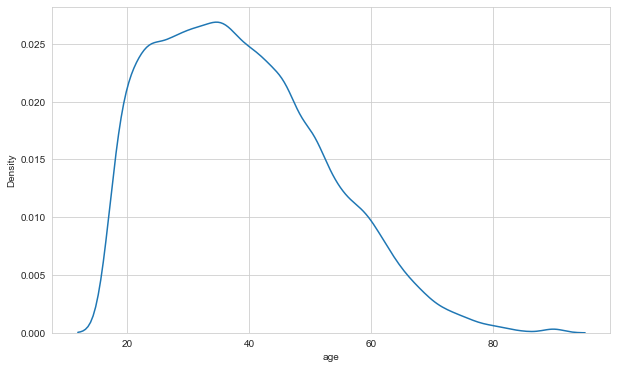

In [136]:
sns.kdeplot(df.age)

<AxesSubplot:xlabel='age'>

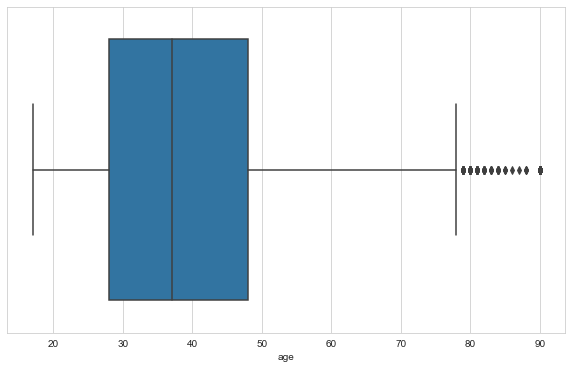

In [137]:
sns.boxplot(df.age)

**Rename the features of;**<br>
**``"education-num"``**, **``"marital-status"``**, **``"capital-gain"``**, **``"capital-loss"``**, **``"hours-per-week"``**, **``"native-country"``** **as**<br>
**``"education_num"``**, **``"marital_status"``**, **``"capital_gain"``**, **``"capital_loss"``**, **``"hours_per_week"``**, **``"native_country"``**, **respectively and permanently.**

In [12]:
df.rename(columns={"education-num" : "education_num",
                   "marital-status" : "marital_status",
                   "capital-gain" : "capital_gain",
                   "capital-loss": "capital_loss",
                   "hours-per-week" : "hours_per_week",
                   "native-country" : "native_country",
                   "sex" : "gender"},
          inplace = True)

In [13]:
# Check the sum of Missing Values per column
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [140]:
# Check the Percentage of Missing Values
df.isnull().sum() / df.shape[0] * 100

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education_num     2.465
marital_status    0.000
occupation        0.000
relationship     15.564
race              0.000
gender            0.000
capital_gain      0.000
capital_loss      0.000
hours_per_week    0.000
native_country    0.000
salary            0.000
dtype: float64

In [141]:
print(colored('Missing Value Information Per Column:\n', 'blue', attrs=['bold']))
missing_count = df.isnull().sum()
missing_per = df.isnull().sum()/df.shape[0]*100

missing_df = pd.concat({"missing_count": missing_count, "missing_percentage": missing_per}, axis=1)
missing_df

Missing Value Information Per Column:



missing_count  missing_percentage
age                         0               0.000
workclass                   0               0.000
fnlwgt                      0               0.000
education                   0               0.000
education_num             802               2.465
marital_status              0               0.000
occupation                  0               0.000
relationship             5064              15.564
race                        0               0.000
gender                      0               0.000
capital_gain                0               0.000
capital_loss                0               0.000
hours_per_week              0               0.000
native_country              0               0.000
salary                      0               0.000

<Figure size 720x360 with 0 Axes>

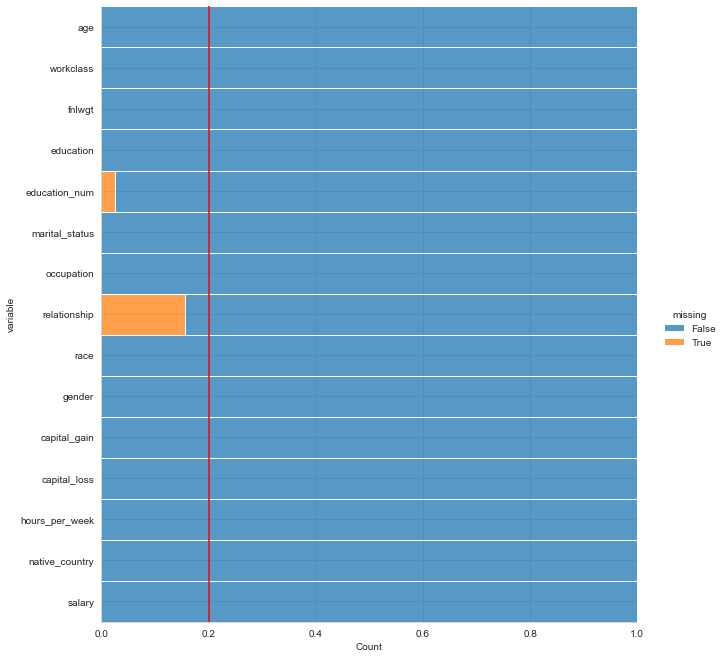

In [142]:
show_nulls(df)

### 2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [144]:
print(colored('Descriptive Statistics of Categorical Features:\n', 'blue', attrs=['bold']))

df.describe(include="object").T

Descriptive Statistics of Categorical Features:



count unique                 top   freq
workclass       32537      9             Private  22673
education       32537     16             HS-grad  10494
marital_status  32537      7  Married-civ-spouse  14970
occupation      32537     15      Prof-specialty   4136
relationship    27473      5             Husband  13187
race            32537      5               White  27795
gender          32537      2                Male  21775
native_country  32537     42       United-States  29153
salary          32537      2               <=50K  24698

In [15]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

In [16]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
----------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
----------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418


**Check if the Dataset has any Question Mark** **``"?"``**

In [17]:
df.isin(['?'])

age  workclass  fnlwgt  education  education_num  marital_status  \
0      False      False   False      False          False           False   
1      False      False   False      False          False           False   
2      False      False   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
32556  False      False   False      False          False           False   
32557  False      False   False      False          False           False   
32558  False      False   False      False          False           False   
32559  False      False   False      False          False           False   
32560  False      False   False      False          False           False   

       occupation  relationship   race  gender  capital_gain  capital_loss  \
0           False         False  False   False         False         False   
1           False         False  False   False         False         False   
2           False         False  False   False         False         False   
3           False         False  False   False         False         False   
4           False         False  False   False         False         False   
...           ...           ...    ...     ...           ...           ...   
32556       False         False  False   False         False         False   
32557       False         False  False   False         False         False   
32558       False         False  False   False         False         False   
32559       False         False  False   False         False         False   
32560       False         False  False   False         False         False   

       hours_per_week  native_country  salary  
0               False           False   False  
1               False           False   False  
2               False           False   False  
3               False           False   False  
4               False           False   False  
...               ...             ...     ...  
32556           False           False   False  
32557           False           False   False  
32558           False           False   False  
32559           False           False   False  
32560           False           False   False  

[32537 rows x 15 columns]

In [18]:
df.isin(['?']).any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
gender            False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Univariate & Multivariate Analysis</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

**to do list for numeric features:**
1. Check the boxplot to see extreme values 
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by "salary" levels
5. Check the statistical values by "salary" levels
6. Write down the conclusions you draw from your analysis

**to do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage of person in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
5. Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
6. Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
7. Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis


## Salary (Target Feature)

**Check the count of person in each "salary" levels and visualize it with a countplot**

In [149]:
df.salary.value_counts(dropna=False)

<=50K    24698
>50K      7839
Name: salary, dtype: int64

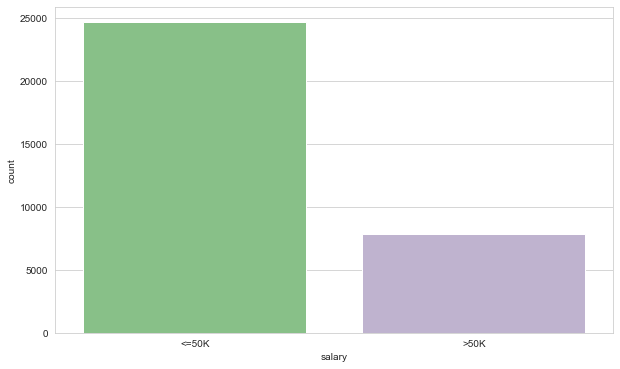

In [150]:
sns.countplot(data=df, x="salary", palette="Accent");

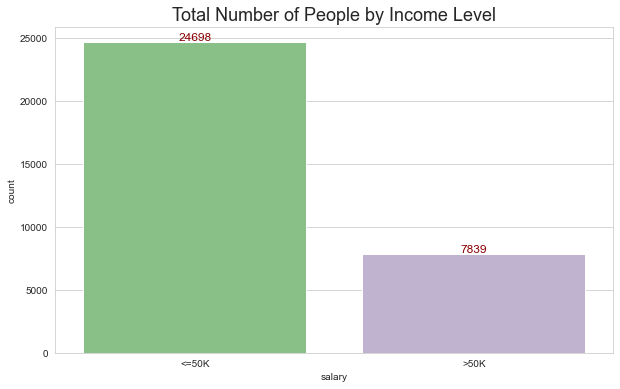

In [151]:
fig, ax = plt.subplots()

ax = sns.countplot(data=df, x="salary", palette="Accent")
ax.set_title("Total Number of People by Income Level", fontsize=18)

ax.bar_label(ax.containers[0], color="darkred",size=12); 

**Check the percentage of person in each "salary" levels and visualize it with a pieplot**

In [152]:
df.salary.value_counts(normalize=True)

<=50K   0.759
>50K    0.241
Name: salary, dtype: float64

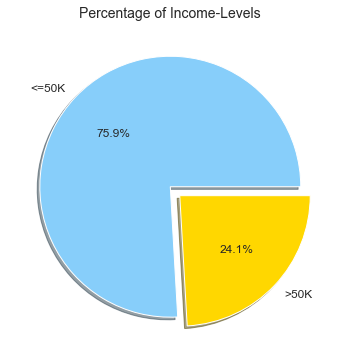

In [153]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df.salary.value_counts().values, 
       labels=['<=50K', '>50K'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Percentage of Income-Levels", fontdict = {'fontsize': 14})
plt.show()

**Result :** While 75% of the individuals in the data set are at the low-income level, 25% are at the high-income level.

## Numeric Features

## age

**Check the boxplot to see extreme values**

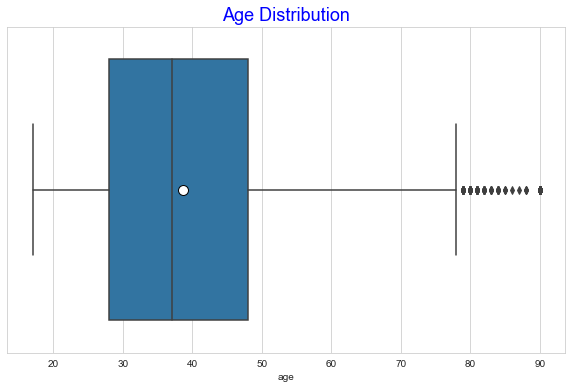

In [154]:
sns.boxplot(data=df, 
            x="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Age Distribution", fontsize=18, color="b");

**Check the histplot/kdeplot to see distribution of feature**

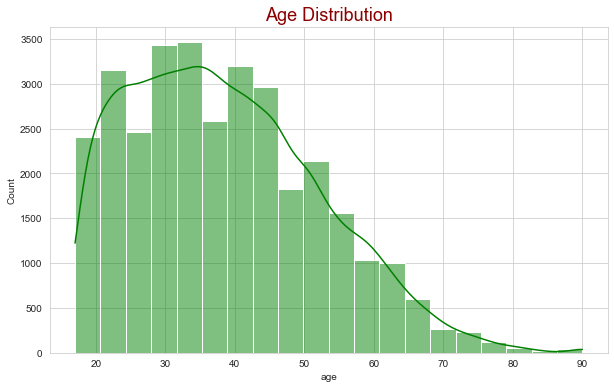

In [155]:
sns.histplot(data=df, x="age", bins=20, kde=True, color="g")

plt.title("Age Distribution", fontsize=18, color="darkred");

**Check the statistical values**

In [156]:
print(colored('Descriptive Statistics of the Age Feature:\n', 'blue', attrs=['bold']))

df.age.describe()

Descriptive Statistics of the Age Feature:



count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

Statistical Calculations :
--------------------------
Minimum:  17.00
Mean:     38.59
Median:   37.00
Mode:     36.00
Maximum:  90.00



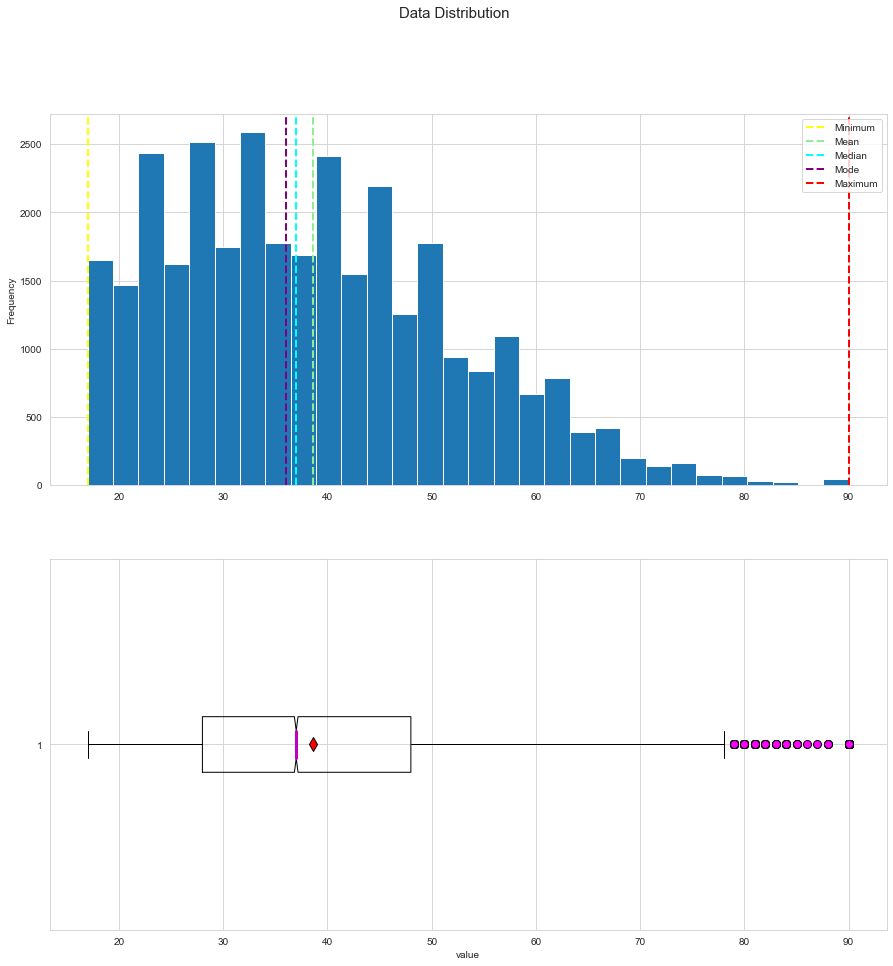

In [157]:
show_distribution(df["age"])

**Check the boxplot and histplot/kdeplot by "salary" levels**

Text(0.5, 1.0, 'Age Distribution by Salary')

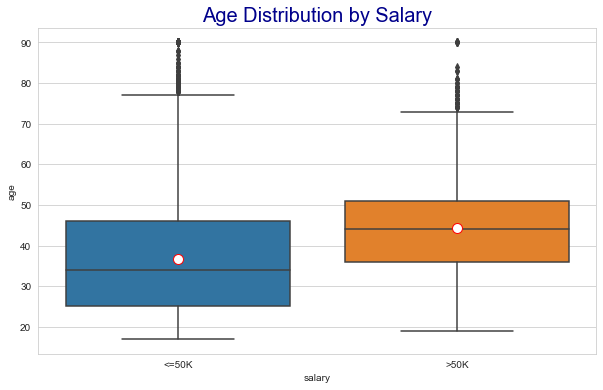

In [158]:
sns.boxplot(data=df, 
            x="salary", 
            y="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"red",
                       "markersize":"10"})

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue")

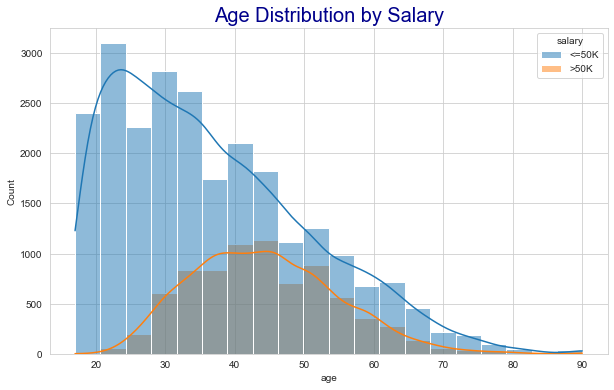

In [159]:
sns.histplot(data=df, x="age", bins= 20, kde=True, hue="salary")

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

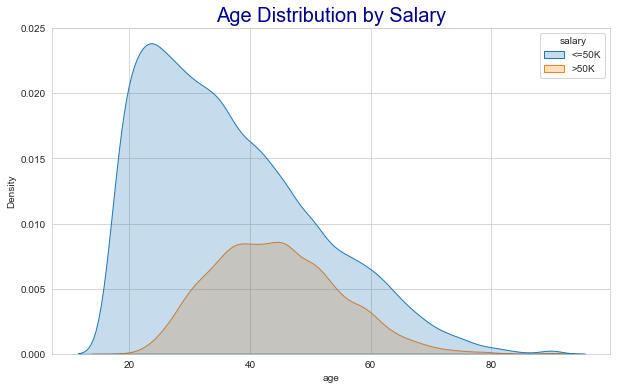

In [160]:
sns.kdeplot(data=df, x="age", hue="salary", fill=True)

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

**Check the statistical values by "salary" levels**

In [161]:
print(colored('Descriptive Statistics of the Age by Salary:\n', 'blue', attrs=['bold']))

df.groupby("salary").age.describe()

Descriptive Statistics of the Age by Salary:



count   mean    std    min    25%    50%    75%    max
salary                                                           
<=50K  24698.000 36.787 14.017 17.000 25.000 34.000 46.000 90.000
>50K    7839.000 44.251 10.520 19.000 36.000 44.000 51.000 90.000

Statistical Calculations :
--------------------------
Minimum:  17.00
Mean:     38.59
Median:   37.00
Mode:     36.00
Maximum:  90.00



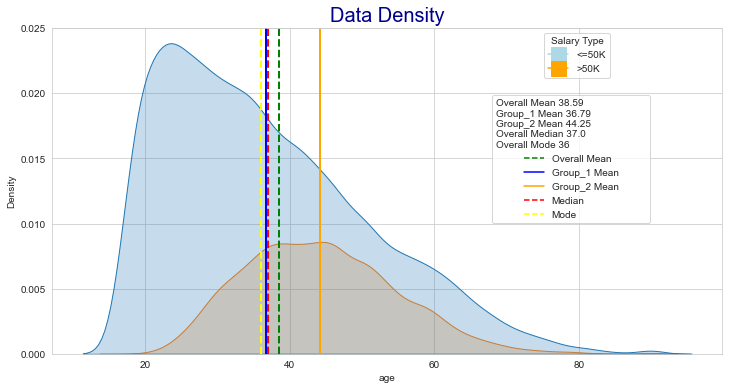

In [162]:
show_compare(df, "age", "salary")

**Result :** The mean and median age of the high-income group is higher than the low-income group. It means the older generation possesses more wealth than the young.

## fnlwgt

**Check the boxplot to see extreme values**

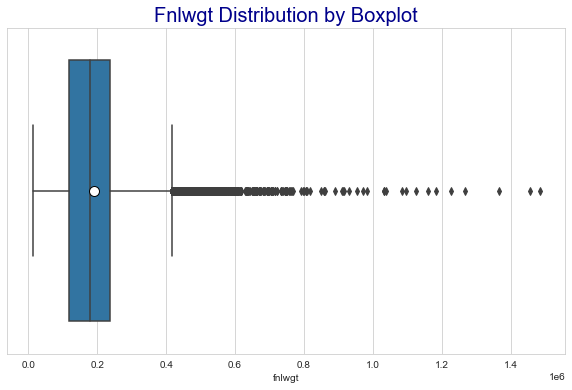

In [163]:
sns.boxplot(data=df, 
            x="fnlwgt",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Fnlwgt Distribution by Boxplot", fontsize=20, color="darkblue");

**Check the histplot/kdeplot to see distribution of feature**

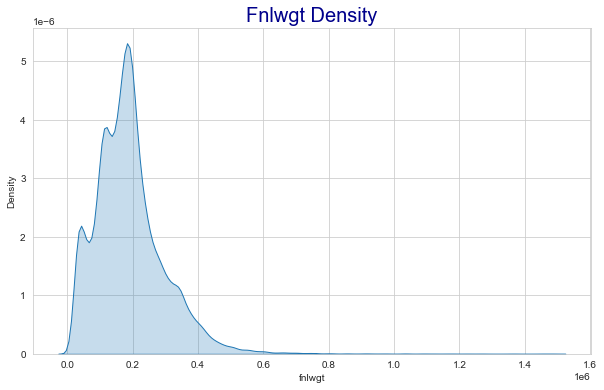

In [164]:
sns.kdeplot(data=df, x="fnlwgt", fill=True)

plt.title("Fnlwgt Density", fontsize=20, color="darkblue");

**Check the statistical values**

In [165]:
print(colored('Descriptive Statistics of the "fnlwgt" Feature:\n', 'blue', attrs=['bold']))

df.fnlwgt.describe()

Descriptive Statistics of the "fnlwgt" Feature:



count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

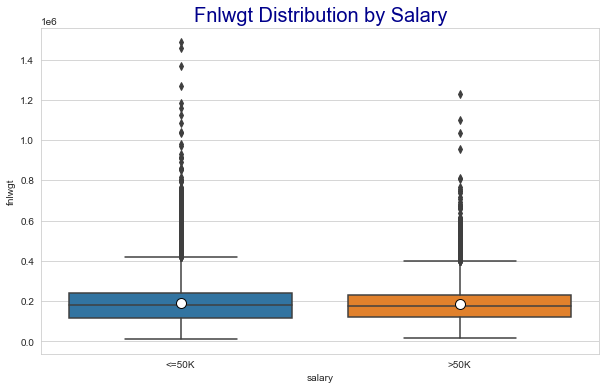

In [166]:
sns.boxplot(data=df, 
            x="salary", 
            y="fnlwgt",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Fnlwgt Distribution by Salary", fontsize=20, color="darkblue");

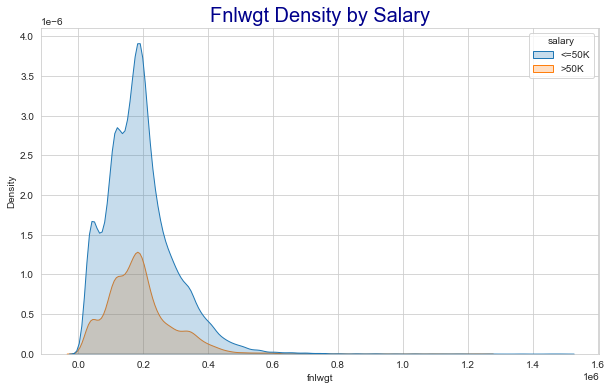

In [167]:
sns.kdeplot(data=df, x="fnlwgt", hue="salary", fill=True)

plt.title("Fnlwgt Density by Salary", fontsize=20, color="darkblue");

**Check the statistical values by "salary" levels**

In [168]:
df.groupby("salary").fnlwgt.describe()

count       mean        std       min        25%        50%  \
salary                                                                   
<=50K  24698.000 190345.927 106487.413 12285.000 117606.000 179465.000   
>50K    7839.000 188000.481 102554.464 14878.000 119100.000 176063.000   

              75%         max  
salary                         
<=50K  238968.250 1484705.000  
>50K   230969.000 1226583.000

Statistical Calculations :
--------------------------
Minimum:12285.00
Mean: 189780.85
Median:178356.00
Mode: 123011.00
Maximum:1484705.00



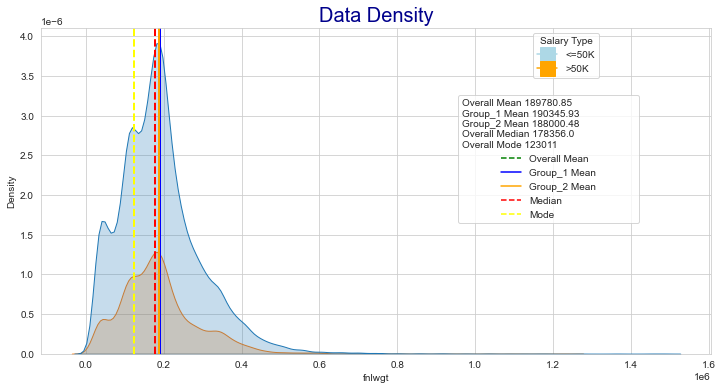

In [169]:
show_compare(df, "fnlwgt", "salary")

**Result :** There is no significant difference between high and low-income groups according to the "fnlwgt" feature.

## capital_gain

**Check the boxplot to see extreme values**

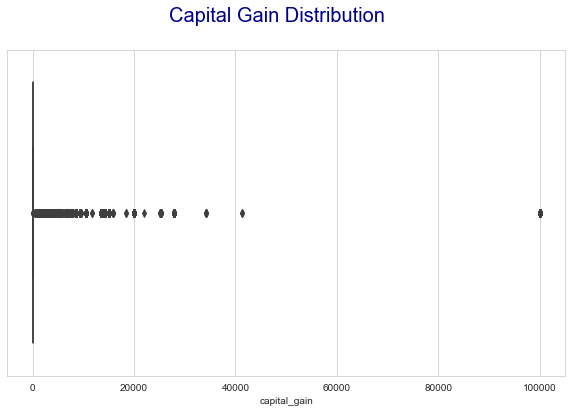

In [170]:
sns.boxplot(data=df, x="capital_gain")

plt.suptitle("Capital Gain Distribution", fontsize=20, color="darkblue");

In [171]:
df["capital_gain"].mean()

1078.4437409718166

**Check the histplot/kdeplot to see distribution of feature**

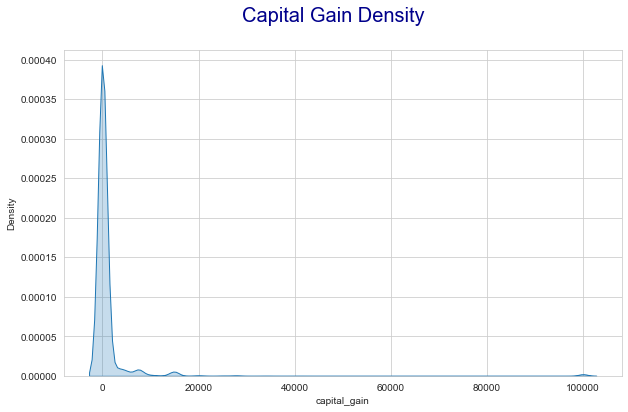

In [172]:
sns.kdeplot(data=df, x="capital_gain", fill=True)

plt.suptitle("Capital Gain Density", fontsize=20, color="darkblue");

**Check the statistical values**

In [173]:
print(colored('Descriptive Statistics of the "capital_gain" Feature:\n', 'blue', attrs=['bold']))

df.capital_gain.describe()

Descriptive Statistics of the "capital_gain" Feature:



count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

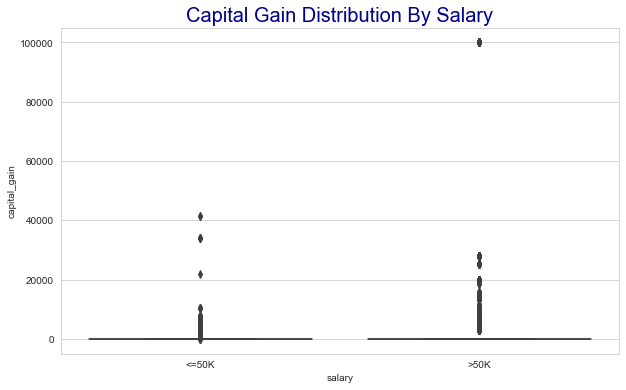

In [174]:
sns.boxplot(data=df, x="salary", y="capital_gain")

plt.title("Capital Gain Distribution By Salary", fontsize=20, color='darkblue');

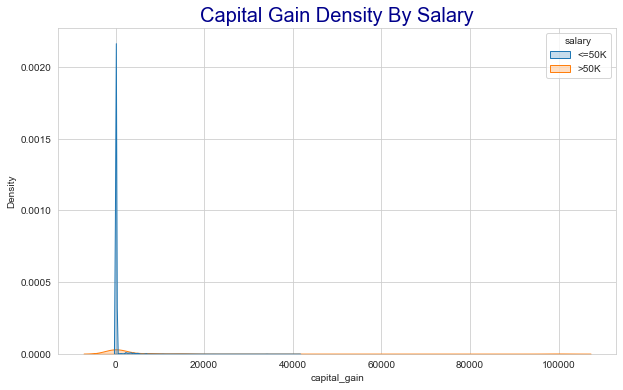

In [175]:
sns.kdeplot(data=df, x="capital_gain", hue="salary", fill=True)

plt.title("Capital Gain Density By Salary", fontsize=20, color='darkblue');

**Check the statistical values by "salary" levels**

In [176]:
print(colored('Descriptive Statistics of the "capital_gain" by Salary:\n', 'blue', attrs=['bold']))

df.groupby("salary").capital_gain.describe()

Descriptive Statistics of the "capital_gain" by Salary:



count     mean       std   min   25%   50%   75%       max
salary                                                               
<=50K  24698.000  148.885   963.558 0.000 0.000 0.000 0.000 41310.000
>50K    7839.000 4007.165 14572.097 0.000 0.000 0.000 0.000 99999.000

**Check the statistical values by "salary" levels for capital_gain not equal the zero**

In [177]:
print(colored('Descriptive Statistics of the "capital_gain != 0" by Salary :\n', 'blue', attrs=['bold']))

df[df.capital_gain != 0].groupby("salary").capital_gain.describe()

Descriptive Statistics of the "capital_gain != 0" by Salary :



count      mean       std      min      25%      50%       75%  \
salary                                                                     
<=50K  1035.000  3552.813  3173.419  114.000 2202.000 3273.000  4101.000   
>50K   1677.000 18731.165 26778.676 3103.000 7298.000 7896.000 15024.000   

             max  
salary            
<=50K  41310.000  
>50K   99999.000

Statistical Calculations :
--------------------------
Minimum:   0.00
Mean:   1078.44
Median:    0.00
Mode:      0.00
Maximum:99999.00



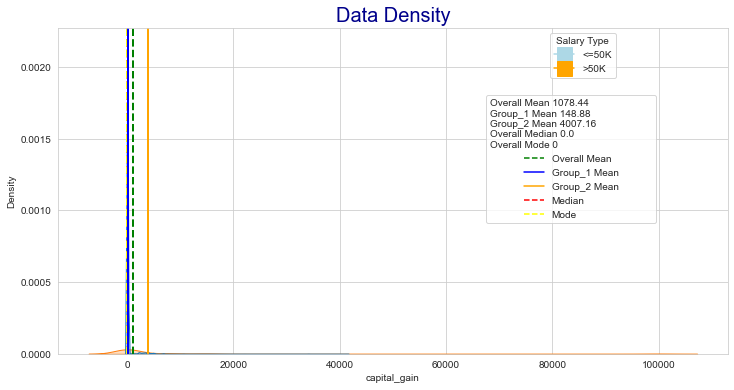

In [178]:
show_compare(df, "capital_gain", "salary")

**Result :** The "capital-gain" feature has not provided very meaningful insights. Nevertheless, we can say that the more "capital-gain", the more "high-income".

## capital_loss

**Check the boxplot to see extreme values**

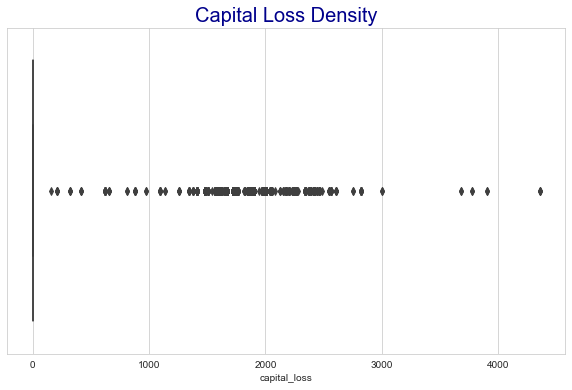

In [179]:
sns.boxplot(data=df, x="capital_loss")

plt.title("Capital Loss Distribution", fontsize=20, color='darkblue')

plt.title("Capital Loss Density", fontsize=20, color='darkblue');

**Check the histplot/kdeplot to see distribution of feature**

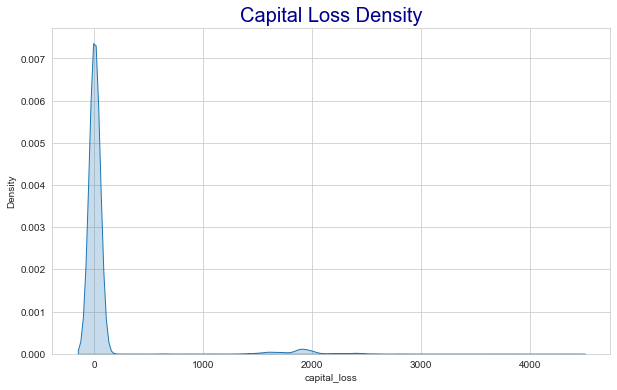

In [180]:
sns.kdeplot(data=df, x="capital_loss", fill=True)

plt.title("Capital Loss Density", fontsize=20, color='darkblue');

**Check the statistical values**

In [181]:
print(colored('Descriptive Statistics of the "capital_loss" Feature:\n', 'blue', attrs=['bold']))

df.capital_loss.describe()

Descriptive Statistics of the "capital_loss" Feature:



count   32537.000
mean       87.368
std       403.102
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital_loss, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

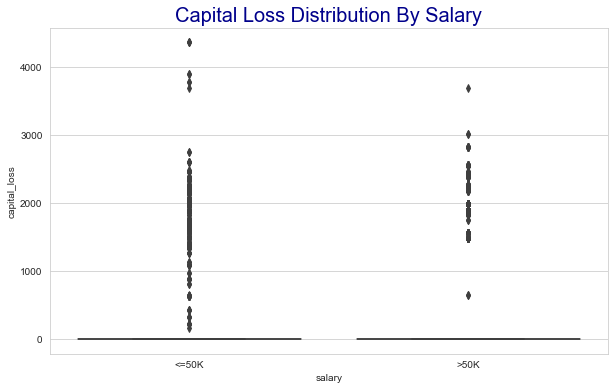

In [182]:
sns.boxplot(data=df, x="salary", y="capital_loss")

plt.title("Capital Loss Distribution By Salary", fontsize=20, color='darkblue');

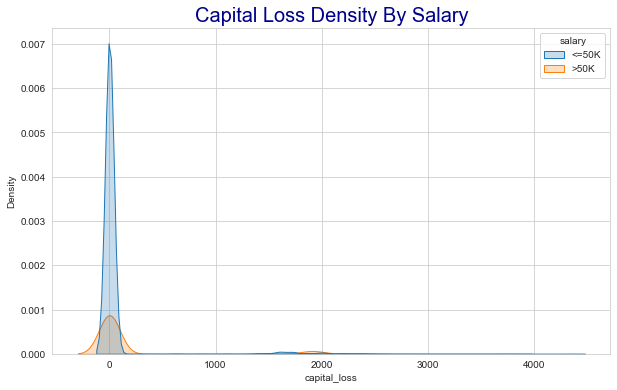

In [183]:
sns.kdeplot(data=df, x="capital_loss", hue="salary", fill=True);

plt.title("Capital Loss Density By Salary", fontsize=20, color='darkblue');

**Check the statistical values by "salary" levels**

In [184]:
print(colored('Descriptive Statistics of the "capital_loss" by Salary :\n', 'blue', attrs=['bold']))

df.groupby("salary").capital_loss.describe()


Descriptive Statistics of the "capital_loss" by Salary :



count    mean     std   min   25%   50%   75%      max
salary                                                           
<=50K  24698.000  53.190 310.890 0.000 0.000 0.000 0.000 4356.000
>50K    7839.000 195.051 595.555 0.000 0.000 0.000 0.000 3683.000

**Check the statistical values by "salary" levels for capital_loss not equel the zero**

In [185]:
print(colored('Descriptive Statistics of the "capital_loss != 0" by Salary :\n', 'blue', attrs=['bold']))

df[df.capital_loss != 0].groupby("salary").capital_loss.describe()

Descriptive Statistics of the "capital_loss != 0" by Salary :



count     mean     std     min      25%      50%      75%      max
salary                                                                     
<=50K  746.000 1760.983 438.906 155.000 1590.000 1721.000 1980.000 4356.000
>50K   773.000 1978.017 264.144 653.000 1887.000 1902.000 1977.000 3683.000

**Result :** The percentage of those who have capital_lost is much higher for those earning more than 50K.

## hours_per_week

**Check the boxplot to see extreme values**

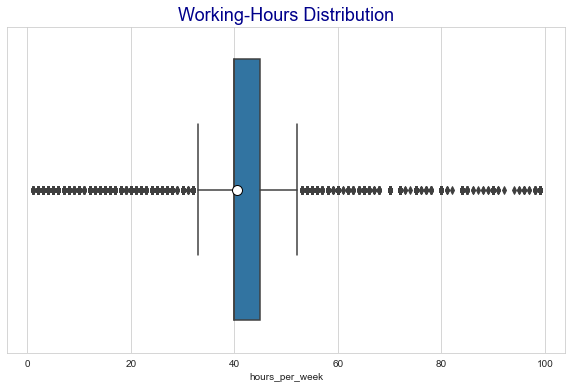

In [186]:
sns.boxplot(data=df, 
            x="hours_per_week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Working-Hours Distribution", fontsize=18, color='darkblue');


**Check the histplot/kdeplot to see distribution of feature**

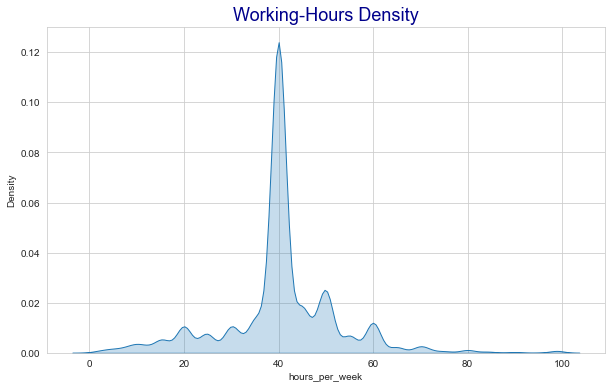

In [187]:
sns.kdeplot(data=df, x="hours_per_week", fill=True)

plt.title("Working-Hours Density", fontsize=18, color='darkblue');

**Check the statistical values**

In [188]:
print(colored('Descriptive Statistics of the "hours_per_week" :\n', 'blue', attrs=['bold']))

df["hours_per_week"].describe()

Descriptive Statistics of the "hours_per_week" :



count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

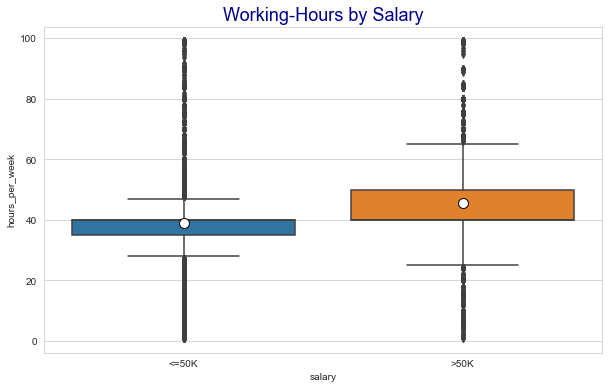

In [189]:
sns.boxplot(data=df, 
            x="salary", 
            y="hours_per_week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Working-Hours by Salary", fontsize=18, color='darkblue'); 

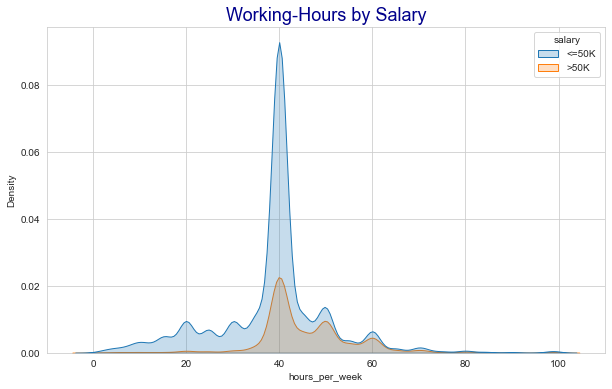

In [190]:
sns.kdeplot(data=df, x="hours_per_week", hue="salary", fill=True)

plt.title("Working-Hours by Salary", fontsize=18, color='darkblue'); 

**Check the statistical values by "salary" levels**

In [191]:
print(colored('Descriptive Statistics of the "hours_per_week" by Salary :\n', 'blue', attrs=['bold']))

df.groupby("salary").hours_per_week.describe()

Descriptive Statistics of the "hours_per_week" by Salary :



count   mean    std   min    25%    50%    75%    max
salary                                                          
<=50K  24698.000 38.843 12.318 1.000 35.000 40.000 40.000 99.000
>50K    7839.000 45.473 11.014 1.000 40.000 40.000 50.000 99.000

In [192]:
df.hours_per_week.mean()

40.44032947106371

**Result :**  To be in a high-income group, almost at least 40 hours working per week is required. Most of those who work less than 40 hours per week are in the low-income group.

### See the relationship between each numeric features by target feature (salary) in one plot basically

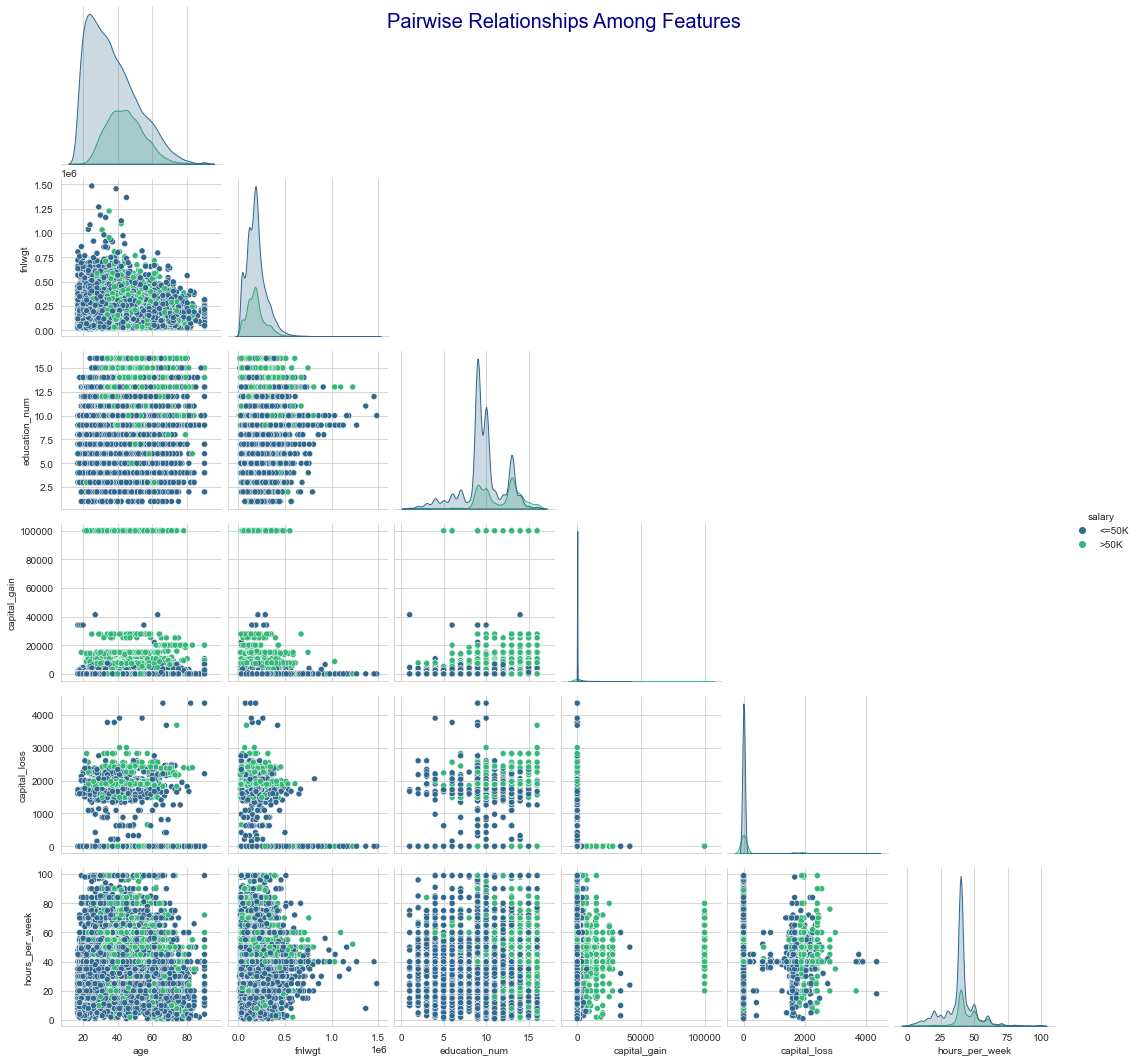

In [193]:
g = sns.pairplot(df, hue="salary", palette="viridis", corner=True)

g.fig.suptitle("Pairwise Relationships Among Features", fontsize=20, color='darkblue');  

In [194]:
print(sorted(list(df.education_num.unique())))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, nan, 15.0, 16.0]


## Categorical Features

## education & education_num

**Detect the similarities between these features by comparing unique values**

In [195]:
df.education.value_counts(dropna=False)

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [196]:
df.education_num.value_counts(dropna=False)

9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: education_num, dtype: int64

In [197]:
df.groupby('education').education_num.value_counts(dropna=False)

education     education_num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              159
              NaN                  7
5th-6th       3.000              329
              NaN                  3
7th-8th       4.000              630
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5245
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10208
              NaN                286
Masters       14.000            1686
              NaN                 36
Preschool 

**Visualize the count of person in each categories for these features (education, education_num) separately**

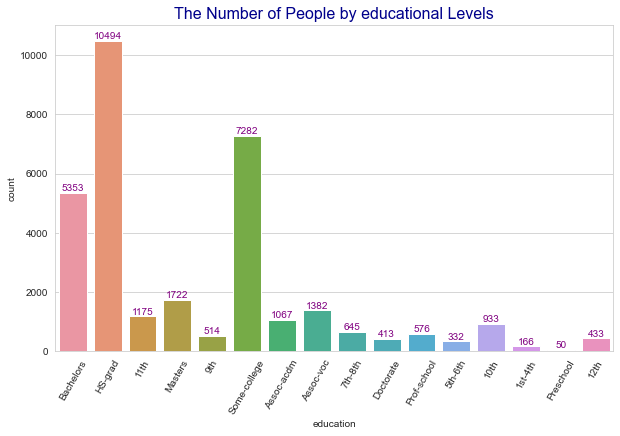

In [198]:
ax = sns.countplot(data=df, x="education")

plt.xticks(rotation=60)

plt.title("The Number of People by educational Levels", fontsize=16, color="darkblue")

ax.bar_label(ax.containers[0], color="purple", 
             size=10);

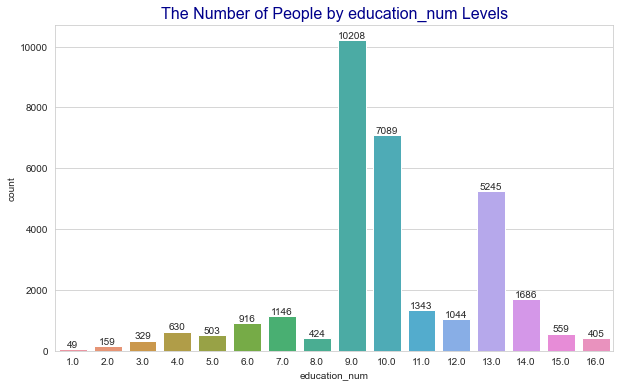

In [199]:
ax = sns.countplot(data = df, x = "education_num")
plt.title("The Number of People by education_num Levels", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

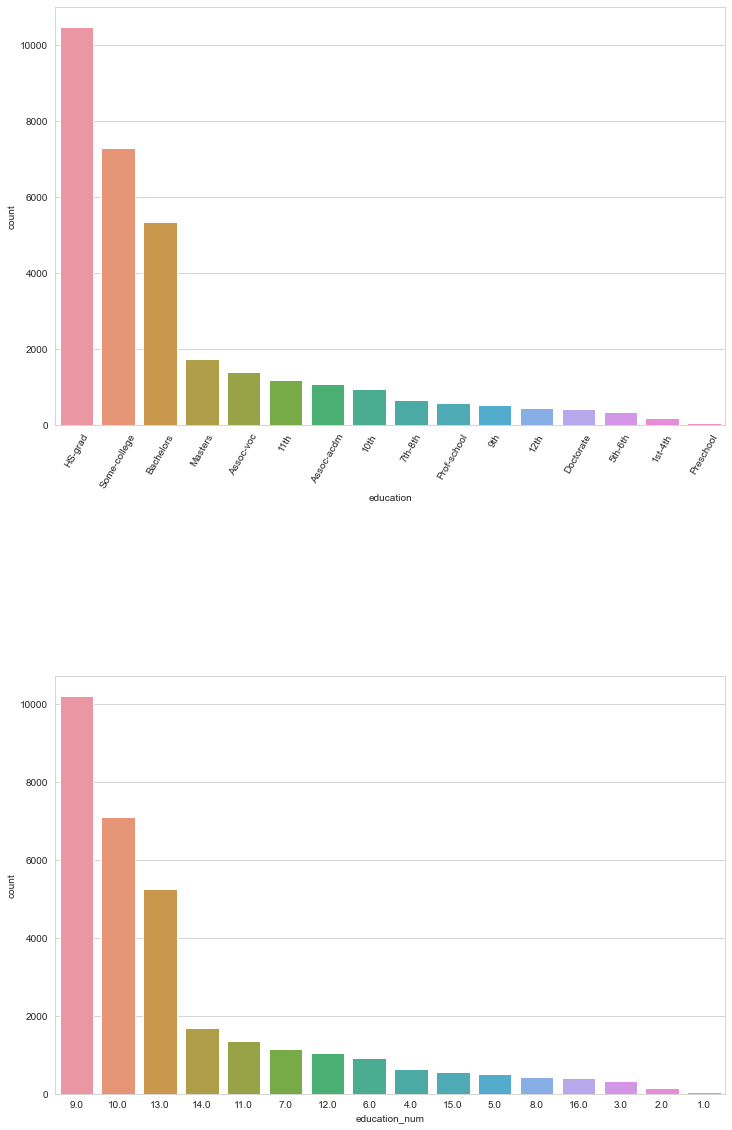

In [200]:
# Visualization of "education" and "education_num" features by order

education_count = df["education"].value_counts().index
education_num_count = df["education_num"].value_counts().index

fig, ax = plt.subplots(2, 1, figsize=(12, 20))

sns.countplot(df["education"], order=education_count, ax=ax[0])
sns.countplot(df["education_num"], order=education_num_count, ax=ax[1])

ax[0].tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.6)

**Check the count of person in each "salary" levels by these features (education and education_num) separately and visualize them with countplot**

In [201]:
df.groupby("education").salary.value_counts()

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

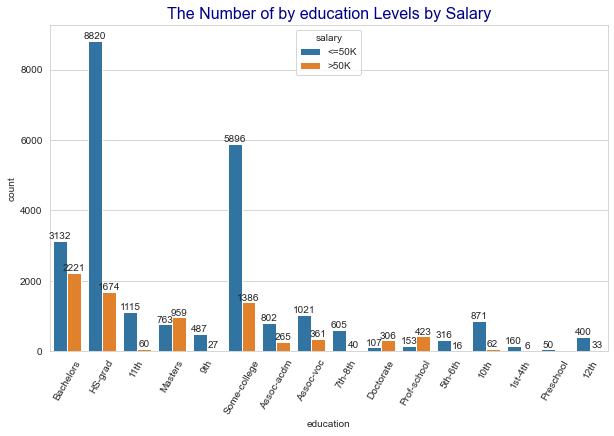

In [202]:
ax = sns.countplot(data = df, x = "education", hue = "salary")

plt.title("The Number of by education Levels by Salary", fontsize=16, color="darkblue")
plt.xticks(rotation = 60)

for container in ax.containers:
    ax.bar_label(container);

In [203]:
df.groupby("education_num").salary.value_counts()

education_num  salary
1.000          <=50K       49
2.000          <=50K      153
               >50K         6
3.000          <=50K      313
               >50K        16
4.000          <=50K      592
               >50K        38
5.000          <=50K      477
               >50K        26
6.000          <=50K      854
               >50K        62
7.000          <=50K     1088
               >50K        58
8.000          <=50K      391
               >50K        33
9.000          <=50K     8579
               >50K      1629
10.000         <=50K     5746
               >50K      1343
11.000         <=50K      994
               >50K       349
12.000         <=50K      787
               >50K       257
13.000         <=50K     3078
               >50K      2167
14.000         >50K       935
               <=50K      751
15.000         >50K       410
               <=50K      149
16.000         >50K       302
               <=50K      103
Name: salary, dtype: int64

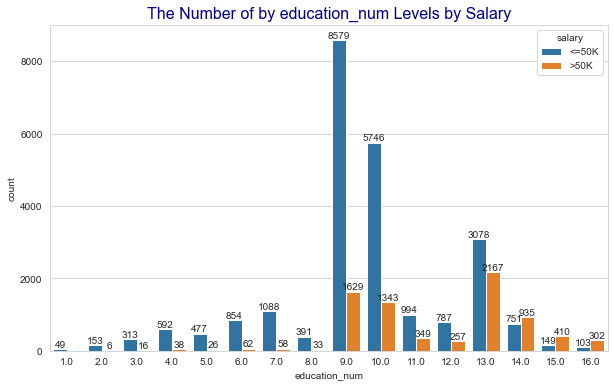

In [204]:
ax = sns.countplot(data = df, x = "education_num", hue = "salary")
plt.title("The Number of by education_num Levels by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

**Visualize the boxplot of "education_num" feature by "salary" levels**

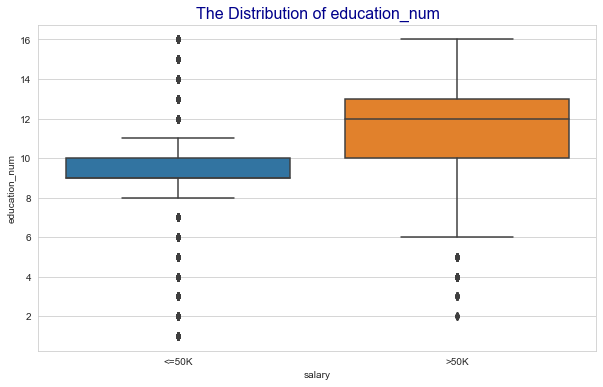

In [205]:
sns.boxplot(data = df, x = "salary", y = "education_num")

plt.title("The Distribution of education_num", fontsize=16, color="darkblue");

In [19]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return "low_level_grade"
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return "medium_level_grade"
    elif x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_grade"

In [20]:
df.education.apply(mapping_education).value_counts(dropna=False)

medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: education, dtype: int64

In [21]:
# By using "mapping_education" def function above, create a new column named "education_summary"

df["education_summary"] = df.education.apply(mapping_education)

**Visualize the count of person in each categories for these new education levels (high, medium, low)**

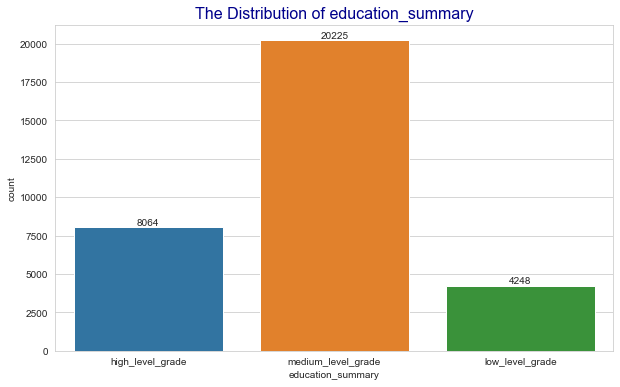

In [209]:
ax = sns.countplot(data=df, x="education_summary")

plt.title("The Distribution of education_summary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

**Check the count of person in each "salary" levels by these new education levels(high, medium, low) and visualize it with countplot**

In [210]:
df.groupby("education_summary").salary.value_counts()

education_summary   salary
high_level_grade    <=50K      4155
                    >50K       3909
low_level_grade     <=50K      4004
                    >50K        244
medium_level_grade  <=50K     16539
                    >50K       3686
Name: salary, dtype: int64

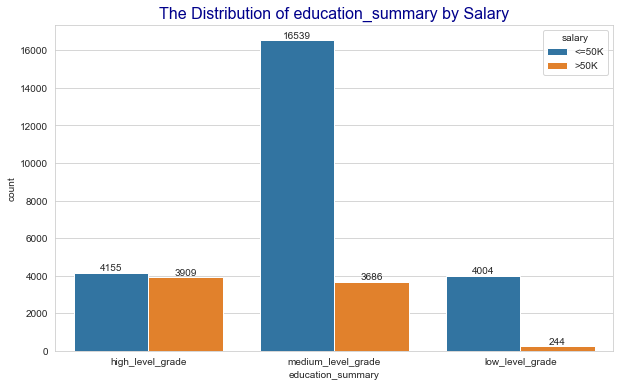

In [211]:
ax = sns.countplot(data=df, x="education_summary", hue="salary")

plt.title("The Distribution of education_summary by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

**Check the percentage distribution of person in each "salary" levels by each new education levels (high, medium, low) and visualize it with pie plot separately**

In [212]:
edu = df.groupby(["education_summary"]).salary.value_counts(normalize=True)
edu

education_summary   salary
high_level_grade    <=50K    0.515
                    >50K     0.485
low_level_grade     <=50K    0.943
                    >50K     0.057
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: salary, dtype: float64

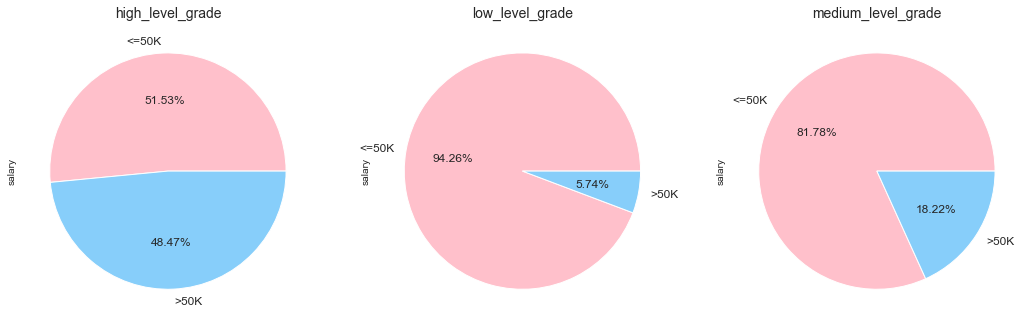

In [213]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2, 4]:
    plt.subplot(1,3,index)
    edu[i:i+2].plot.pie(subplots=True,
                        labels=["<=50K", ">50K"],
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue'],
                        )
    plt.title(edu.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1
    

**Check the count of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with countplot**

In [214]:
df.groupby("salary").education_summary.value_counts()

salary  education_summary 
<=50K   medium_level_grade    16539
        high_level_grade       4155
        low_level_grade        4004
>50K    high_level_grade       3909
        medium_level_grade     3686
        low_level_grade         244
Name: education_summary, dtype: int64

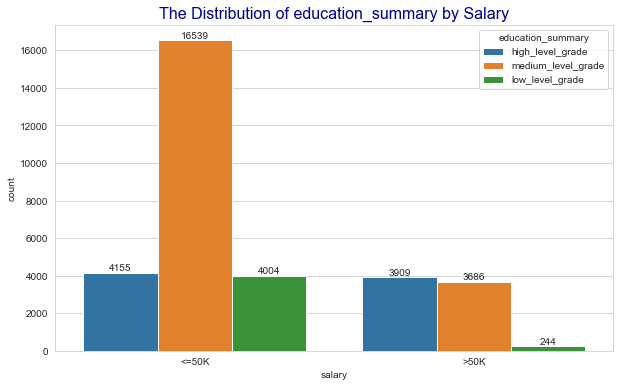

In [215]:
ax = sns.countplot(data=df, x="salary", hue="education_summary")

plt.title("The Distribution of education_summary by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

**Check the the percentage distribution of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with pie plot separately**

In [216]:
edu = df.groupby(["salary"]).education_summary.value_counts(normalize=True)
edu

salary  education_summary 
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_summary, dtype: float64

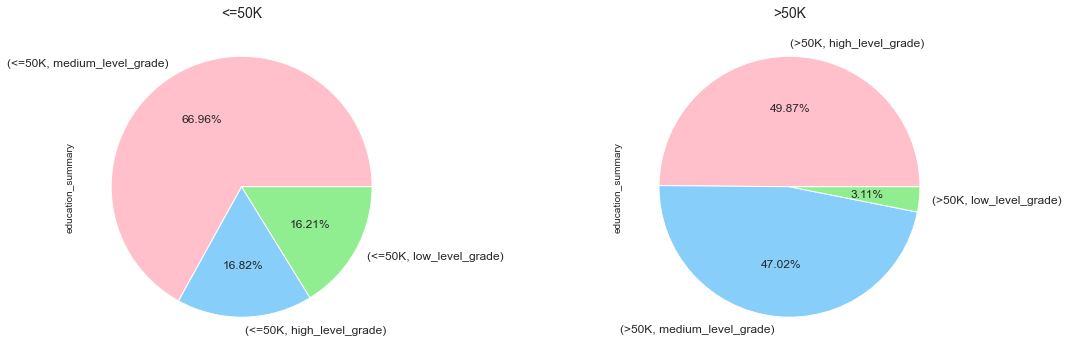

In [217]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1,2,index)
    edu[i:i+3].plot.pie(subplots=True,
                       # labels=["high", "medium", "low"], 
                        autopct="%.2f%%",            
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue', 'lightgreen'],
                        )
    plt.title(edu.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [218]:
# First way

edu_df = pd.DataFrame(edu)

edu_df

education_summary
salary education_summary                    
<=50K  medium_level_grade              0.670
       high_level_grade                0.168
       low_level_grade                 0.162
>50K   high_level_grade                0.499
       medium_level_grade              0.470
       low_level_grade                 0.031

In [219]:
edu_df.rename(columns = {"education_summary" : "percentage"}, inplace = True)
edu_df.reset_index(inplace = True) 


edu_df.sort_values(by = ["salary", "education_summary"], inplace=True)
edu_df

salary   education_summary  percentage
1  <=50K    high_level_grade       0.168
2  <=50K     low_level_grade       0.162
0  <=50K  medium_level_grade       0.670
3   >50K    high_level_grade       0.499
5   >50K     low_level_grade       0.031
4   >50K  medium_level_grade       0.470

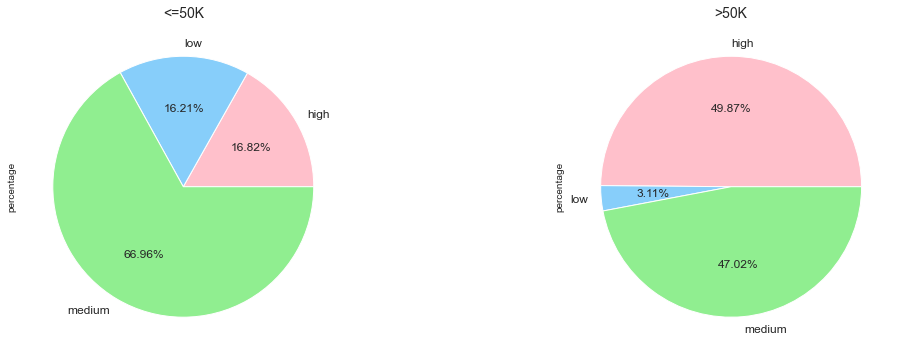

In [220]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1,2,index)
    edu_df["percentage"][i:i+3].plot.pie(subplots=True,
                                         labels=["high", "low", "medium"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12},
                                         colors=['pink', 'lightskyblue', 'lightgreen'],
                                         )
    plt.title(edu_df.salary[i], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [221]:
# Second way

edu2 = df.groupby(["salary"]).education_summary.value_counts(sort= False, normalize=True)
edu2

salary  education_summary 
<=50K   high_level_grade     0.168
        low_level_grade      0.162
        medium_level_grade   0.670
>50K    high_level_grade     0.499
        low_level_grade      0.031
        medium_level_grade   0.470
Name: education_summary, dtype: float64

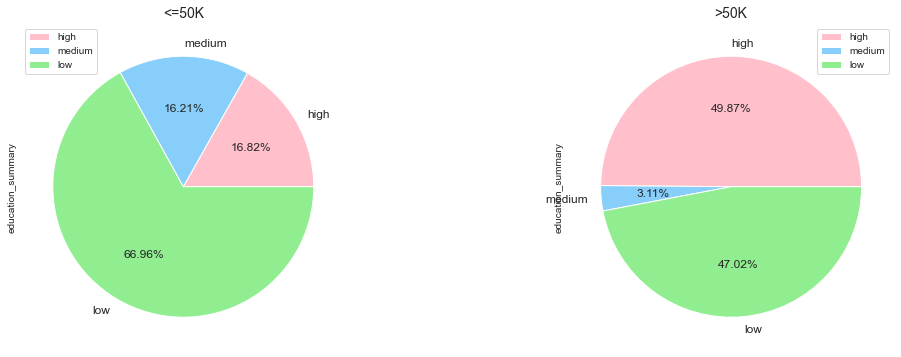

In [222]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1,2,index)
    edu2[i:i+3].plot.pie(subplots=True,
                        labels=["high", "medium", "low"],  
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue', 'lightgreen'],
                        )
    plt.title(edu2.index[i][0], fontdict = {'fontsize': 14})
    plt.legend()  
    index += 1

**Result :** We can easily say that the more education the more high income.

## marital_status & relationship

**Detect the similarities between these features by comparing unique values**

In [223]:
df.marital_status.value_counts(dropna=False)

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [224]:
df.relationship.value_counts(dropna=False)

Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [22]:
# Fill missing values with "Unknown" in the column of "relationship"

df.relationship.fillna("Unknown", inplace=True)

In [226]:
df.groupby("relationship").marital_status.value_counts(dropna=False)

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

**Assessment :** These features have almost same info, but "relationship" feature has %15 of missing values. So I have decided to go my way with "marital_status" feature

**Visualize the count of person in each categories**

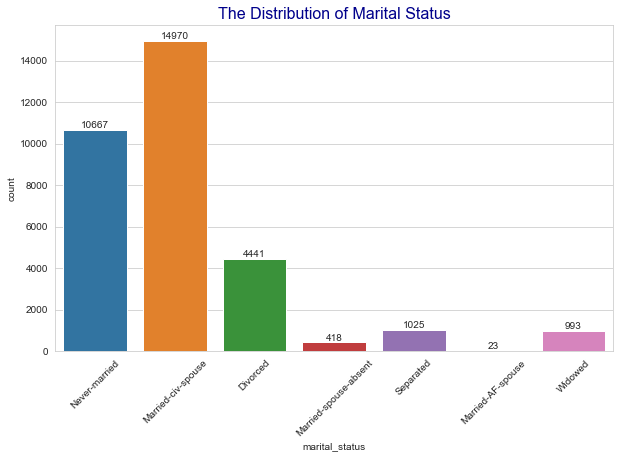

In [227]:
ax = sns.countplot(data=df, x="marital_status")

plt.title("The Distribution of Marital Status", fontsize=16, color="darkblue")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

**Check the count of person in each "salary" levels by categories and visualize it with countplot**

In [228]:
df.groupby("marital_status").salary.value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

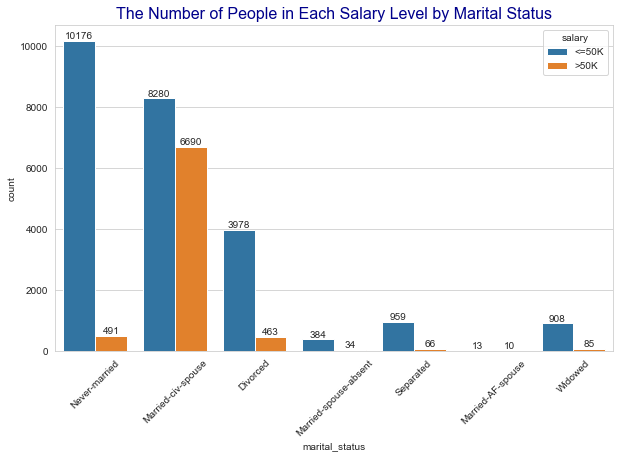

In [229]:
ax = sns.countplot(data=df, x="marital_status", hue="salary")

plt.title("The Number of People in Each Salary Level by Marital Status", fontsize=16, color="darkblue")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

In [23]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [24]:
df.marital_status.apply(mapping_marital_status).value_counts(dropna=False)

unmarried    17126
married      15411
Name: marital_status, dtype: int64

In [25]:
# By using "mapping_marital_status" def function above, create a new column named "marital_status_summary"

df["marital_status_summary"] = df.marital_status.apply(mapping_marital_status)

**Visualize the count of person in each categories for these new marital status (married, unmarried)**

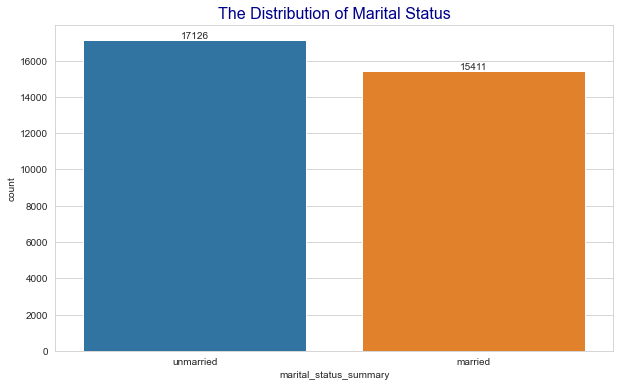

In [233]:
ax = sns.countplot(data=df, x="marital_status_summary")

plt.title("The Distribution of Marital Status", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

**Check the count of person in each "salary" levels by these new marital status (married, unmarried) and visualize it with countplot**

In [234]:
df.groupby("marital_status_summary").salary.value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
unmarried               <=50K     16021
                        >50K       1105
Name: salary, dtype: int64

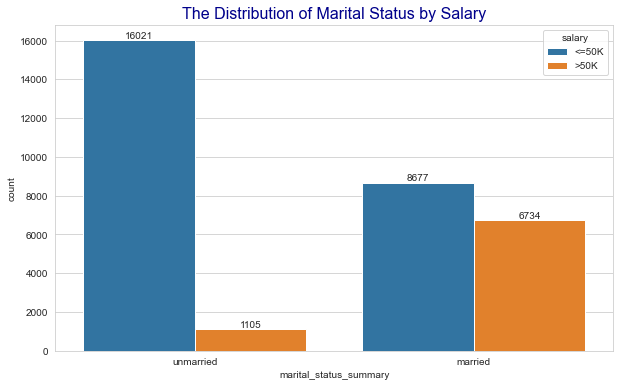

In [235]:
ax = sns.countplot(data=df, x="marital_status_summary", hue="salary")

plt.title("The Distribution of Marital Status by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

**Check the percentage distribution of person in each "salary" levels by each new marital status (married, unmarried) and visualize it with pie plot separately**

In [236]:
marital = df.groupby(["marital_status_summary"]).salary.value_counts(normalize=True)
marital

marital_status_summary  salary
married                 <=50K    0.563
                        >50K     0.437
unmarried               <=50K    0.935
                        >50K     0.065
Name: salary, dtype: float64

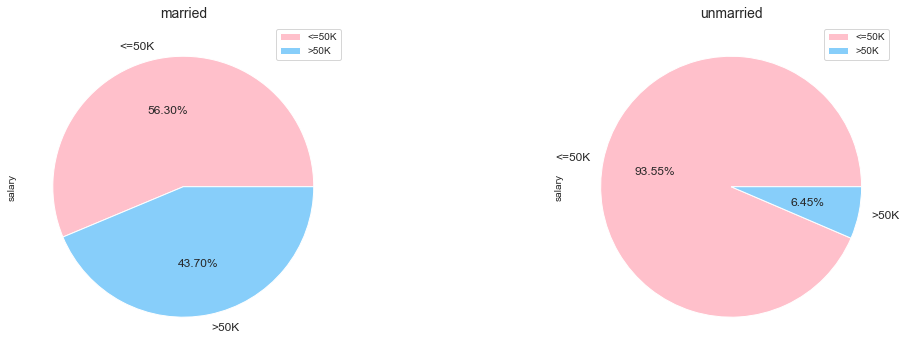

In [237]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    marital[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(marital.index[i][0], fontdict = {'fontsize': 14})
    plt.legend()
    index += 1

**Check the count of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with countplot**

In [238]:
df.groupby("salary").marital_status_summary.value_counts()

salary  marital_status_summary
<=50K   unmarried                 16021
        married                    8677
>50K    married                    6734
        unmarried                  1105
Name: marital_status_summary, dtype: int64

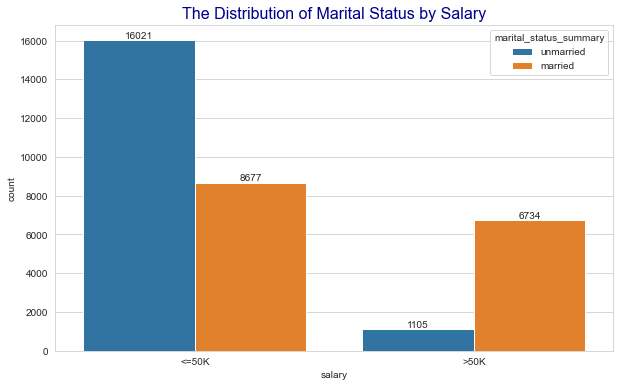

In [239]:
ax = sns.countplot(data=df, x="salary", hue="marital_status_summary")

plt.title("The Distribution of Marital Status by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

**Check the the percentage distribution of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with pie plot separately**

In [240]:
marital = df.groupby("salary").marital_status_summary.value_counts(sort = False, normalize=True)
marital

salary  marital_status_summary
<=50K   married                  0.351
        unmarried                0.649
>50K    married                  0.859
        unmarried                0.141
Name: marital_status_summary, dtype: float64

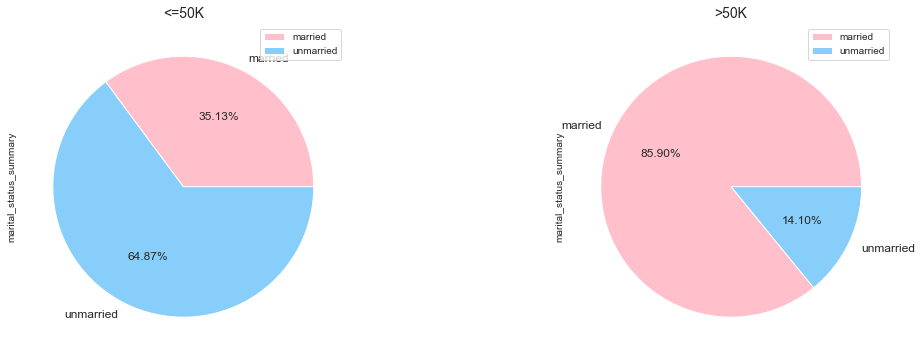

In [241]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    marital[i:i+2].plot.pie(subplots=True,
                                             labels=["married", "unmarried"],
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             colors=['pink', 'lightskyblue'],
                                             )
    plt.title(marital.index[i][0], fontdict = {'fontsize': 14})
    plt.legend()
    index += 1

**Result :** We can easily say that married persons have earned more income than unmarried persons.

## workclass

**Check the count of person in each categories and visualize it with countplot**

In [242]:
df.workclass.value_counts(dropna=False)

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

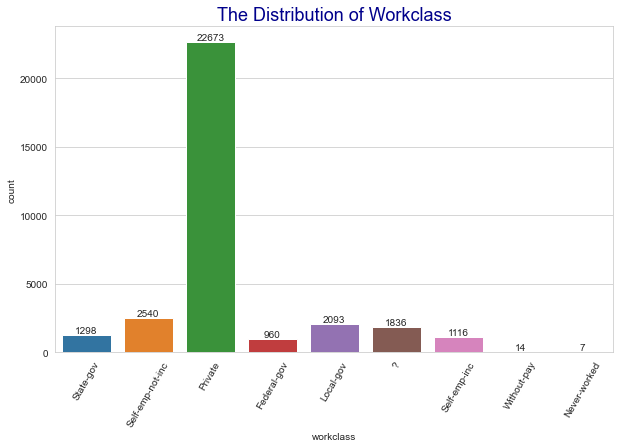

In [243]:
ax = sns.countplot(data=df, x="workclass")

plt.title("The Distribution of Workclass", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

In [26]:
# Replace "?" values with "Unkown"

df.workclass.replace("?", "Unknown", inplace=True)

**Check the count of person in each "salary" levels by workclass groups and visualize it with countplot**

In [245]:
df.groupby("workclass").salary.value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: salary, dtype: int64

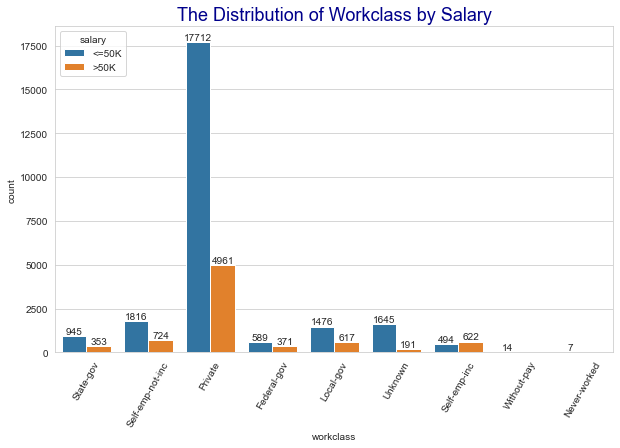

In [246]:
ax = sns.countplot(data = df, x="workclass", hue = "salary")

plt.title("The Distribution of Workclass by Salary", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

**Check the percentage distribution of person in each "salary" levels by each workclass groups and visualize it with bar plot**

In [247]:
workclass = df.groupby("workclass").salary.value_counts(normalize=True)
workclass

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: salary, dtype: float64

In [248]:
workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns = {"salary" : "percentage"}, inplace = True)

workclass_df.reset_index(inplace = True)

workclass_df.sort_values(by = ["workclass", "salary"], inplace=True)
workclass_df

workclass salary  percentage
0        Federal-gov  <=50K       0.614
1        Federal-gov   >50K       0.386
2          Local-gov  <=50K       0.705
3          Local-gov   >50K       0.295
4       Never-worked  <=50K       1.000
5            Private  <=50K       0.781
6            Private   >50K       0.219
8       Self-emp-inc  <=50K       0.443
7       Self-emp-inc   >50K       0.557
9   Self-emp-not-inc  <=50K       0.715
10  Self-emp-not-inc   >50K       0.285
11         State-gov  <=50K       0.728
12         State-gov   >50K       0.272
13           Unknown  <=50K       0.896
14           Unknown   >50K       0.104
15       Without-pay  <=50K       1.000

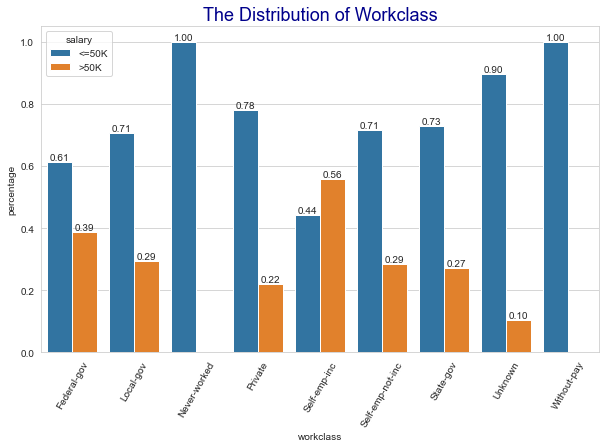

In [249]:
fig, ax = plt.subplots()

ax = sns.barplot(data = workclass_df, x="workclass", y="percentage", hue="salary")

plt.title("The Distribution of Workclass", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f");

**Check the count of person in each workclass groups by "salary" levels and visualize it with countplot**

In [250]:
df.groupby("salary").workclass.value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: workclass, dtype: int64

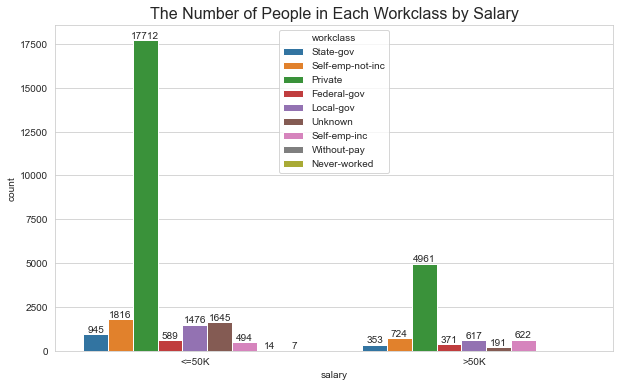

In [251]:
ax = sns.countplot(data=df, x="salary", hue="workclass")

plt.title("The Number of People in Each Workclass by Salary", fontsize=16)
for container in ax.containers:
    ax.bar_label(container);

**Check the the percentage distribution of person in each workclass groups by "salary" levels and visualize it with countplot**

In [252]:
workclass = df.groupby("salary").workclass.value_counts(normalize=True)
workclass

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: workclass, dtype: float64

In [253]:
workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns = {"workclass" : "percentage"}, inplace = True)
workclass_df.reset_index(inplace = True)
workclass_df.sort_values(by = ["salary", "workclass"], inplace=True)
workclass_df

salary         workclass  percentage
5   <=50K       Federal-gov       0.024
3   <=50K         Local-gov       0.060
8   <=50K      Never-worked       0.000
0   <=50K           Private       0.717
6   <=50K      Self-emp-inc       0.020
1   <=50K  Self-emp-not-inc       0.074
4   <=50K         State-gov       0.038
2   <=50K           Unknown       0.067
7   <=50K       Without-pay       0.001
13   >50K       Federal-gov       0.047
12   >50K         Local-gov       0.079
9    >50K           Private       0.633
11   >50K      Self-emp-inc       0.079
10   >50K  Self-emp-not-inc       0.092
14   >50K         State-gov       0.045
15   >50K           Unknown       0.024

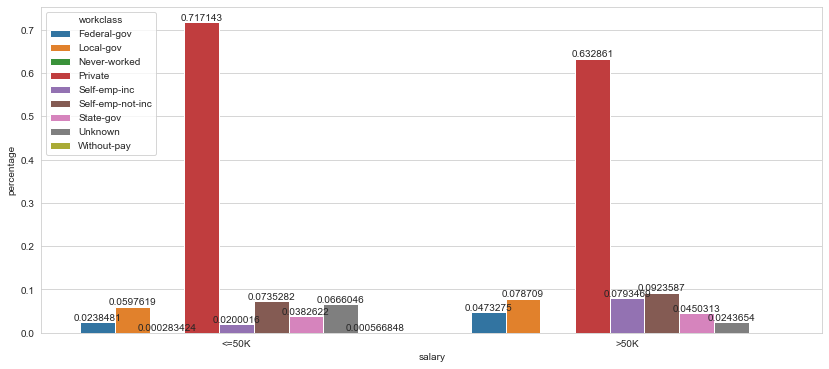

In [254]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=workclass_df, x="salary", y="percentage", hue="workclass")

for container in ax.containers:
    ax.bar_label(container);

**Result :** "Self-emp-inc" work-class has a high ratio in the self group about high-level income. "Private" work-class has a high ratio in the high-income group about high-level income.

## occupation

**Check the count of person in each categories and visualize it with countplot**

In [255]:
df.occupation.value_counts(dropna=False)

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

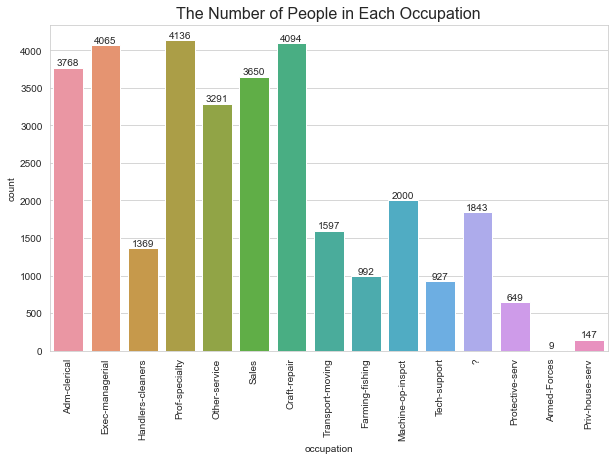

In [256]:
ax = sns.countplot(data=df, x="occupation")

plt.title("The Number of People in Each Occupation", fontsize=16)
plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

In [27]:
# Replace "?" values with "Unknown"

df.occupation.replace("?", "Unknown", inplace=True)

**Check the count of person in each "salary" levels by occupation groups and visualize it with countplot**

In [258]:
df.groupby("occupation").salary.value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

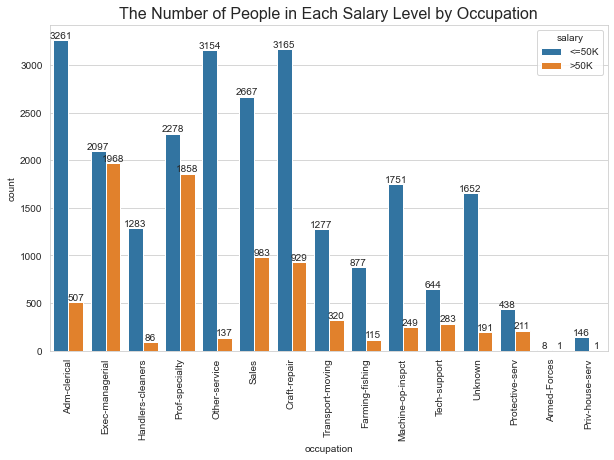

In [259]:
ax = sns.countplot(data=df, x="occupation", hue="salary")

plt.title("The Number of People in Each Salary Level by Occupation", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

**Check the percentage distribution of person in each "salary" levels by each occupation groups and visualize it with bar plot**

In [260]:
occupation = df.groupby("occupation").salary.value_counts(normalize=True)
occupation

occupation         salary
Adm-clerical       <=50K    0.865
                   >50K     0.135
Armed-Forces       <=50K    0.889
                   >50K     0.111
Craft-repair       <=50K    0.773
                   >50K     0.227
Exec-managerial    <=50K    0.516
                   >50K     0.484
Farming-fishing    <=50K    0.884
                   >50K     0.116
Handlers-cleaners  <=50K    0.937
                   >50K     0.063
Machine-op-inspct  <=50K    0.875
                   >50K     0.124
Other-service      <=50K    0.958
                   >50K     0.042
Priv-house-serv    <=50K    0.993
                   >50K     0.007
Prof-specialty     <=50K    0.551
                   >50K     0.449
Protective-serv    <=50K    0.675
                   >50K     0.325
Sales              <=50K    0.731
                   >50K     0.269
Tech-support       <=50K    0.695
                   >50K     0.305
Transport-moving   <=50K    0.800
                   >50K     0.200
Unknown            <=5

In [261]:
occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns = {"salary" : "percentage"}, inplace = True)
occupation_df.reset_index(inplace = True)
occupation_df.sort_values(by = ["occupation", "salary"], inplace=True)
occupation_df

occupation salary  percentage
0        Adm-clerical  <=50K       0.865
1        Adm-clerical   >50K       0.135
2        Armed-Forces  <=50K       0.889
3        Armed-Forces   >50K       0.111
4        Craft-repair  <=50K       0.773
5        Craft-repair   >50K       0.227
6     Exec-managerial  <=50K       0.516
7     Exec-managerial   >50K       0.484
8     Farming-fishing  <=50K       0.884
9     Farming-fishing   >50K       0.116
10  Handlers-cleaners  <=50K       0.937
11  Handlers-cleaners   >50K       0.063
12  Machine-op-inspct  <=50K       0.875
13  Machine-op-inspct   >50K       0.124
14      Other-service  <=50K       0.958
15      Other-service   >50K       0.042
16    Priv-house-serv  <=50K       0.993
17    Priv-house-serv   >50K       0.007
18     Prof-specialty  <=50K       0.551
19     Prof-specialty   >50K       0.449
20    Protective-serv  <=50K       0.675
21    Protective-serv   >50K       0.325
22              Sales  <=50K       0.731
23              Sales   >50K       0.269
24       Tech-support  <=50K       0.695
25       Tech-support   >50K       0.305
26   Transport-moving  <=50K       0.800
27   Transport-moving   >50K       0.200
28            Unknown  <=50K       0.896
29            Unknown   >50K       0.104

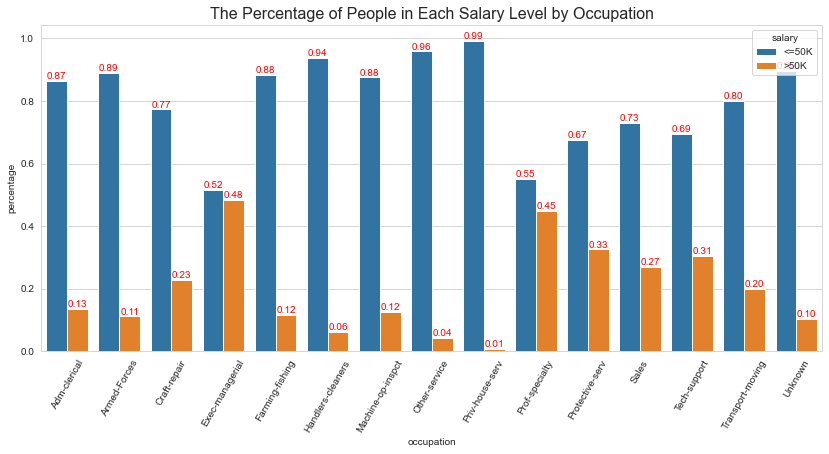

In [262]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=occupation_df, x="occupation", y="percentage", hue="salary")

plt.title("The Percentage of People in Each Salary Level by Occupation", fontsize=16)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', color="r");

**Check the count of person in each occupation groups by "salary" levels and visualize it with countplot**

In [263]:
df.groupby("salary").occupation.value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

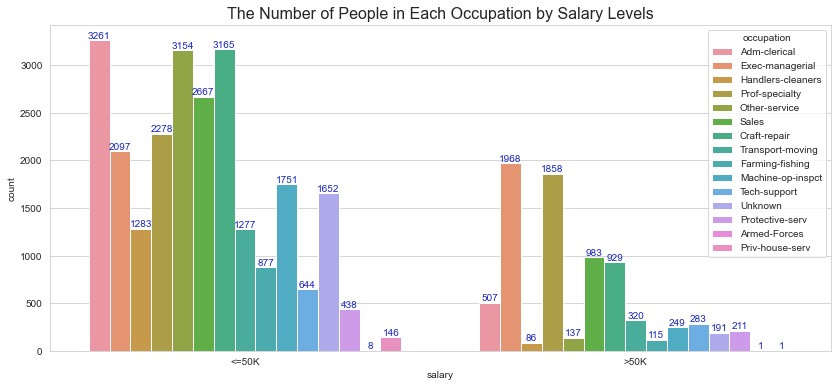

In [264]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.title("The Number of People in Each Occupation by Salary Levels", fontsize=16);
ax = sns.countplot(data=df, x="salary", hue="occupation")

for container in ax.containers:
    ax.bar_label(container, color="#1927BD");

**Check the the percentage distribution of person in each occupation groups by "salary" levels and visualize it with bar plot**

In [265]:
occupation = df.groupby("salary").occupation.value_counts(normalize=True)
occupation

salary  occupation       
<=50K   Adm-clerical        0.132
        Craft-repair        0.128
        Other-service       0.128
        Sales               0.108
        Prof-specialty      0.092
        Exec-managerial     0.085
        Machine-op-inspct   0.071
        Unknown             0.067
        Handlers-cleaners   0.052
        Transport-moving    0.052
        Farming-fishing     0.036
        Tech-support        0.026
        Protective-serv     0.018
        Priv-house-serv     0.006
        Armed-Forces        0.000
>50K    Exec-managerial     0.251
        Prof-specialty      0.237
        Sales               0.125
        Craft-repair        0.119
        Adm-clerical        0.065
        Transport-moving    0.041
        Tech-support        0.036
        Machine-op-inspct   0.032
        Protective-serv     0.027
        Unknown             0.024
        Other-service       0.017
        Farming-fishing     0.015
        Handlers-cleaners   0.011
        Armed-Forces  

In [266]:
occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns = {"occupation" : "percentage"}, inplace = True)
occupation_df.reset_index(inplace = True)
occupation_df.sort_values(by = ["salary", "occupation"], inplace=True)
occupation_df

salary         occupation  percentage
0   <=50K       Adm-clerical       0.132
14  <=50K       Armed-Forces       0.000
1   <=50K       Craft-repair       0.128
5   <=50K    Exec-managerial       0.085
10  <=50K    Farming-fishing       0.036
8   <=50K  Handlers-cleaners       0.052
6   <=50K  Machine-op-inspct       0.071
2   <=50K      Other-service       0.128
13  <=50K    Priv-house-serv       0.006
4   <=50K     Prof-specialty       0.092
12  <=50K    Protective-serv       0.018
3   <=50K              Sales       0.108
11  <=50K       Tech-support       0.026
9   <=50K   Transport-moving       0.052
7   <=50K            Unknown       0.067
19   >50K       Adm-clerical       0.065
28   >50K       Armed-Forces       0.000
18   >50K       Craft-repair       0.119
15   >50K    Exec-managerial       0.251
26   >50K    Farming-fishing       0.015
27   >50K  Handlers-cleaners       0.011
22   >50K  Machine-op-inspct       0.032
25   >50K      Other-service       0.017
29   >50K    Priv-house-serv       0.000
16   >50K     Prof-specialty       0.237
23   >50K    Protective-serv       0.027
17   >50K              Sales       0.125
21   >50K       Tech-support       0.036
20   >50K   Transport-moving       0.041
24   >50K            Unknown       0.024

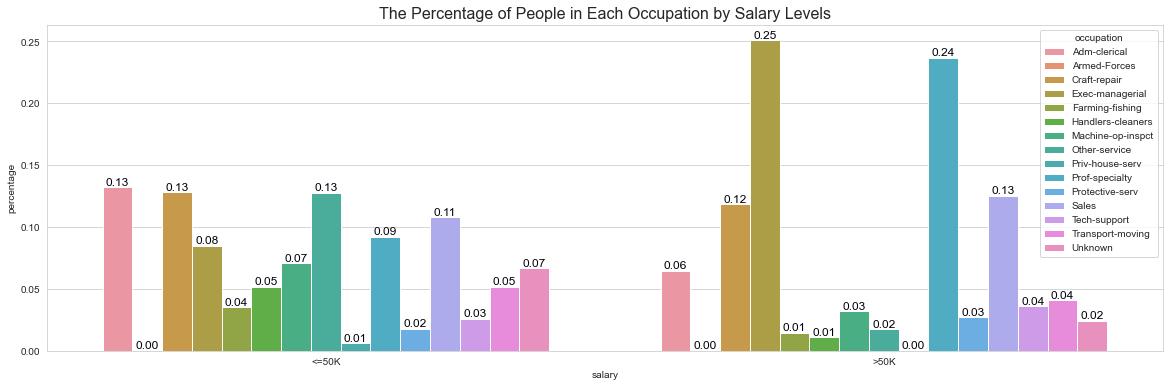

In [267]:
fig, ax = plt.subplots(figsize=(20, 6))

ax = sns.barplot(data=occupation_df, x="salary", y="percentage", hue="occupation")

plt.title("The Percentage of People in Each Occupation by Salary Levels", fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", color="#00010A", fontsize=12);

**Result :** "Exec-managerial" and "Prof-specialty" occupations have a high ratio of high-level income both in the self group and in the high-income group.

## race

**Check the count of person in each categories and visualize it with countplot**

In [268]:
df.race.value_counts(dropna=False)

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

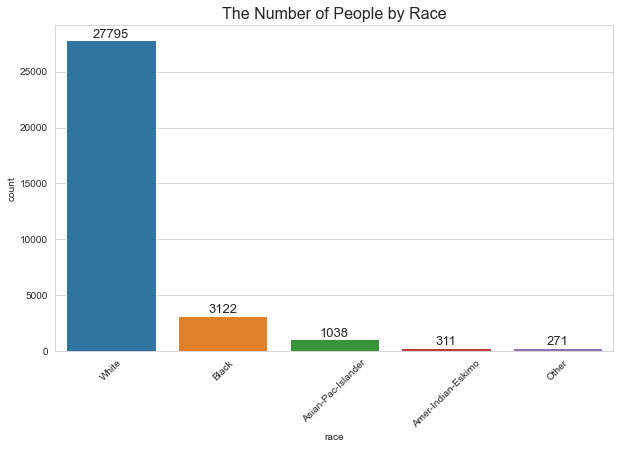

In [269]:
ax = sns.countplot(data=df, x="race")

plt.title("The Number of People by Race", fontsize=16)
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=13);

**Check the count of person in each "salary" levels by races and visualize it with countplot**

In [270]:
df.groupby("race").salary.value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: salary, dtype: int64

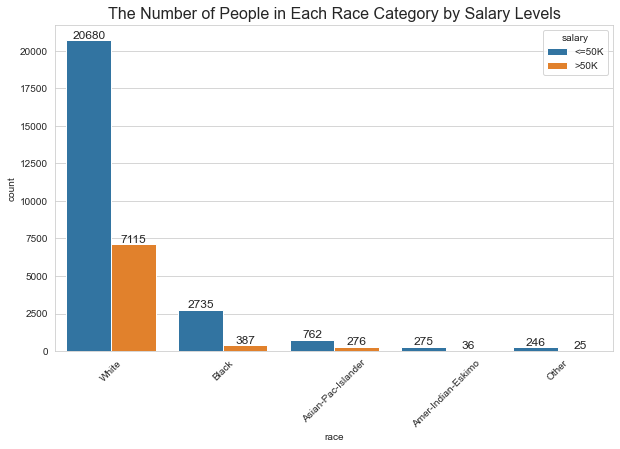

In [271]:
ax = sns.countplot(data=df, x="race", hue="salary")

plt.title("The Number of People in Each Race Category by Salary Levels", fontsize=16);
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**Check the percentage distribution of person in each "salary" levels by each races and visualize it with pie plot**

In [272]:
race = df.groupby("race").salary.value_counts(normalize=True)
race

race                salary
Amer-Indian-Eskimo  <=50K    0.884
                    >50K     0.116
Asian-Pac-Islander  <=50K    0.734
                    >50K     0.266
Black               <=50K    0.876
                    >50K     0.124
Other               <=50K    0.908
                    >50K     0.092
White               <=50K    0.744
                    >50K     0.256
Name: salary, dtype: float64

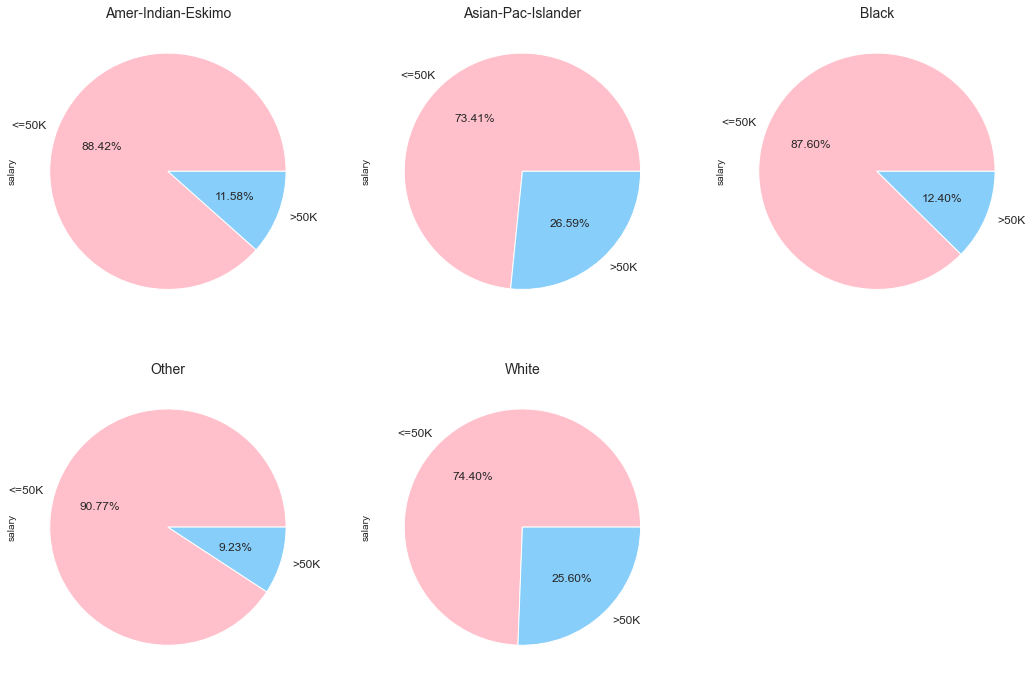

In [273]:
plt.figure(figsize = (18, 12))
index = 1
for i in [0, 2, 4, 6, 8]:
    plt.subplot(2,3,index)
    race[i:i+2].plot.pie(subplots=True,
                         labels=["<=50K", ">50K"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(race.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Check the count of person in each races by "salary" levels and visualize it with countplot**

In [274]:
df.groupby("salary").race.value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

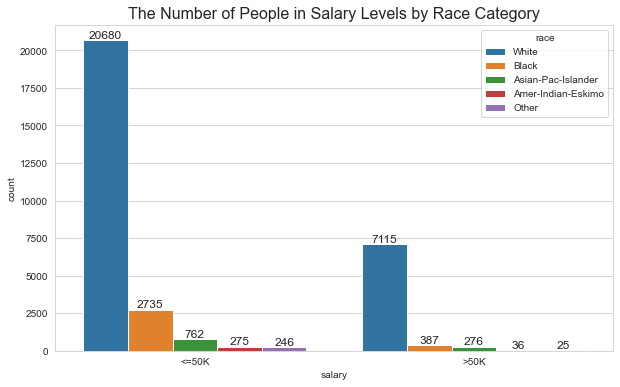

In [275]:
ax = sns.countplot(data=df, x="salary", hue="race")

plt.title("The Number of People in Salary Levels by Race Category", fontsize=16);
for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**Check the the percentage distribution of person in each races by "salary" levels and visualize it with bar plot**

In [276]:
race = df.groupby("salary").race.value_counts(normalize=True)
race

salary  race              
<=50K   White                0.837
        Black                0.111
        Asian-Pac-Islander   0.031
        Amer-Indian-Eskimo   0.011
        Other                0.010
>50K    White                0.908
        Black                0.049
        Asian-Pac-Islander   0.035
        Amer-Indian-Eskimo   0.005
        Other                0.003
Name: race, dtype: float64

In [277]:
race_df = pd.DataFrame(race)
race_df.rename(columns = {"race" : "percentage"}, inplace = True)
race_df.reset_index(inplace = True)
race_df.sort_values(by = ["salary", "race"], inplace=True)
race_df

salary                race  percentage
3  <=50K  Amer-Indian-Eskimo       0.011
2  <=50K  Asian-Pac-Islander       0.031
1  <=50K               Black       0.111
4  <=50K               Other       0.010
0  <=50K               White       0.837
8   >50K  Amer-Indian-Eskimo       0.005
7   >50K  Asian-Pac-Islander       0.035
6   >50K               Black       0.049
9   >50K               Other       0.003
5   >50K               White       0.908

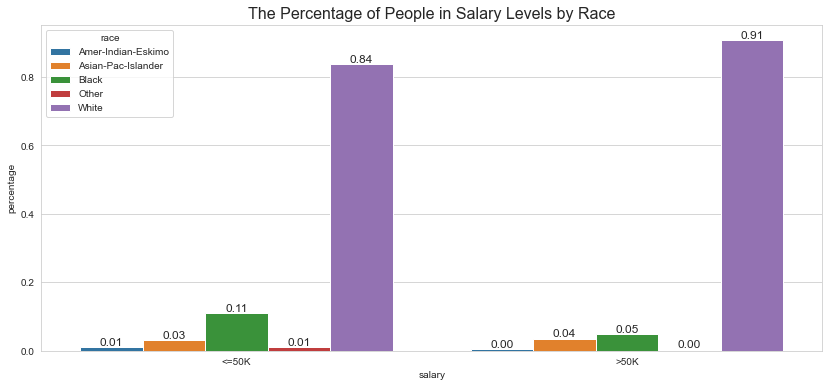

In [278]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=race_df, x="salary", y="percentage", hue="race")

plt.title("The Percentage of People in Salary Levels by Race", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

**Result :** "Asian-Pac-Islander" and "White" races has a high ratio in the self group about high-level income. "White" race has a high ratio in the high-income group about high-level income.

## gender

**Check the count of person in each gender and visualize it with countplot**

In [279]:
df.gender.value_counts(dropna=False)

Male      21775
Female    10762
Name: gender, dtype: int64

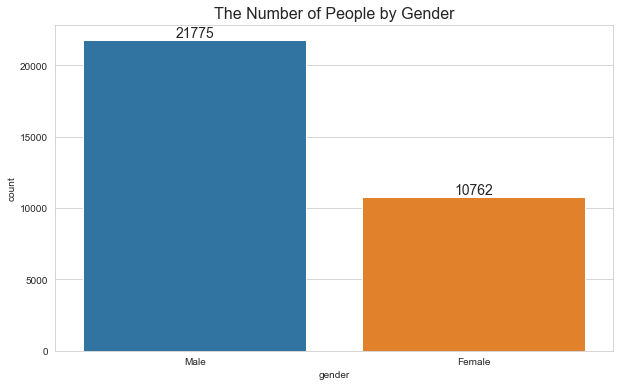

In [280]:
ax = sns.countplot(data=df, x="gender")

plt.title("The Number of People by Gender", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=14);

**Check the count of person in each "salary" levels by gender and visualize it with countplot**

In [281]:
df.groupby("gender").salary.value_counts()

gender  salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: salary, dtype: int64

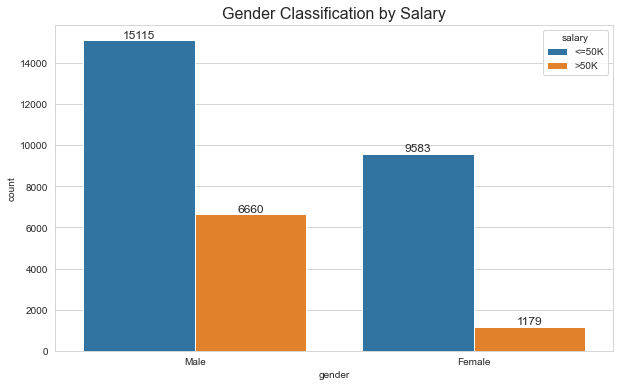

In [282]:
ax = sns.countplot(data=df, x="gender", hue="salary")

plt.title("Gender Classification by Salary", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**Check the percentage distribution of person in each "salary" levels by each gender and visualize it with pie plot**

In [283]:
gender = df.groupby("gender").salary.value_counts(normalize=True)
gender

gender  salary
Female  <=50K    0.890
        >50K     0.110
Male    <=50K    0.694
        >50K     0.306
Name: salary, dtype: float64

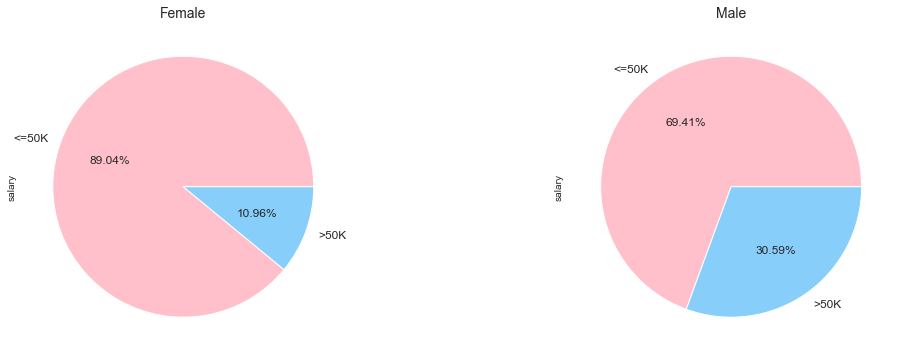

In [284]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    gender[i:i+2].plot.pie(subplots=True,
                           labels=["<=50K", ">50K"],
                           autopct="%.2f%%",
                           textprops={'fontsize': 12},
                           colors=['pink', 'lightskyblue'],
                           )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Check the count of person in each gender by "salary" levels and visualize it with countplot**

In [285]:
df.groupby("salary").gender.value_counts()

salary  gender
<=50K   Male      15115
        Female     9583
>50K    Male       6660
        Female     1179
Name: gender, dtype: int64

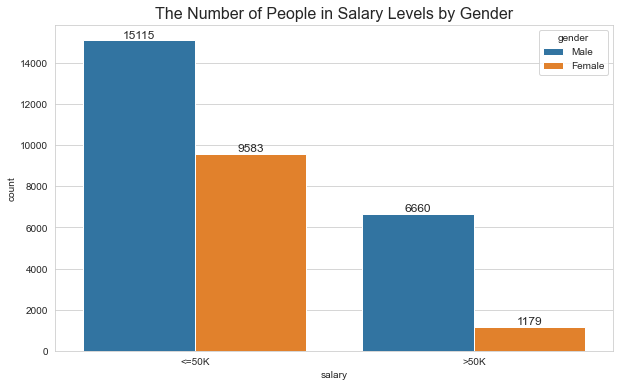

In [286]:
ax = sns.countplot(data=df, x="salary", hue="gender")

plt.title("The Number of People in Salary Levels by Gender", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**Check the the percentage distribution of person in each gender by "salary" levels and visualize it with pie plot**

In [287]:
gender = df.groupby("salary").gender.value_counts(normalize=True)
gender

salary  gender
<=50K   Male     0.612
        Female   0.388
>50K    Male     0.850
        Female   0.150
Name: gender, dtype: float64

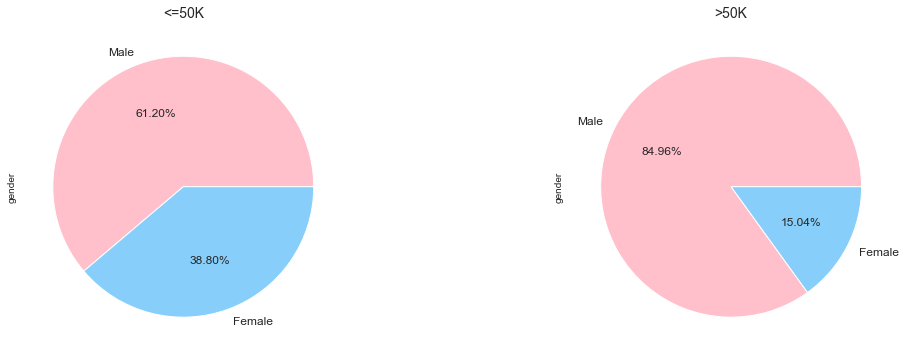

In [288]:
plt.figure(figsize=(18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    gender[i:i+2].plot.pie(subplots=True,
                         labels=["Male", "Female"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Result :** We can easily say that males have earned more income than females.

## native_country

**Check the count of person in each categories and visualize it with countplot**

In [289]:
df.native_country.value_counts(dropna=False)

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

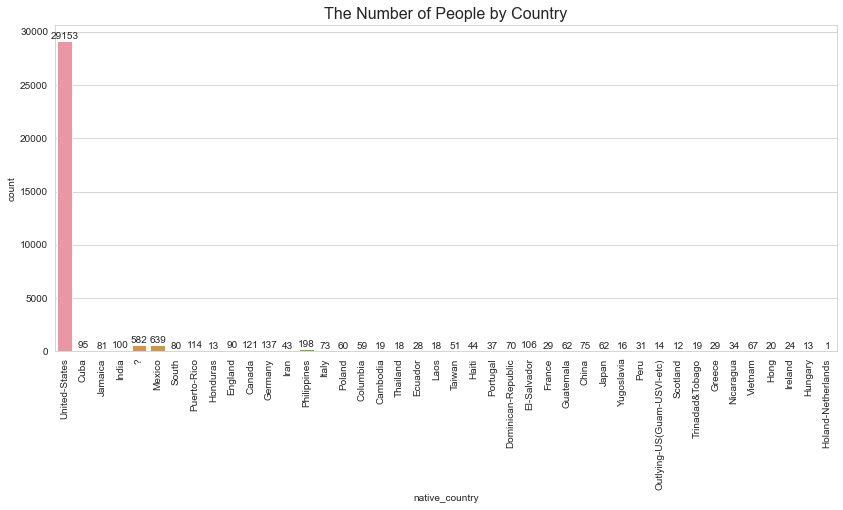

In [290]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df, x="native_country")

plt.title("The Number of People by Country", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [28]:
# Replace "?" values with "Unknown"

df.native_country.replace("?", "Unknown", inplace = True)

In [29]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [30]:
df.native_country.apply(mapping_native_country).value_counts(dropna=False)

US        29153
Others     3384
Name: native_country, dtype: int64

In [31]:
# By using "mapping_native_country" def function above, create a new column named "native_country_summary"

df["native_country_summary"] = df.native_country.apply(mapping_native_country)
df["native_country_summary"]

0            US
1            US
2            US
3            US
4        Others
          ...  
32556        US
32557        US
32558        US
32559        US
32560        US
Name: native_country_summary, Length: 32537, dtype: object

**Visualize the count of person in each new categories (US, Others)**

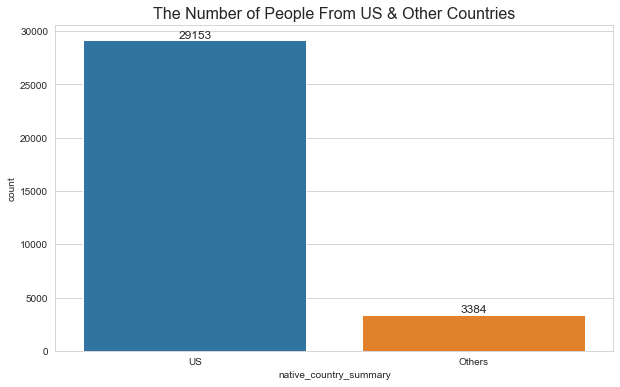

In [295]:
ax = sns.countplot(data=df, x="native_country_summary")

plt.title("The Number of People From US & Other Countries", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**Check the count of person in each "salary" levels by these new native countries (US, Others) and visualize it with countplot**

In [296]:
df.groupby("native_country_summary").salary.value_counts()

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: salary, dtype: int64

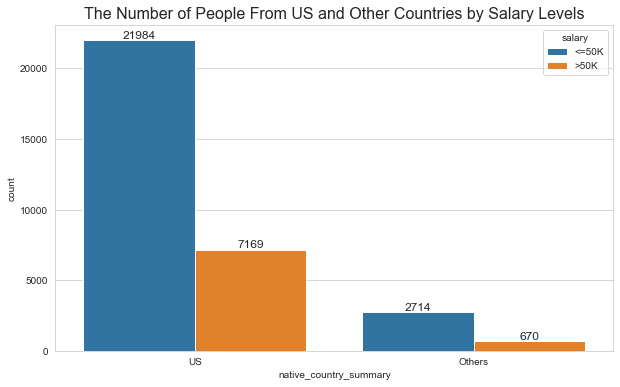

In [297]:
ax = sns.countplot(data=df, x="native_country_summary", hue="salary")

plt.title("The Number of People From US and Other Countries by Salary Levels", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**Check the percentage distribution of person in each "salary" levels by each new native countries (US, Others) and visualize it with pie plot separately**

In [298]:
country = df.groupby(["native_country_summary"]).salary.value_counts(normalize=True)
country

native_country_summary  salary
Others                  <=50K    0.802
                        >50K     0.198
US                      <=50K    0.754
                        >50K     0.246
Name: salary, dtype: float64

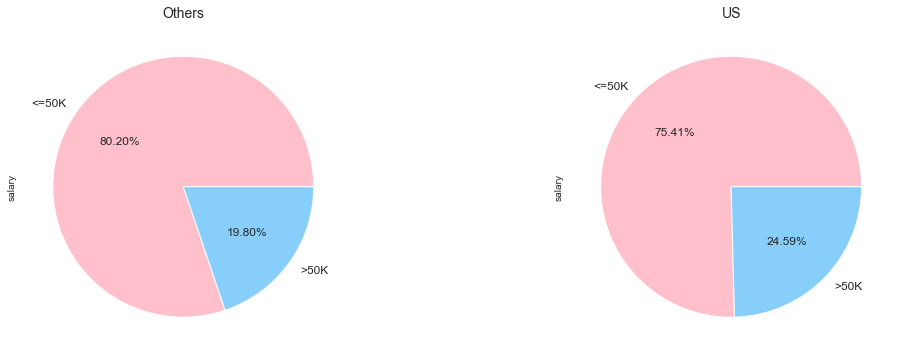

In [299]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Check the count of person in each these new native countries (US, Others) by "salary" levels and visualize it with countplot**

In [300]:
df.groupby("salary").native_country_summary.value_counts()

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: native_country_summary, dtype: int64

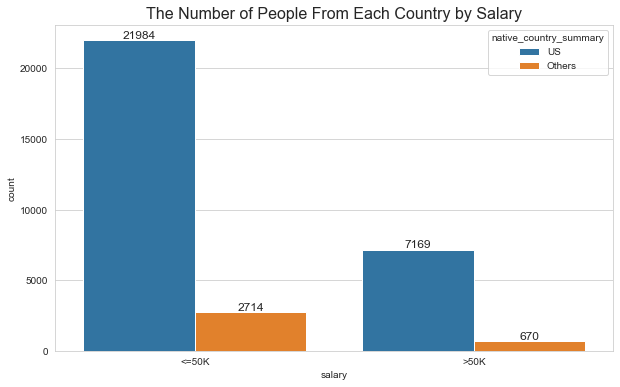

In [301]:
ax = sns.countplot(data=df, x="salary", hue="native_country_summary")

plt.title("The Number of People From Each Country by Salary", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

**Check the the percentage distribution of person in each these new native countries (US, Others) by "salary" levels and visualize it with pie plot separately**

In [302]:
country = df.groupby(["salary"]).native_country_summary.value_counts(normalize=True)
country

salary  native_country_summary
<=50K   US                       0.890
        Others                   0.110
>50K    US                       0.915
        Others                   0.085
Name: native_country_summary, dtype: float64

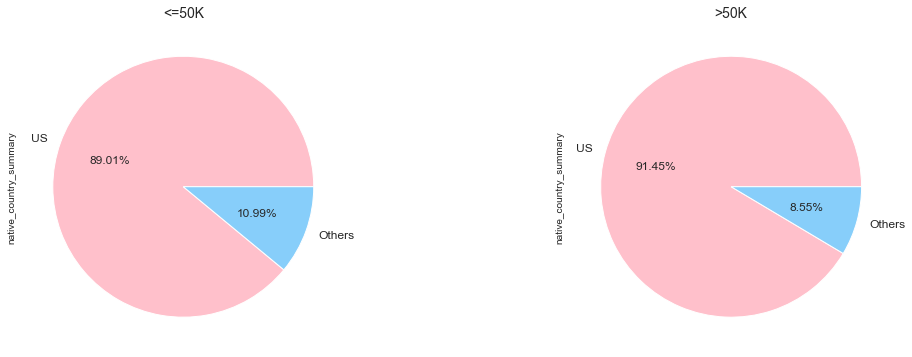

In [303]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["US", "Others"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Result :** "United States" has a high ratio of high-level income both in the self group and in the high-income group.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Other Specific Analysis Questions</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### 1. What is the average age of males and females by income level?

In [304]:
df.groupby(["salary", "gender"]).age.mean()

salary  gender
<=50K   Female   36.217
        Male     37.149
>50K    Female   42.126
        Male     44.627
Name: age, dtype: float64

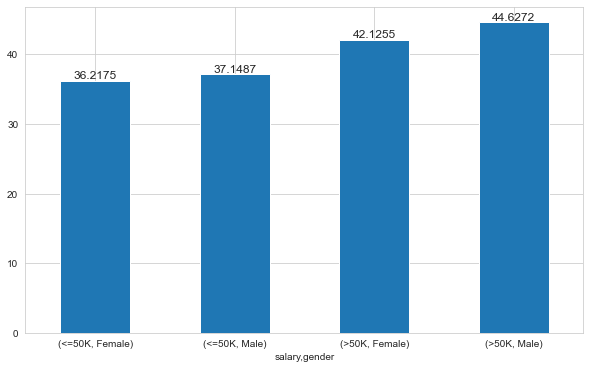

In [305]:
fig, ax = plt.subplots()

ax = df.groupby(["salary", "gender"]).age.mean().plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

In [306]:
age = df.groupby(["salary", "gender"])[["age"]].mean().reset_index()
age

salary  gender    age
0  <=50K  Female 36.217
1  <=50K    Male 37.149
2   >50K  Female 42.126
3   >50K    Male 44.627

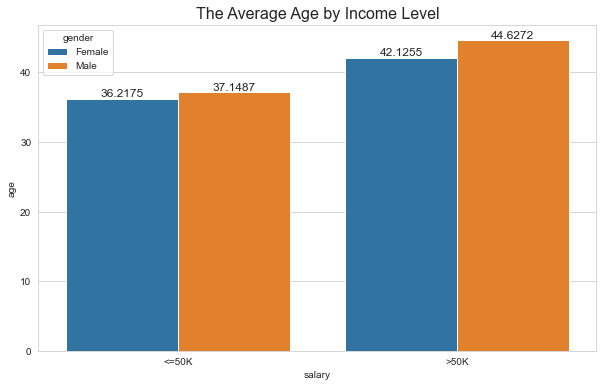

In [307]:
fig, ax = plt.subplots()

ax = sns.barplot(data=age, x="salary", y="age", hue="gender")

plt.title("The Average Age by Income Level", fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

### 2. What is the workclass percentages of Americans in high-level income group?

In [308]:
workclass_US = df[(df.salary == ">50K") & (df.native_country_summary == "US")]\
.workclass.value_counts(dropna=False, normalize = True)*100
workclass_US

Private            63.314
Self-emp-not-inc    9.192
Local-gov           8.021
Self-emp-inc        7.784
Federal-gov         4.687
State-gov           4.547
Unknown             2.455
Name: workclass, dtype: float64

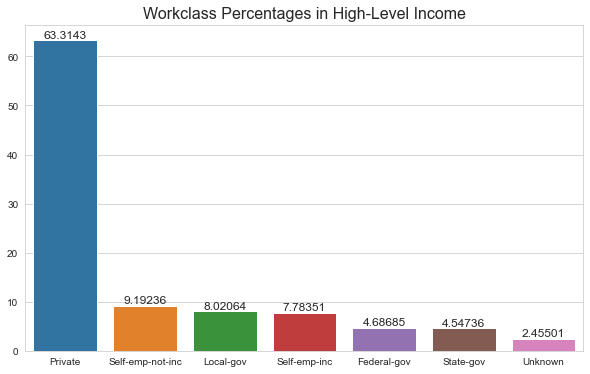

In [309]:
fig, ax = plt.subplots()

ax = sns.barplot(x=workclass_US.index, y=workclass_US.values)

plt.title("Workclass Percentages in High-Level Income", fontsize=16)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

The majority of US nationals( 63%) that make money more than 50K work in private sector.

### 3. What is the occupation percentages of Americans who work as "Private" workclass in high-level income group?

In [310]:
occupation_US = df[(df.salary == ">50K") & (df.native_country_summary == "US") & (df.workclass == "Private")]\
                  .occupation.value_counts(dropna=False, normalize=True)*100 
occupation_US

Exec-managerial     26.438
Prof-specialty      19.476
Craft-repair        14.695
Sales               14.475
Adm-clerical         6.389
Transport-moving     5.442
Tech-support         4.428
Machine-op-inspct    4.428
Other-service        1.674
Handlers-cleaners    1.344
Farming-fishing      0.595
Protective-serv      0.595
Priv-house-serv      0.022
Name: occupation, dtype: float64

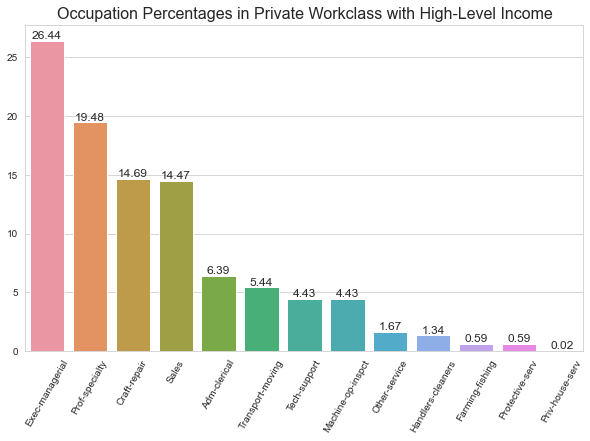

In [311]:
fig, ax = plt.subplots()

ax = sns.barplot(x=occupation_US.index, y=occupation_US.values)

plt.title("Occupation Percentages in Private Workclass with High-Level Income", fontsize=16)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

More than half of the US national (about 60%) working in private sector are clustered in three occupation groups: "Executive-managerial", "prof-specialty", "craft-repair". The last three are followed by "farming-fishing", "Protective-service", and "Priv-house-service", which may require relatively less education but more hours-per-week work.

### 4. What is the education level percentages of Asian-Pac-Islander race group in high-level income group?

In [312]:
Asian_Pac_Islander = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander")]\
                     .education.value_counts(dropna = False, normalize=True)*100 
Asian_Pac_Islander

Bachelors      35.145
Masters        15.580
HS-grad        12.319
Some-college   11.957
Prof-school     9.783
Doctorate       6.522
Assoc-voc       3.261
Assoc-acdm      2.899
5th-6th         1.087
9th             0.362
11th            0.362
10th            0.362
12th            0.362
Name: education, dtype: float64

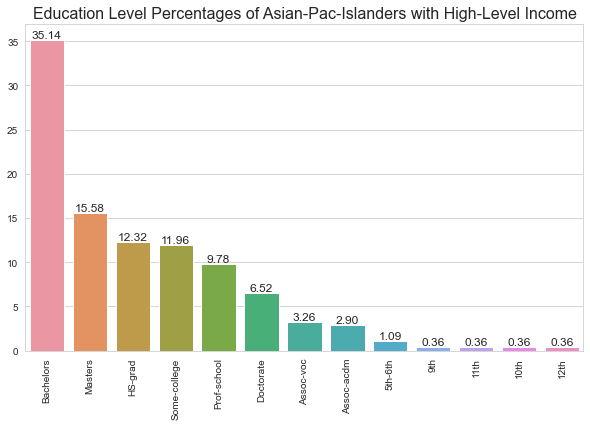

In [313]:
fig, ax = plt.subplots()

ax = sns.barplot(x = Asian_Pac_Islander.index, y = Asian_Pac_Islander.values)

plt.title("Education Level Percentages of Asian-Pac-Islanders with High-Level Income", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

Over 56% of Asian-Pac-Islanders in high-level income group have Bachelors or higher degree.

### 5. What is the occupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group?

In [314]:
Asian_Pac_Islander = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander") & (df.education == "Bachelors")]\
                     .occupation.value_counts(dropna=False, normalize=True)*100 
Asian_Pac_Islander

Exec-managerial     27.835
Prof-specialty      25.773
Adm-clerical        12.371
Sales                9.278
Other-service        9.278
Craft-repair         7.216
Tech-support         3.093
Protective-serv      2.062
Transport-moving     1.031
Machine-op-inspct    1.031
Farming-fishing      1.031
Name: occupation, dtype: float64

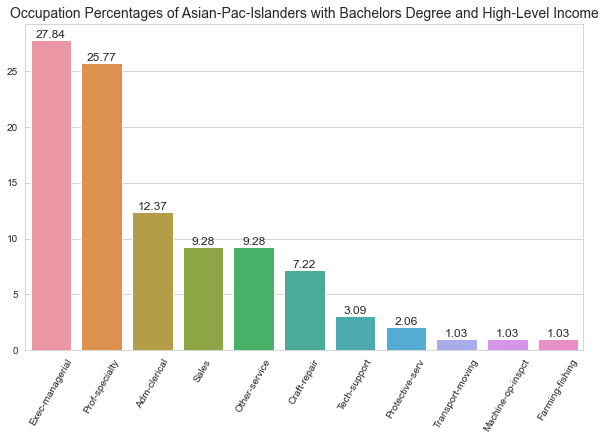

In [315]:
fig, ax = plt.subplots()

ax = sns.barplot(x = Asian_Pac_Islander.index, y = Asian_Pac_Islander.values)

plt.title("Occupation Percentages of Asian-Pac-Islanders with Bachelors Degree and High-Level Income", fontsize=14)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

About 66 percent of Asian-Pac-Islanders who has a Bachelors degree in high-level income group work in three occupatinal groups: "Exec-managerial" with 27.84%, "Prof-specialty" with 25.77%, and "Adm-clerical" with 2.37%.

### 6. What is the mean of working hours per week by gender for education level, workclass and marital status? Try to plot all required in one figure.

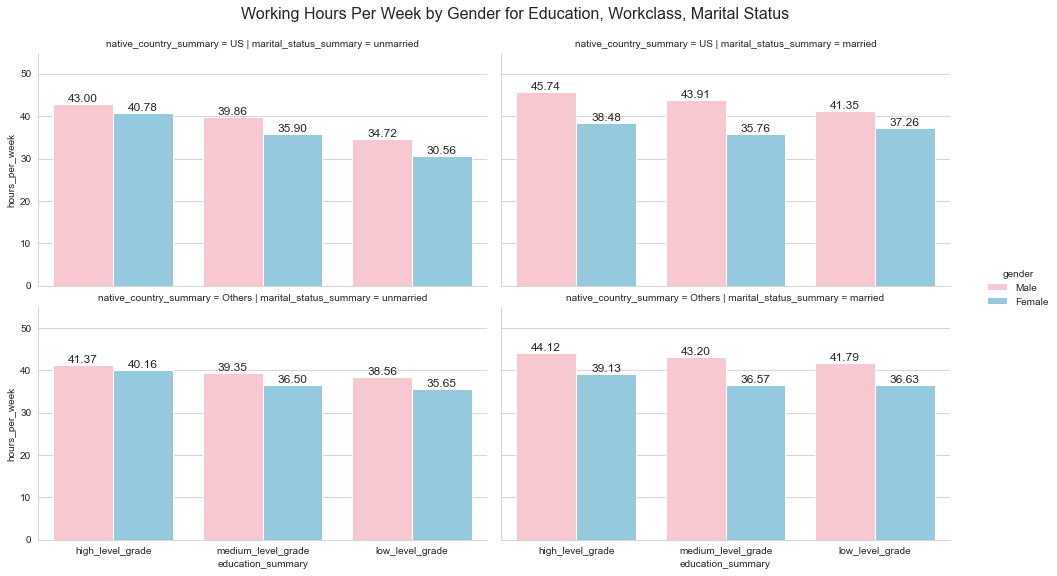

In [316]:
g = sns.catplot(x="education_summary",
                y="hours_per_week",
                data=df,
                kind="bar",
                estimator= np.mean,
                hue="gender",
                col="marital_status_summary",
                row="native_country_summary",
                ci=None,
                palette=sns.color_palette(['pink', 'skyblue']));

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Working Hours Per Week by Gender for Education, Workclass, Marital Status', fontsize=16)

# iterate through axes
for ax in g.axes.ravel():

    # add annotations
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", fontsize=12);
    
    ax.margins(y=0.2)

plt.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dropping Similar & Unneccessary Features</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32537 non-null  int64  
 1   workclass               32537 non-null  object 
 2   fnlwgt                  32537 non-null  int64  
 3   education               32537 non-null  object 
 4   education_num           31735 non-null  float64
 5   marital_status          32537 non-null  object 
 6   occupation              32537 non-null  object 
 7   relationship            32537 non-null  object 
 8   race                    32537 non-null  object 
 9   gender                  32537 non-null  object 
 10  capital_gain            32537 non-null  int64  
 11  capital_loss            32537 non-null  int64  
 12  hours_per_week          32537 non-null  int64  
 13  native_country          32537 non-null  object 
 14  salary                  32537 non-null

In [33]:
# Drop the columns of "education", "education_num", "relationship", "marital_status", "native_country" permanently
df.drop(columns = ["education", "education_num", "relationship", "marital_status", "native_country"], inplace=True)

In [319]:
df.head()

age         workclass  fnlwgt         occupation   race  gender  \
0   39         State-gov   77516       Adm-clerical  White    Male   
1   50  Self-emp-not-inc   83311    Exec-managerial  White    Male   
2   38           Private  215646  Handlers-cleaners  White    Male   
3   53           Private  234721  Handlers-cleaners  Black    Male   
4   28           Private  338409     Prof-specialty  Black  Female   

   capital_gain  capital_loss  hours_per_week salary   education_summary  \
0          2174             0              40  <=50K    high_level_grade   
1             0             0              13  <=50K    high_level_grade   
2             0             0              40  <=50K  medium_level_grade   
3             0             0              40  <=50K     low_level_grade   
4             0             0              40  <=50K    high_level_grade   

  marital_status_summary native_country_summary  
0              unmarried                     US  
1                married                     US  
2              unmarried                     US  
3                married                     US  
4                married                 Others

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Missing Value</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**Check the missing values for all features basically**

In [320]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

**Besides, it's time to detect the duplicated values now, if there have been, drop them permanently. Remember that we toke care of them before at the beginning of our analysis. Let's see what happens:**

In [36]:
df.shape

(32537, 13)

In [37]:
df.duplicated().value_counts()  

False    32516
True        21
dtype: int64

In [38]:
df.drop_duplicates(keep='first', inplace=True)  

In [39]:
df.shape

(32516, 13)

In [40]:
# As you remember we checked it at the begining of the analysis and "relationship" feature had more than one types of data

def check_obj_columns(df):
    '''
    Returns nothing or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column {} has mixed object types.".format(col))

check_obj_columns(df)

**1. It seems that there is no missing value. But we know that "workclass", and "occupation" features have missing values as the "Unknown" string values.**

**2. Decide if drop these "Unknown" string values or not**

In [41]:
df.workclass.value_counts()

Private             22653
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1835
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [42]:
df.occupation.value_counts()

Prof-specialty       4136
Craft-repair         4089
Exec-managerial      4065
Adm-clerical         3762
Sales                3648
Other-service        3288
Machine-op-inspct    1997
Unknown              1842
Transport-moving     1597
Handlers-cleaners    1368
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [43]:
df[df.occupation == "Unknown"].workclass.value_counts()

Unknown         1835
Never-worked       7
Name: workclass, dtype: int64

In [44]:
# As seen, it is almost imposibble to extract some insights from the output

df[df.occupation == "Unknown"]

age workclass  fnlwgt occupation                race  gender  \
27      54   Unknown  180211    Unknown  Asian-Pac-Islander    Male   
61      32   Unknown  293936    Unknown               White    Male   
69      25   Unknown  200681    Unknown               White    Male   
77      67   Unknown  212759    Unknown               White    Male   
106     17   Unknown  304873    Unknown               White  Female   
...    ...       ...     ...        ...                 ...     ...   
32530   35   Unknown  320084    Unknown               White  Female   
32531   30   Unknown   33811    Unknown  Asian-Pac-Islander  Female   
32539   71   Unknown  287372    Unknown               White    Male   
32541   41   Unknown  202822    Unknown               Black  Female   
32542   72   Unknown  129912    Unknown               White    Male   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
27                0             0              60   >50K  medium_level_grade   
61                0             0              40  <=50K     low_level_grade   
69                0             0              40  <=50K  medium_level_grade   
77                0             0               2  <=50K     low_level_grade   
106           34095             0              32  <=50K     low_level_grade   
...             ...           ...             ...    ...                 ...   
32530             0             0              55   >50K    high_level_grade   
32531             0             0              99  <=50K    high_level_grade   
32539             0             0              10   >50K    high_level_grade   
32541             0             0              32  <=50K  medium_level_grade   
32542             0             0              25  <=50K  medium_level_grade   

      marital_status_summary native_country_summary  
27                   married                 Others  
61                   married                 Others  
69                 unmarried                     US  
77                   married                     US  
106                unmarried                     US  
...                      ...                    ...  
32530                married                     US  
32531              unmarried                     US  
32539                married                     US  
32541              unmarried                     US  
32542                married                     US  

[1842 rows x 13 columns]

In [45]:
df[df.occupation == "Unknown"].groupby(["occupation", "workclass"])["salary"].agg(pd.Series.mode)

occupation  workclass   
Unknown     Never-worked    <=50K
            Unknown         <=50K
Name: salary, dtype: object

In [46]:
df[df.occupation == "Unknown"].groupby(["occupation", "workclass"])\
.agg({"marital_status_summary": pd.Series.mode, "salary": pd.Series.mode, "native_country_summary": pd.Series.mode, "education_summary": pd.Series.mode, "race": pd.Series.mode, "gender": pd.Series.mode})

# df[df.occupation == "Unknown"].groupby(["occupation", "workclass"])["marital_status_summary", "salary", "native_country_summary", "education_summary", "race", "gender"]\
#                               .apply(lambda x : x.agg(pd.Series.mode))

marital_status_summary salary native_country_summary  \
occupation workclass                                                           
Unknown    Never-worked              unmarried  <=50K                     US   
           Unknown                   unmarried  <=50K                     US   

                          education_summary   race gender  
occupation workclass                                       
Unknown    Never-worked     low_level_grade  White   Male  
           Unknown       medium_level_grade  White   Male

**Even if you may prefer to fill them with the findings above; however, we will NOT pick up this approach since we assume that we have enough observation to continue for analysis.** 

In [47]:
# So, let's assign these "Unknown" values to "NaN"

df.replace("Unknown", np.nan, inplace=True)

In [48]:
df.isnull().sum()

age                          0
workclass                 1835
fnlwgt                       0
occupation                1842
race                         0
gender                       0
capital_gain                 0
capital_loss                 0
hours_per_week               0
salary                       0
education_summary            0
marital_status_summary       0
native_country_summary       0
dtype: int64

In [49]:
# Drop missing values in df permanently

df.dropna(inplace=True)

In [50]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30674 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30674 non-null  int64 
 1   workclass               30674 non-null  object
 2   fnlwgt                  30674 non-null  int64 
 3   occupation              30674 non-null  object
 4   race                    30674 non-null  object
 5   gender                  30674 non-null  object
 6   capital_gain            30674 non-null  int64 
 7   capital_loss            30674 non-null  int64 
 8   hours_per_week          30674 non-null  int64 
 9   salary                  30674 non-null  object
 10  education_summary       30674 non-null  object
 11  marital_status_summary  30674 non-null  object
 12  native_country_summary  30674 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### Boxplot and Histplot for all numeric features


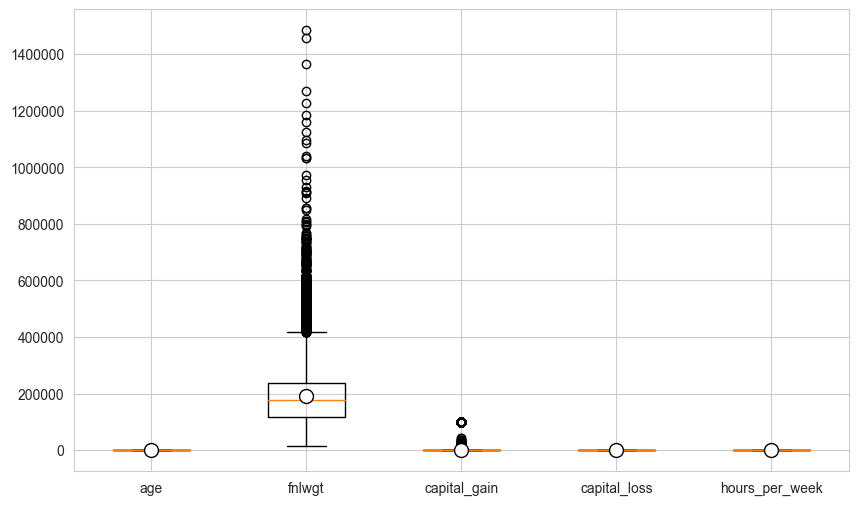

In [52]:
plt.boxplot((df[df.select_dtypes('number').columns]), 
            labels=df.select_dtypes('number').columns,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y')
plt.show()

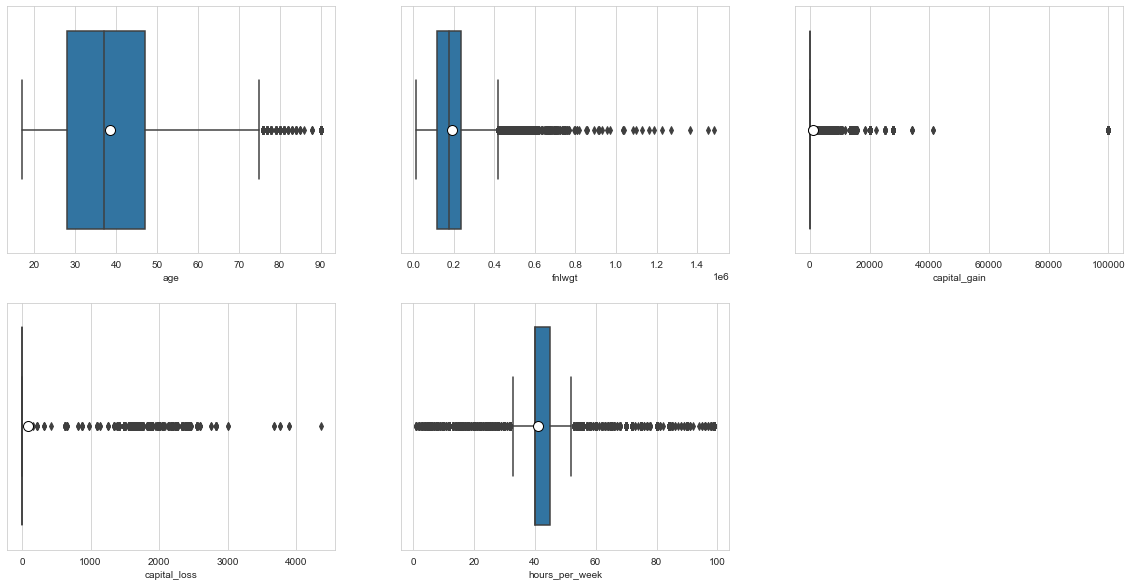

In [330]:
index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2, 3, index)
    sns.boxplot(x=feature, 
                data=df, 
                whis=1.5,
                showmeans=True,                                 
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
    plt.ticklabel_format(style='plain', axis='x')

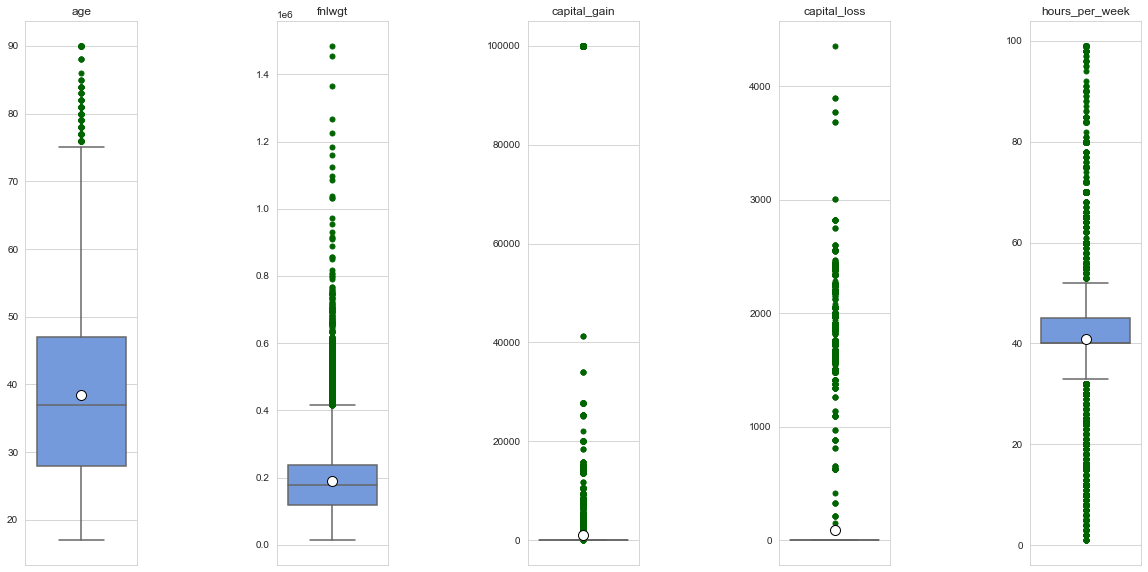

In [331]:
numerical_features_df = df.select_dtypes('number')
numerical_features_df

inputs = numerical_features_df.columns
num_inputs = len(inputs)

fig, ax = plt.subplots(1, num_inputs, figsize=(20, 10))

for i, (ax, curve) in enumerate(zip(ax.flat, inputs)):
    sns.boxplot(y=numerical_features_df[curve], 
                ax=ax, 
                color='cornflowerblue', 
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"},
                flierprops={'marker':'o',
                            'markerfacecolor':'darkgreen',
                            'markeredgecolor':'darkgreen'})
    
    ax.set_title(inputs[i])
    ax.set_ylabel('')
    
plt.subplots_adjust(hspace=0.15, wspace=1.25)
plt.show()

In [53]:
list(zip(df.select_dtypes('number').columns, [(1, 2),(3, 4),(5, 6),(7, 8),(9, 10)]))

[('age', (1, 2)),
 ('fnlwgt', (3, 4)),
 ('capital_gain', (5, 6)),
 ('capital_loss', (7, 8)),
 ('hours_per_week', (9, 10))]

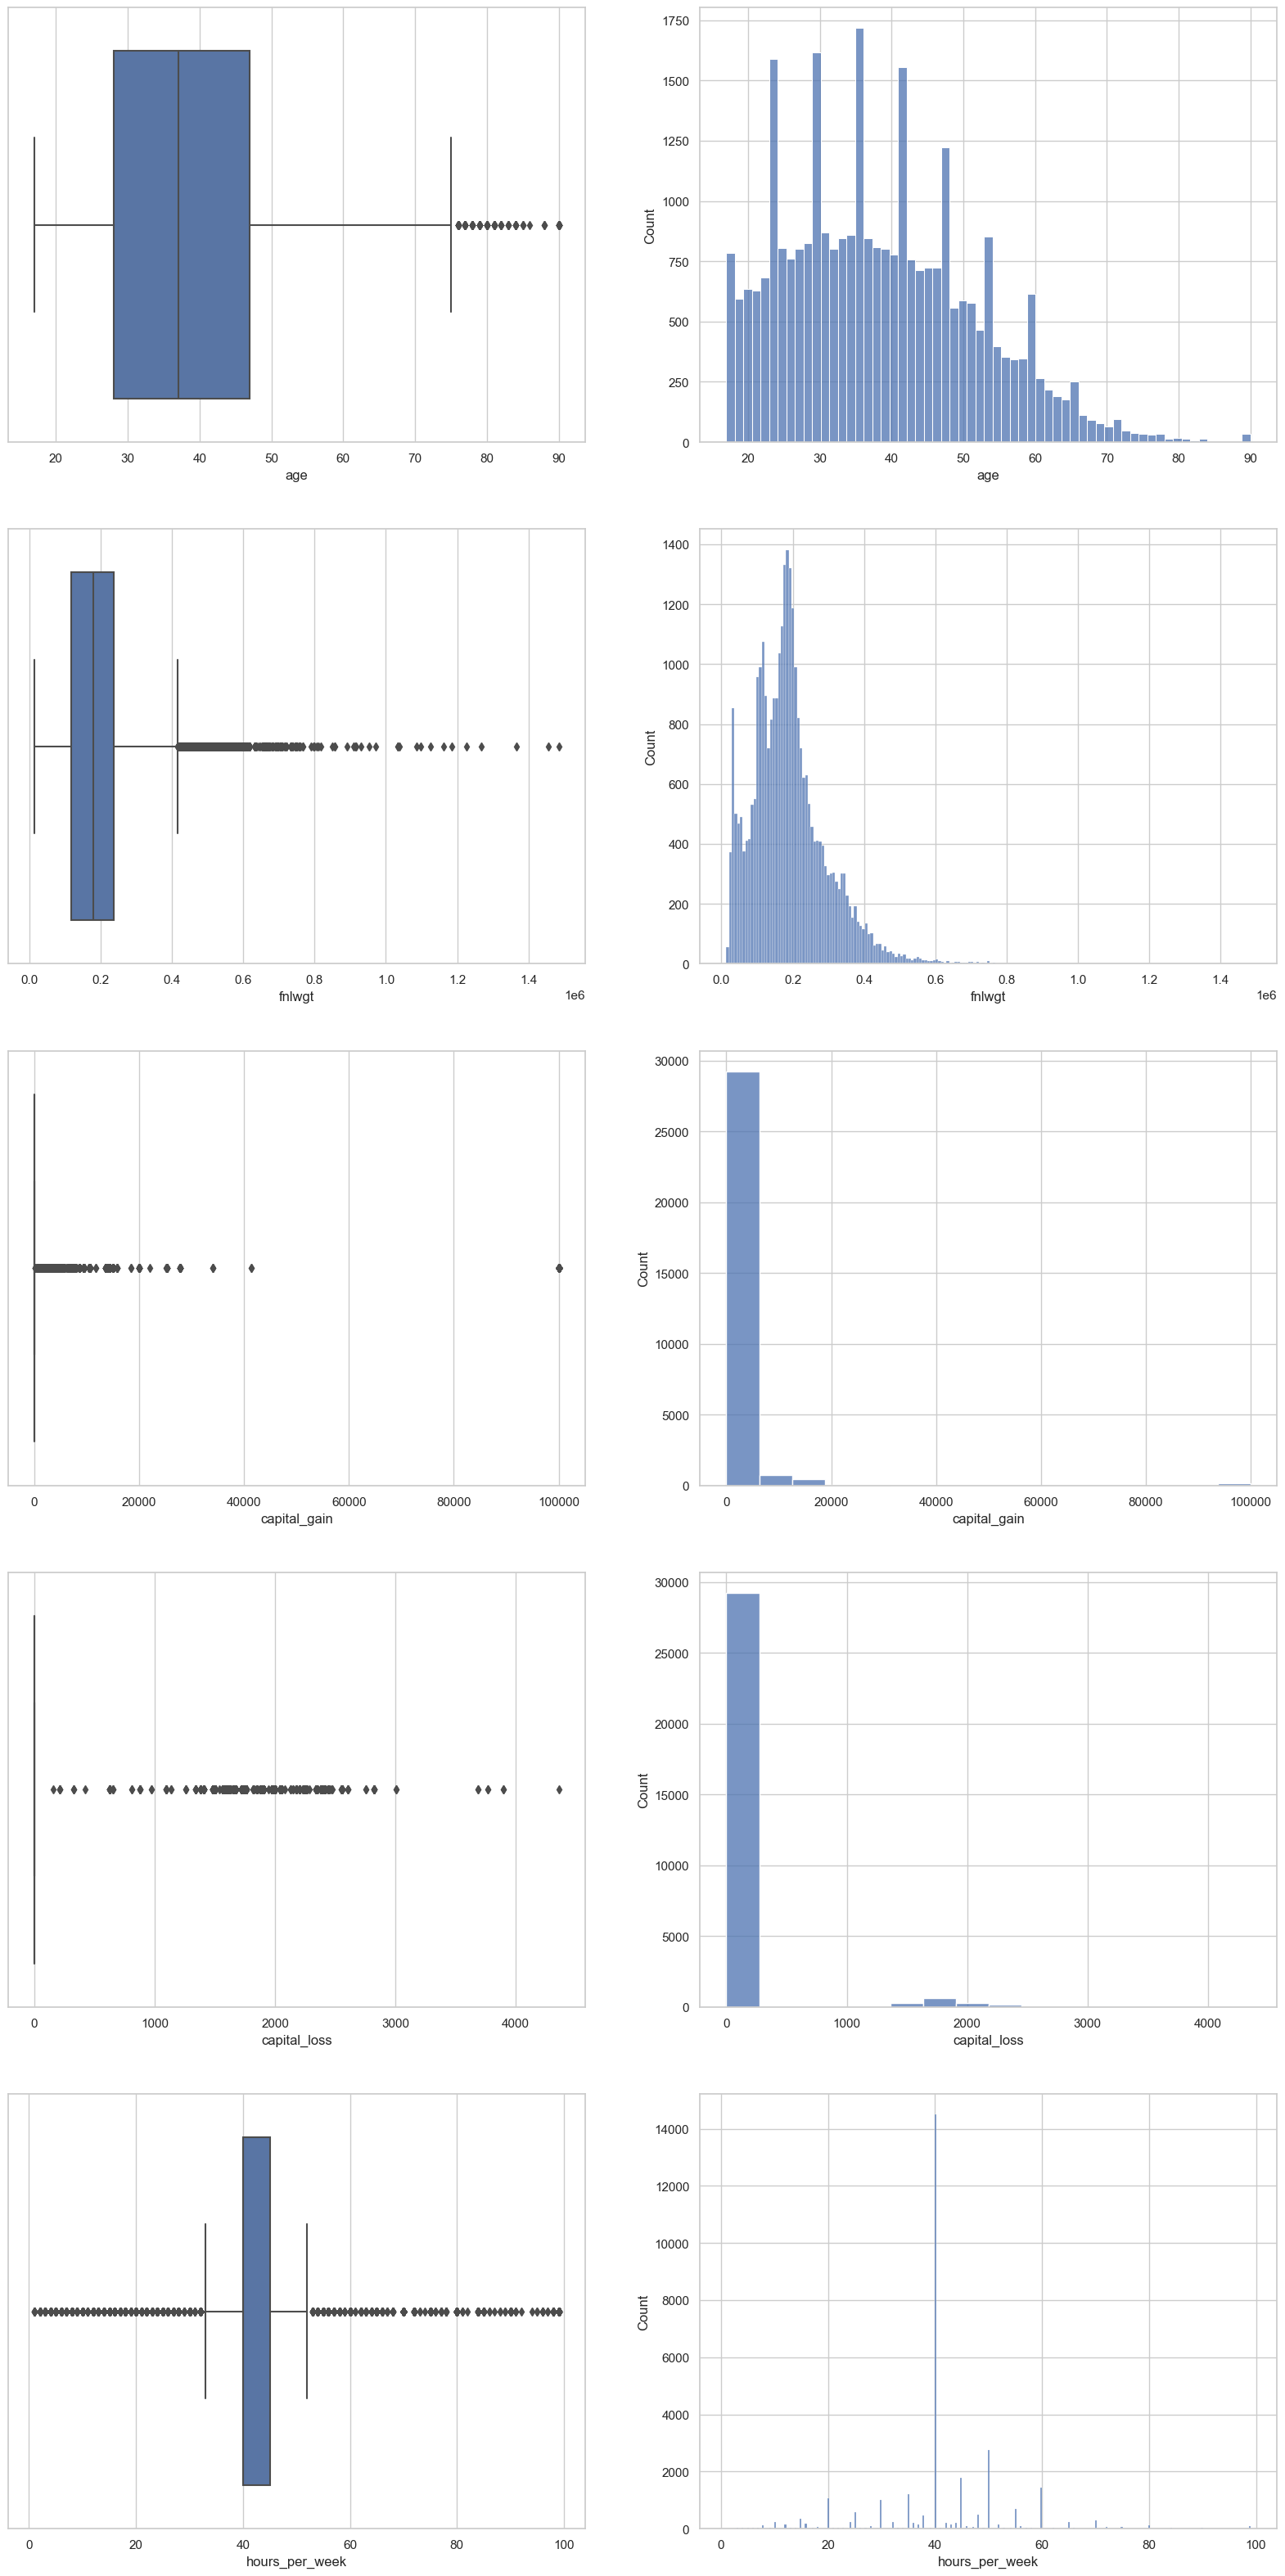

In [54]:
plt.figure(figsize=(20, 40))

sns.set(style="whitegrid", font_scale=1)

for i, j in list(zip(df.select_dtypes('number').columns, [(1, 2),(3, 4),(5, 6),(7, 8),(9, 10)])):
    plt.subplot(5, 2, j[0])
    sns.boxplot(x=df.select_dtypes('number')[i])
    plt.subplot(5, 2, j[1])
    sns.histplot(x=df.select_dtypes('number')[i])

In [55]:
# Alternative Code Block Plotting Both "boxplots" and "histograms" for Each Numeric Features at the Same Figure

# index = 0
# plt.figure(figsize=(20, 40))

# for feature in df.select_dtypes('number').columns:
#     index += 1
#     plt.subplot(6, 2, index)
#     sns.boxplot(x=feature, data=df, whis=1.5)
#     index += 1
#     plt.subplot(6,2,index)
#     sns.histplot(x=feature, data=df)
#     plt.ticklabel_format(style='plain', axis='x')

**Check the statistical values for all numeric features**

In [334]:
df.describe().T

count       mean        std       min        25%  \
age            30694.000     38.448     13.115    17.000     28.000   
fnlwgt         30694.000 189848.229 105465.126 13769.000 117828.500   
capital_gain   30694.000   1106.902   7500.730     0.000      0.000   
capital_loss   30694.000     88.980    405.808     0.000      0.000   
hours_per_week 30694.000     40.953     11.984     1.000     40.000   

                      50%        75%         max  
age                37.000     47.000      90.000  
fnlwgt         178513.500 237293.750 1484705.000  
capital_gain        0.000      0.000   99999.000  
capital_loss        0.000      0.000    4356.000  
hours_per_week     40.000     45.000      99.000

In [56]:
df[df["hours_per_week"] > 70]

age         workclass  fnlwgt       occupation                race  \
10      37           Private  280464  Exec-managerial               Black   
28      39           Private  367260  Exec-managerial               White   
265     37      Self-emp-inc  257295  Exec-managerial  Asian-Pac-Islander   
272     50  Self-emp-not-inc   30653  Farming-fishing               White   
299     38           Private  169469            Sales               White   
...    ...               ...     ...              ...                 ...   
32391   55           Private  199763  Protective-serv               White   
32402   42           Private  288154     Craft-repair               White   
32432   36           Private  208068    Other-service               Other   
32469   58      Self-emp-inc  181974   Prof-specialty               White   
32476   35           Private   30673     Craft-repair               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
10       Male             0             0              80   >50K   
28       Male             0             0              80  <=50K   
265      Male             0             0              75   >50K   
272      Male          2407             0              98  <=50K   
299      Male             0             0              80  <=50K   
...       ...           ...           ...             ...    ...   
32391    Male             0             0              81  <=50K   
32402    Male             0             0              89   >50K   
32432    Male             0             0              72  <=50K   
32469  Female             0             0              99  <=50K   
32476    Male             0             0              84  <=50K   

        education_summary marital_status_summary native_country_summary  
10     medium_level_grade                married                     US  
28     medium_level_grade              unmarried                     US  
265    medium_level_grade                married                 Others  
272      high_level_grade                married                     US  
299    medium_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
32391  medium_level_grade              unmarried                     US  
32402  medium_level_grade                married                     US  
32432     low_level_grade              unmarried                 Others  
32469    high_level_grade              unmarried                 Others  
32476     low_level_grade                married                     US  

[473 rows x 13 columns]

**1. After analyzing all features, we have decided that we can't evaluate extreme values in "fnlwgt, capital_gain, capital_loss" features in the scope of outliers.**

**2. So let's examine "age and hours_per_week" features and detect extreme values which could be outliers by using IQR Rule.**

### age

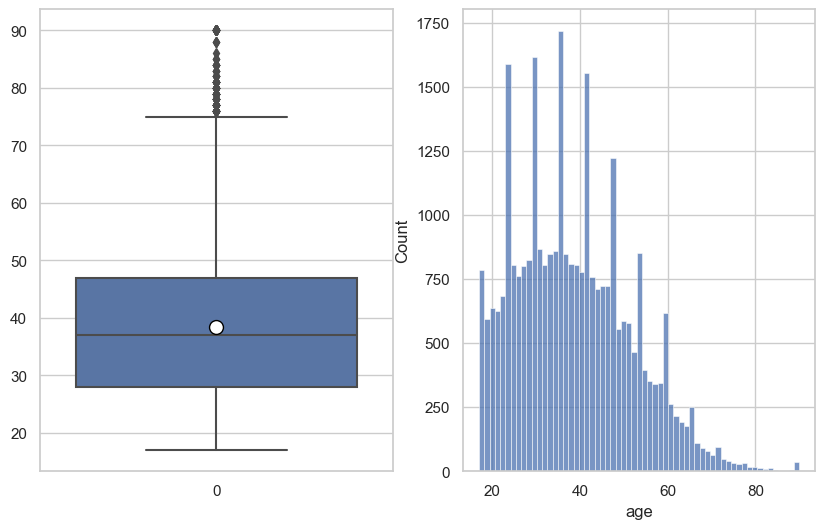

In [58]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df.age,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.subplot(1, 2, 2)
sns.histplot(data=df.age);

In [59]:
# Find IQR defining quantile 0.25 for low level and 0.75 for high level 

low = df.age.quantile(0.25)
high = df.age.quantile(0.75)
IQR = high - low
low, high, IQR

(28.0, 47.0, 19.0)

In [60]:
# Find lower and upper limit using IQR

lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(-0.5, 75.5)

In [61]:
df[df.age > upper_lim].age.value_counts()

90    35
76    30
77    20
80    16
79    15
81    14
78    14
84     8
82     7
83     5
88     3
85     3
86     1
Name: age, dtype: int64

In [62]:
# Define the observations whose age is greater than upper limit and sort these observations by age in descending order

df[df.age > upper_lim].sort_values(by="age", ascending=False)

age         workclass  fnlwgt       occupation                race  \
8806    90           Private   87372   Prof-specialty               White   
14159   90         Local-gov  187749     Adm-clerical  Asian-Pac-Islander   
28463   90       Federal-gov  195433     Craft-repair               White   
12975   90           Private  250832  Exec-managerial               White   
11996   90           Private   40388  Exec-managerial               White   
...    ...               ...     ...              ...                 ...   
15102   76         Local-gov  169133     Adm-clerical               White   
19085   76           Private  125784  Exec-managerial               White   
23515   76           Private  142535     Adm-clerical               White   
8240    76  Self-emp-not-inc  225964            Sales               White   
23354   76           Private  199949     Adm-clerical               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
8806     Male         20051             0              72   >50K   
14159    Male             0             0              20  <=50K   
28463    Male             0             0              30  <=50K   
12975    Male             0             0              40  <=50K   
11996    Male             0             0              55  <=50K   
...       ...           ...           ...             ...    ...   
15102  Female             0             0              30  <=50K   
19085    Male             0             0              40  <=50K   
23515    Male             0             0               6  <=50K   
8240     Male             0             0               8  <=50K   
23354    Male         20051             0              50   >50K   

        education_summary marital_status_summary native_country_summary  
8806     high_level_grade                married                     US  
14159  medium_level_grade                married                 Others  
28463  medium_level_grade                married                     US  
12975     low_level_grade                married                     US  
11996    high_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
15102  medium_level_grade              unmarried                     US  
19085    high_level_grade                married                     US  
23515  medium_level_grade              unmarried                     US  
8240   medium_level_grade              unmarried                     US  
23354    high_level_grade                married                     US  

[171 rows x 13 columns]

### hours_per_week

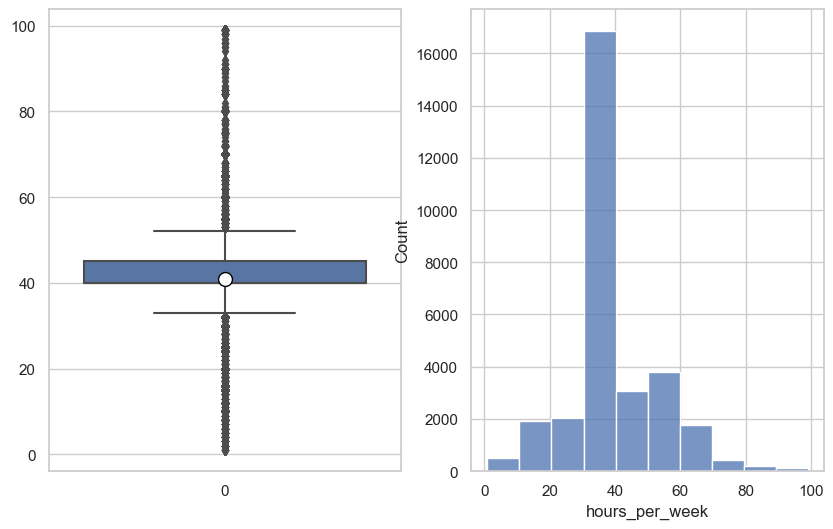

In [63]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df.hours_per_week,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.subplot(1, 2, 2)
sns.histplot(data=df.hours_per_week, bins=10);

In [64]:
# Find IQR defining quantile 0.25 for low level and 0.75 for high level 

low = df.hours_per_week.quantile(0.25)
high = df.hours_per_week.quantile(0.75)
IQR = high - low
low, high, IQR

(40.0, 45.0, 5.0)

In [65]:
# Find the lower and upper limit using IQR
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(32.5, 52.5)

In [66]:
df[df.hours_per_week > upper_lim].hours_per_week.value_counts().sort_index(ascending=False)

99      80
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      28
89       2
88       2
87       1
86       2
85      13
84      41
82       1
81       3
80     124
78       8
77       6
76       3
75      63
74       1
73       2
72      68
70     284
68      12
67       4
66      17
65     242
64      14
63      10
62      18
61       2
60    1441
59       5
58      27
57      17
56      91
55     683
54      39
53      23
Name: hours_per_week, dtype: int64

In [68]:
# Define the observations where  hours per week are greater than upper limit and 
# sort these observations by hours per week in descending order

df[df.hours_per_week > upper_lim].sort_values(by="hours_per_week", ascending=False)

age         workclass  fnlwgt        occupation   race  gender  \
25986   44         Local-gov  212665   Protective-serv  Black    Male   
19529   38           Private   66326  Transport-moving  White    Male   
8796    39           Private   70995  Transport-moving  White    Male   
15534   29           Private  167716     Other-service  White  Female   
22313   26  Self-emp-not-inc  258306   Farming-fishing  White    Male   
...    ...               ...     ...               ...    ...     ...   
1138    27           Private  138705      Craft-repair  White    Male   
23244   58           Private  248739   Farming-fishing  White    Male   
28858   62           Private  123411  Transport-moving  White    Male   
18417   24           Private  117167     Other-service  White  Female   
31622   61  Self-emp-not-inc  268831             Sales  White    Male   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
25986             0             0              99  <=50K  medium_level_grade   
19529             0             0              99  <=50K  medium_level_grade   
8796          15024             0              99   >50K    high_level_grade   
15534             0             0              99  <=50K  medium_level_grade   
22313             0             0              99  <=50K     low_level_grade   
...             ...           ...             ...    ...                 ...   
1138              0             0              53  <=50K  medium_level_grade   
23244             0             0              53   >50K  medium_level_grade   
28858             0             0              53  <=50K     low_level_grade   
18417             0             0              53  <=50K  medium_level_grade   
31622             0             0              53  <=50K  medium_level_grade   

      marital_status_summary native_country_summary  
25986                married                     US  
19529                married                     US  
8796                 married                     US  
15534              unmarried                     US  
22313                married                     US  
...                      ...                    ...  
1138                 married                     US  
23244                married                     US  
28858                married                     US  
18417              unmarried                     US  
31622                married                     US  

[3402 rows x 13 columns]

In [69]:
df[df.hours_per_week < lower_lim].hours_per_week.value_counts().sort_index()

1        8
2       15
3       24
4       28
5       39
6       40
7       20
8      103
9       17
10     223
11       9
12     143
13      19
14      28
15     350
16     182
17      27
18      64
19      14
20    1063
21      23
22      39
23      20
24     220
25     582
26      30
27      28
28      74
29       6
30    1008
31       5
32     239
Name: hours_per_week, dtype: int64

In [70]:
df[df.hours_per_week < lower_lim].groupby("salary").hours_per_week.describe()

count   mean   std   min    25%    50%    75%    max
salary                                                        
<=50K  4368.000 21.548 7.345 1.000 16.000 20.000 30.000 32.000
>50K    322.000 22.028 7.813 1.000 18.000 24.000 30.000 32.000

In [71]:
df[df.hours_per_week < lower_lim].groupby("salary").age.describe()

count   mean    std    min    25%    50%    75%    max
salary                                                          
<=50K  4368.000 34.059 17.735 17.000 20.000 26.000 45.000 90.000
>50K    322.000 49.484 13.894 22.000 39.000 48.000 60.000 90.000

**Result :** As we see, there are number of extreme values in both "age and hours_per_week" features. But how can we know if these extreme values are outliers or not? At this point, **domain knowledge** comes to the fore.

**Domain Knowledge for this dataset:**
1. In this dataset, all values are created according to the statements of individuals. So It can be some "data entries errors".
2. In addition, we have aimed to create an ML model with some restrictions as getting better performance from the ML model.
3. In this respect, our sample space ranges for some features are as follows.
    - **age : 17 to 80**
    - **hours_per_week : 7 to 70**
    - **if somebody's age is more than 60, he/she can't work more than 60 hours in a week**

### Dropping rows according to the domain knownledge 

In [72]:
# Create a condition according to your domain knowledge on age stated above and 
# sort the observations meeting this condition by age in ascending order

df[(df.age < 17) | (df.age > 80)].sort_values(by = "age", ascending = False)

age     workclass  fnlwgt       occupation   race  gender  \
222     90       Private   51744    Other-service  Black    Male   
18832   90       Private  115306  Exec-managerial  White  Female   
10545   90       Private  175491     Craft-repair  White    Male   
11512   90       Private   87285    Other-service  White  Female   
11996   90       Private   40388  Exec-managerial  White    Male   
...    ...           ...     ...              ...    ...     ...   
19045   81     State-gov  132204    Other-service  White  Female   
6748    81       Private  122651            Sales  White    Male   
2906    81       Private  114670  Priv-house-serv  Black  Female   
21501   81       Private  177408  Exec-managerial  White    Male   
19495   81  Self-emp-inc  247232  Exec-managerial  White  Female   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
222               0          2206              40  <=50K  medium_level_grade   
18832             0             0              40  <=50K    high_level_grade   
10545          9386             0              50   >50K  medium_level_grade   
11512             0             0              24  <=50K  medium_level_grade   
11996             0             0              55  <=50K    high_level_grade   
...             ...           ...             ...    ...                 ...   
19045             0             0              20  <=50K     low_level_grade   
6748              0             0              15  <=50K  medium_level_grade   
2906           2062             0               5  <=50K     low_level_grade   
21501             0          2377              26   >50K  medium_level_grade   
19495          2936             0              28  <=50K     low_level_grade   

      marital_status_summary native_country_summary  
222                unmarried                     US  
18832              unmarried                     US  
10545                married                 Others  
11512              unmarried                     US  
11996              unmarried                     US  
...                      ...                    ...  
19045              unmarried                     US  
6748                 married                     US  
2906               unmarried                     US  
21501                married                     US  
19495                married                     US  

[76 rows x 13 columns]

In [73]:
# Find the shape of the dataframe created by the condition defined above for age 

df[(df.age < 17) | (df.age > 80)].shape

(76, 13)

In [74]:
# Assign the indices of the rows defined in accordance with condition above for age

drop_index = df[(df.age < 17) | (df.age > 80)].sort_values(by="age", ascending=False).index
drop_index

Int64Index([  222, 18832, 10545, 11512, 11996, 12975, 14159, 15892, 18277,
            18413, 18725, 19212,  8973, 19489, 19747, 20610, 22220, 24043,
            28463, 31030, 32277, 32367, 10210, 15356,  5370,  4070,  1040,
             6232,  1935,  2303,  5272,  6624,  2891,  5406,  8806,  1168,
            22895, 21835, 24027, 20463,  8381, 32459, 26731, 27795,  9471,
             6214, 14711, 11238,  7720, 15662,  7481, 24395, 23459, 19172,
            16302, 14756,  8431, 20421, 22481, 31855, 13696, 24280,  4834,
            29594, 28948, 12830,   918, 13295, 24560,  3537, 13928, 19045,
             6748,  2906, 21501, 19495],
           dtype='int64')

In [75]:
# Drop these indices defined above for age

df.drop(drop_index, inplace=True)

In [76]:
# Create a condition according to your domain knowledge on hours per week stated above and 
# sort the observations meeting this condition by hours per week in descending order

df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].sort_values(by="hours_per_week", ascending=False)

age         workclass  fnlwgt        occupation                race  \
22216   45           Private   54260      Craft-repair               White   
5432    44           Private   83508    Prof-specialty               White   
19053   27           Private   40295  Transport-moving               White   
19141   59           Private  106748     Other-service               White   
19399   39      Self-emp-inc  163057      Craft-repair               White   
...    ...               ...     ...               ...                 ...   
20909   77  Self-emp-not-inc   71676      Adm-clerical               White   
25078   74           Private  260669     Other-service               White   
19750   23           Private   72887      Craft-repair  Asian-Pac-Islander   
189     58         State-gov  109567    Prof-specialty               White   
24284   57  Self-emp-not-inc   56480   Exec-managerial               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
22216    Male             0             0              99  <=50K   
5432   Female          2354             0              99  <=50K   
19053    Male             0             0              99  <=50K   
19141  Female             0             0              99  <=50K   
19399    Male             0             0              99  <=50K   
...       ...           ...           ...             ...    ...   
20909  Female             0          1944               1  <=50K   
25078  Female             0             0               1  <=50K   
19750    Male             0             0               1  <=50K   
189      Male             0             0               1   >50K   
24284    Male             0             0               1  <=50K   

        education_summary marital_status_summary native_country_summary  
22216  medium_level_grade              unmarried                     US  
5432     high_level_grade              unmarried                     US  
19053  medium_level_grade              unmarried                     US  
19141     low_level_grade                married                     US  
19399  medium_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
20909  medium_level_grade              unmarried                     US  
25078     low_level_grade              unmarried                     US  
19750  medium_level_grade              unmarried                 Others  
189      high_level_grade                married                     US  
24284  medium_level_grade                married                     US  

[621 rows x 13 columns]

In [77]:
# Find the shape of the dataframe created by the condition defined above for hours per week 

df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].shape

(621, 13)

In [78]:
# Assign the indices of the rows defined in accordance with condition above for hours per week
drop_index = df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].sort_values(by="hours_per_week", ascending=False).index
drop_index

Int64Index([22216,  5432, 19053, 19141, 19399, 19529, 19731, 19997, 20036,
            21056,
            ...
             6180, 29867,  1036, 11451, 22960, 20909, 25078, 19750,   189,
            24284],
           dtype='int64', length=621)

In [79]:
# Drop these indices defined above for hours per week

df.drop(drop_index, inplace = True)

In [80]:
# Create a condition according to your domain knowledge on both age and hours per week stated above 
df[(df.age > 60) & (df.hours_per_week > 60)]

age         workclass  fnlwgt        occupation                race  \
1541    62           Private  162245    Prof-specialty               White   
2154    75           Private  101887   Priv-house-serv               White   
2184    63      Self-emp-inc   54052             Sales               White   
2665    70           Private   94692             Sales               White   
3101    65      Self-emp-inc   81413   Farming-fishing               White   
5417    67           Private  197816             Sales               White   
6826    68           Private  284763  Transport-moving               White   
8066    61  Self-emp-not-inc  133969             Sales  Asian-Pac-Islander   
9646    62  Self-emp-not-inc   26911     Other-service               White   
12624   63      Self-emp-inc  110890    Prof-specialty               White   
16634   62  Self-emp-not-inc  115176   Farming-fishing               White   
18367   70  Self-emp-not-inc  139889   Farming-fishing               White   
19584   64  Self-emp-not-inc  192695   Farming-fishing               White   
20125   62           Private  252668    Prof-specialty               White   
23399   63  Self-emp-not-inc   28612             Sales               White   
23585   64           Private  212838             Sales               White   
24903   61           Private  191417   Exec-managerial               Black   
25910   66      Self-emp-inc  179951   Exec-managerial               White   
26625   67  Self-emp-not-inc  152102   Farming-fishing               White   
27721   61         Local-gov   28375    Prof-specialty               White   
28294   65      Self-emp-inc  210381   Exec-managerial               White   
31342   62  Self-emp-not-inc  173631   Exec-managerial               White   
32192   64         State-gov  104361      Adm-clerical               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
1541     Male             0          1628              70  <=50K   
2154   Female             0             0              70  <=50K   
2184     Male             0             0              68   >50K   
2665     Male             0             0              70   >50K   
3101     Male             0          2352              65  <=50K   
5417     Male             0          1844              70  <=50K   
6826     Male             0             0              70  <=50K   
8066     Male             0             0              63  <=50K   
9646   Female             0             0              66  <=50K   
12624    Male             0             0              70   >50K   
16634    Male             0             0              65  <=50K   
18367    Male          2653             0              70  <=50K   
19584    Male             0             0              70  <=50K   
20125    Male             0             0              70  <=50K   
23399    Male             0             0              70  <=50K   
23585    Male             0             0              65   >50K   
24903    Male             0             0              65  <=50K   
25910    Male             0             0              70  <=50K   
26625    Male             0             0              65  <=50K   
27721  Female             0             0              70  <=50K   
28294    Male         99999             0              65   >50K   
31342    Male             0             0              70  <=50K   
32192  Female             0             0              65  <=50K   

        education_summary marital_status_summary native_country_summary  
1541     high_level_grade                married                     US  
2154      low_level_grade              unmarried                     US  
2184     high_level_grade                married                     US  
2665     high_level_grade                married                     US  
3101   medium_level_grade                married                     US  
5417   medium_level_grade                married         

In [81]:
# Find the shape of the dataframe created by the condition defined above for both age and hours per week
df[(df.age > 60) & (df.hours_per_week > 60)].shape

(23, 13)

In [82]:
# Assign the indices of the rows defined in accordance with condition above for both age and hours per week
drop_index = df[(df.age > 60) & (df.hours_per_week > 60)].index
drop_index

Int64Index([ 1541,  2154,  2184,  2665,  3101,  5417,  6826,  8066,  9646,
            12624, 16634, 18367, 19584, 20125, 23399, 23585, 24903, 25910,
            26625, 27721, 28294, 31342, 32192],
           dtype='int64')

In [83]:
# Drop these indices defined above for both age and hours per week
df.drop(drop_index, inplace=True)

In [84]:
# What is new shape of dataframe now
df.shape

(29954, 13)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29954 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     29954 non-null  int64 
 1   workclass               29954 non-null  object
 2   fnlwgt                  29954 non-null  int64 
 3   occupation              29954 non-null  object
 4   race                    29954 non-null  object
 5   gender                  29954 non-null  object
 6   capital_gain            29954 non-null  int64 
 7   capital_loss            29954 non-null  int64 
 8   hours_per_week          29954 non-null  int64 
 9   salary                  29954 non-null  object
 10  education_summary       29954 non-null  object
 11  marital_status_summary  29954 non-null  object
 12  native_country_summary  29954 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [86]:
# Reset the indices and take the head of DataFrame now
df.reset_index(drop=True, inplace=True)
df.head()

age         workclass  fnlwgt         occupation   race  gender  \
0   39         State-gov   77516       Adm-clerical  White    Male   
1   50  Self-emp-not-inc   83311    Exec-managerial  White    Male   
2   38           Private  215646  Handlers-cleaners  White    Male   
3   53           Private  234721  Handlers-cleaners  Black    Male   
4   28           Private  338409     Prof-specialty  Black  Female   

   capital_gain  capital_loss  hours_per_week salary   education_summary  \
0          2174             0              40  <=50K    high_level_grade   
1             0             0              13  <=50K    high_level_grade   
2             0             0              40  <=50K  medium_level_grade   
3             0             0              40  <=50K     low_level_grade   
4             0             0              40  <=50K    high_level_grade   

  marital_status_summary native_country_summary  
0              unmarried                     US  
1                married                     US  
2              unmarried                     US  
3                married                     US  
4                married                 Others

**Having dropped some of the extreme values using "Tukey's Fence", let us check the whisker plot again:**

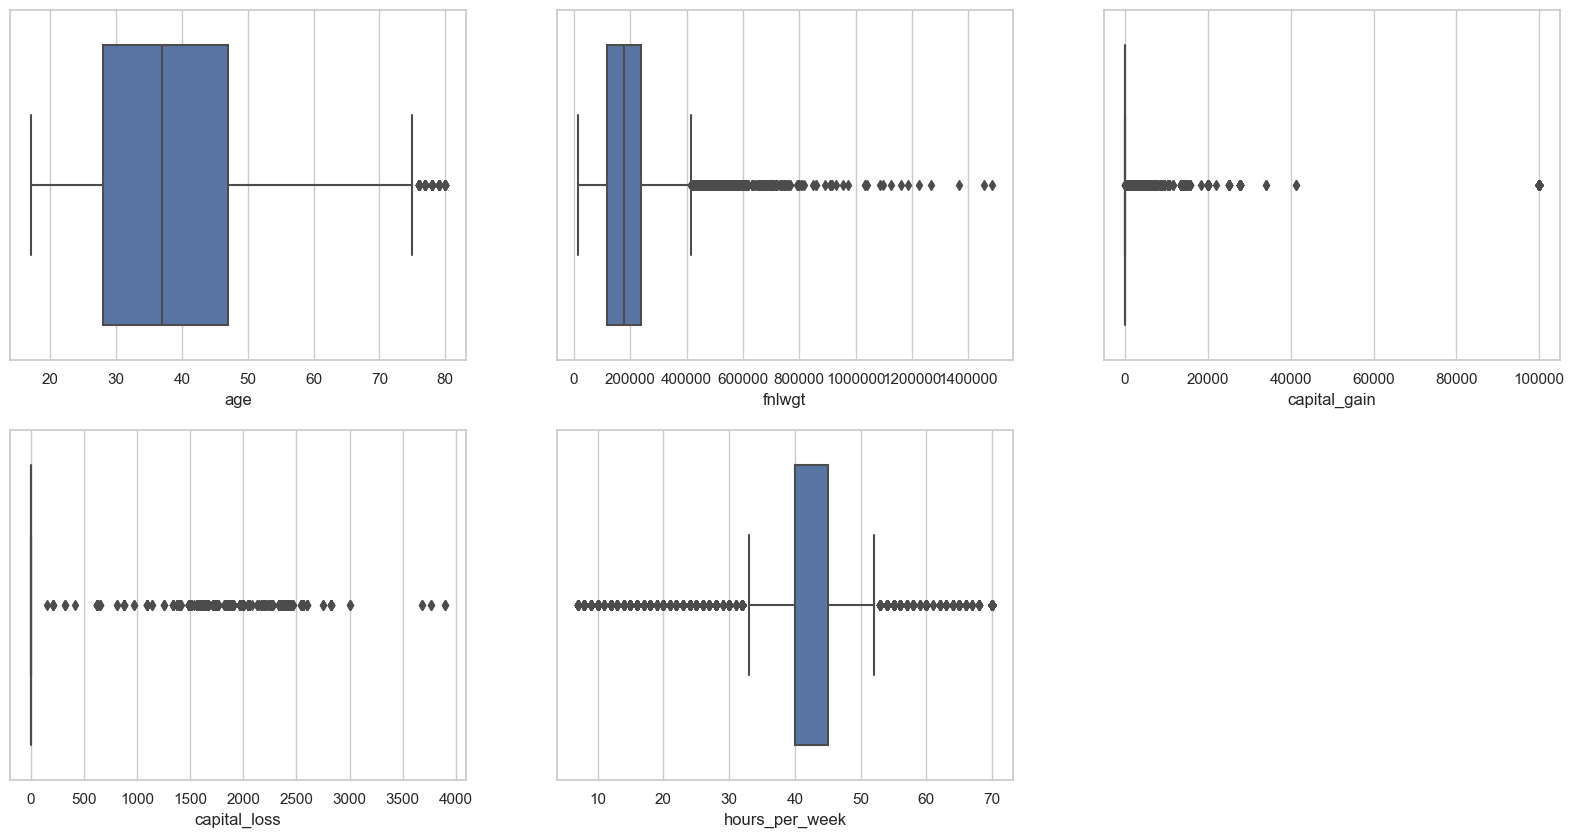

In [87]:
index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2, 3, index)
    sns.boxplot(x=feature, data=df)
    plt.ticklabel_format(style='plain', axis='x')

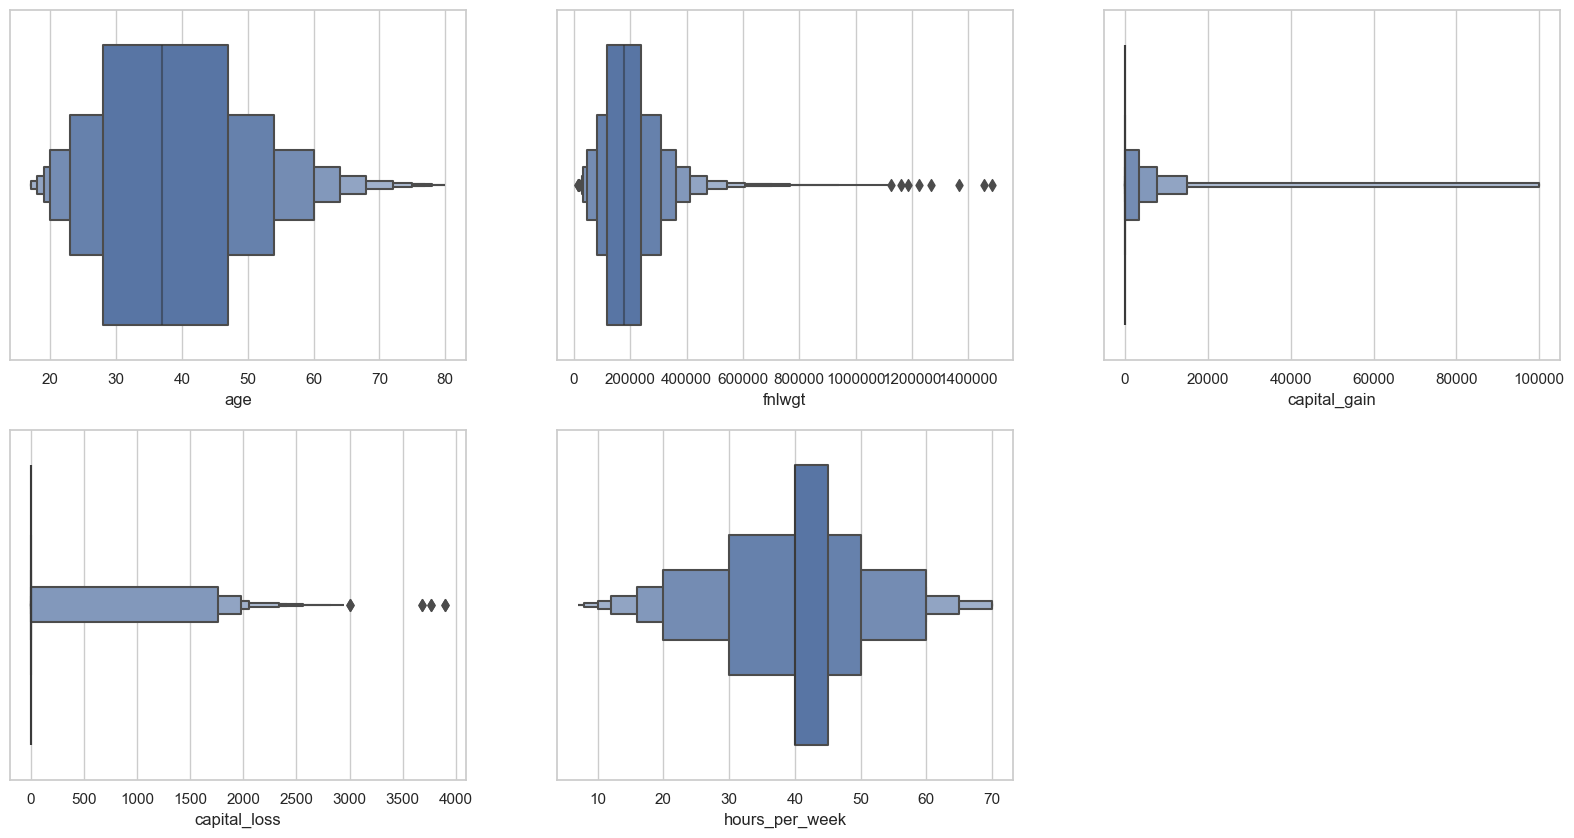

In [88]:
index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2, 3, index)
    sns.boxenplot(x=feature, data=df)
    plt.ticklabel_format(style='plain', axis='x')

In [89]:
df.describe()

age      fnlwgt  capital_gain  capital_loss  hours_per_week
count 29954.000   29954.000     29954.000     29954.000       29954.000
mean     38.252  190174.993      1093.042        88.420          40.472
std      12.853  105529.144      7424.905       403.588          10.446
min      17.000   13769.000         0.000         0.000           7.000
25%      28.000  117987.500         0.000         0.000          40.000
50%      37.000  178818.000         0.000         0.000          40.000
75%      47.000  237447.000         0.000         0.000          45.000
max      80.000 1484705.000     99999.000      3900.000          70.000

We can see that the Boxenplot gives us much more information about the tails of our dataset’s distribution. In the boxplot above, we can’t tell what the data looks like beyond some points of numerical features:

For example, are people older than around 75 year-old extreme values/outliers?

According to boxplot and within the whiskers, it’s quite hard to grasp what’s going on as well. There’s a pretty big gap between the 75th percentile at the age of 47 and the maximum value at the age of 50.

For example, are people working more than around 52 hours per week extreme values/outliers?

According to boxplot and within the whiskers, it seems that they are extreme values and someof them are candidates for being outliers. However, it’s quite hard to grasp and decide what they are exactly. There’s a pretty big gap between the 75th percentile and the maximum value and similary between the 25th percentile and the minimum value.

With respect to working hours, the boxenplot, on the other hand, provides more insights in how the data is distributed beyond the quantiles. Contrary to the output of box plot, it can be assumed that there have been no extreme values. Moreover, we can see that the next box ends shortly after the 50 mark and hence is relatively short as compared to the following one. At the same time, the following box beginning approximately at the 50 and ending 60 marks is quite stretched, indicating that there’s a higher variance.

To wrap up, interpreting boxenplots can be more straightforward. The concept of thicker boxes representing a bigger part of the total population is easier to comprehend and facilitates discussions.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Final Step to Make the Dataset Ready for ML Models</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### 1. Convert all features to numeric

In [90]:
df["salary"] = df.salary.map({"<=50K" : 0, ">50K" : 1})
df["salary"]

0        0
1        0
2        0
3        0
4        0
        ..
29949    0
29950    1
29951    0
29952    0
29953    1
Name: salary, Length: 29954, dtype: int64

In [91]:
df.salary.value_counts()

0    22505
1     7449
Name: salary, dtype: int64

**Convert all features to numeric by using get_dummies function**

In [92]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy

age  fnlwgt  capital_gain  capital_loss  hours_per_week  salary  \
0       39   77516          2174             0              40       0   
1       50   83311             0             0              13       0   
2       38  215646             0             0              40       0   
3       53  234721             0             0              40       0   
4       28  338409             0             0              40       0   
...    ...     ...           ...           ...             ...     ...   
29949   27  257302             0             0              38       0   
29950   40  154374             0             0              40       1   
29951   58  151910             0             0              40       0   
29952   22  201490             0             0              20       0   
29953   52  287927         15024             0              40       1   

       workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                        0                  0                       0   
1                        0                  0                       0   
2                        0                  1                       0   
3                        0                  1                       0   
4                        0                  1                       0   
...                    ...                ...                     ...   
29949                    0                  1                       0   
29950                    0                  1                       0   
29951                    0                  1                       0   
29952                    0                  1                       0   
29953                    0                  0                       1   

       workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  \
0                               0                    1                      0   
1                               1                    0                      0   
2                               0                    0                      0   
3                               0                    0                      0   
4                               0                    0                      0   
...                           ...                  ...                    ...   
29949                           0                    0                      0   
29950                           0                    0                      0   
29951                           0                    0                      0   
29952                           0                    0                      0   
29953                           0                    0                      0   

       occupation_Armed-Forces  occupation_Craft-repair  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
29949                        0                        0   
29950                        0                        0   
29951                        0                        0   
29952                        0                        0   
29953                        0                        0   

       occupation_Exec-managerial  occupation_Farming-fishing  \
0                               0                           0   
1                               1                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
29949                           0                           0   
29950                           0      

In [93]:
# What's the shape of dataframe
df.shape

(29954, 13)

In [94]:
# What's the shape of dataframe created by dummy operation
df_dummy.shape

(29954, 34)

### 2. Take a look at correlation between features by utilizing power of visualizing

In [95]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
   
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val < 0.3 and val > -0.3:
        color = 'pink'        
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
        
df_dummy.corr().style.applymap(color_correlation).set_precision(2)

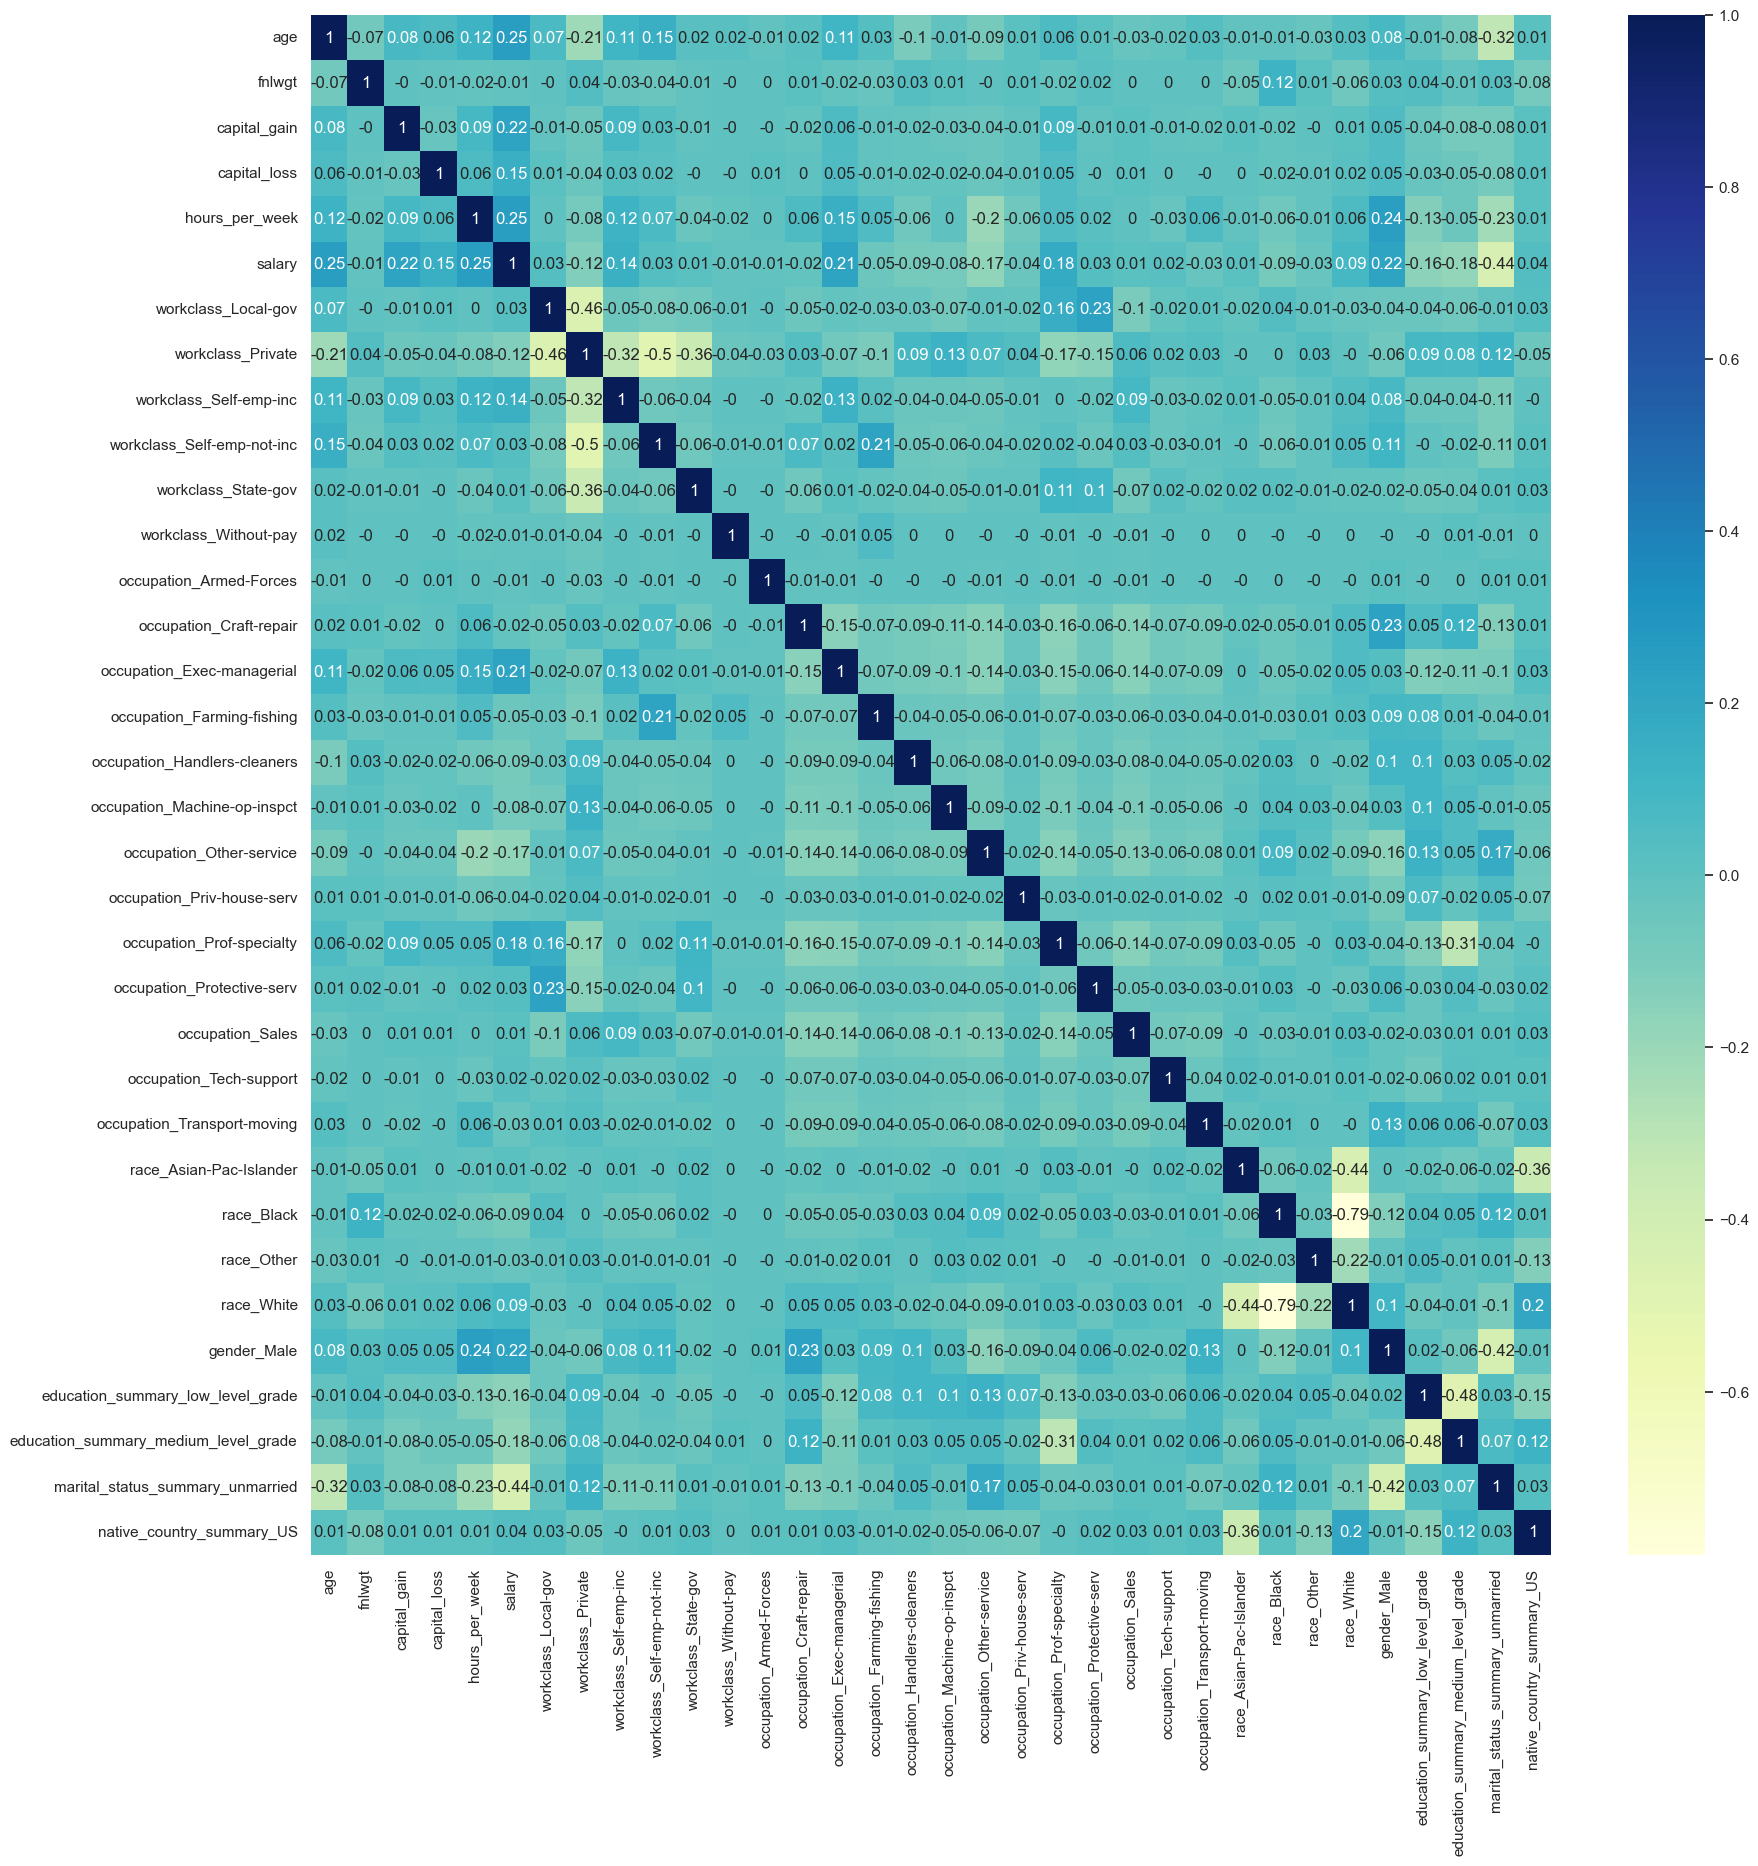

In [96]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dummy.corr().round(2), annot=True, cmap="YlGnBu");

In [97]:
# 'salary' column whose location will be changed to the last position
target_column = df_dummy.pop('salary')
  
# insert column using insert(position,column_name, target_column) method
df_dummy.insert(33, 'salary', target_column)

In [98]:
df_dummy.columns

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'gender_Male', 'education_summary_low_level_grade',
       'education_summary_medium_level_grade',
       'marital_status_summary_unmarried', 'native_country_summary_US',
       'salary'],
      dtype='object')

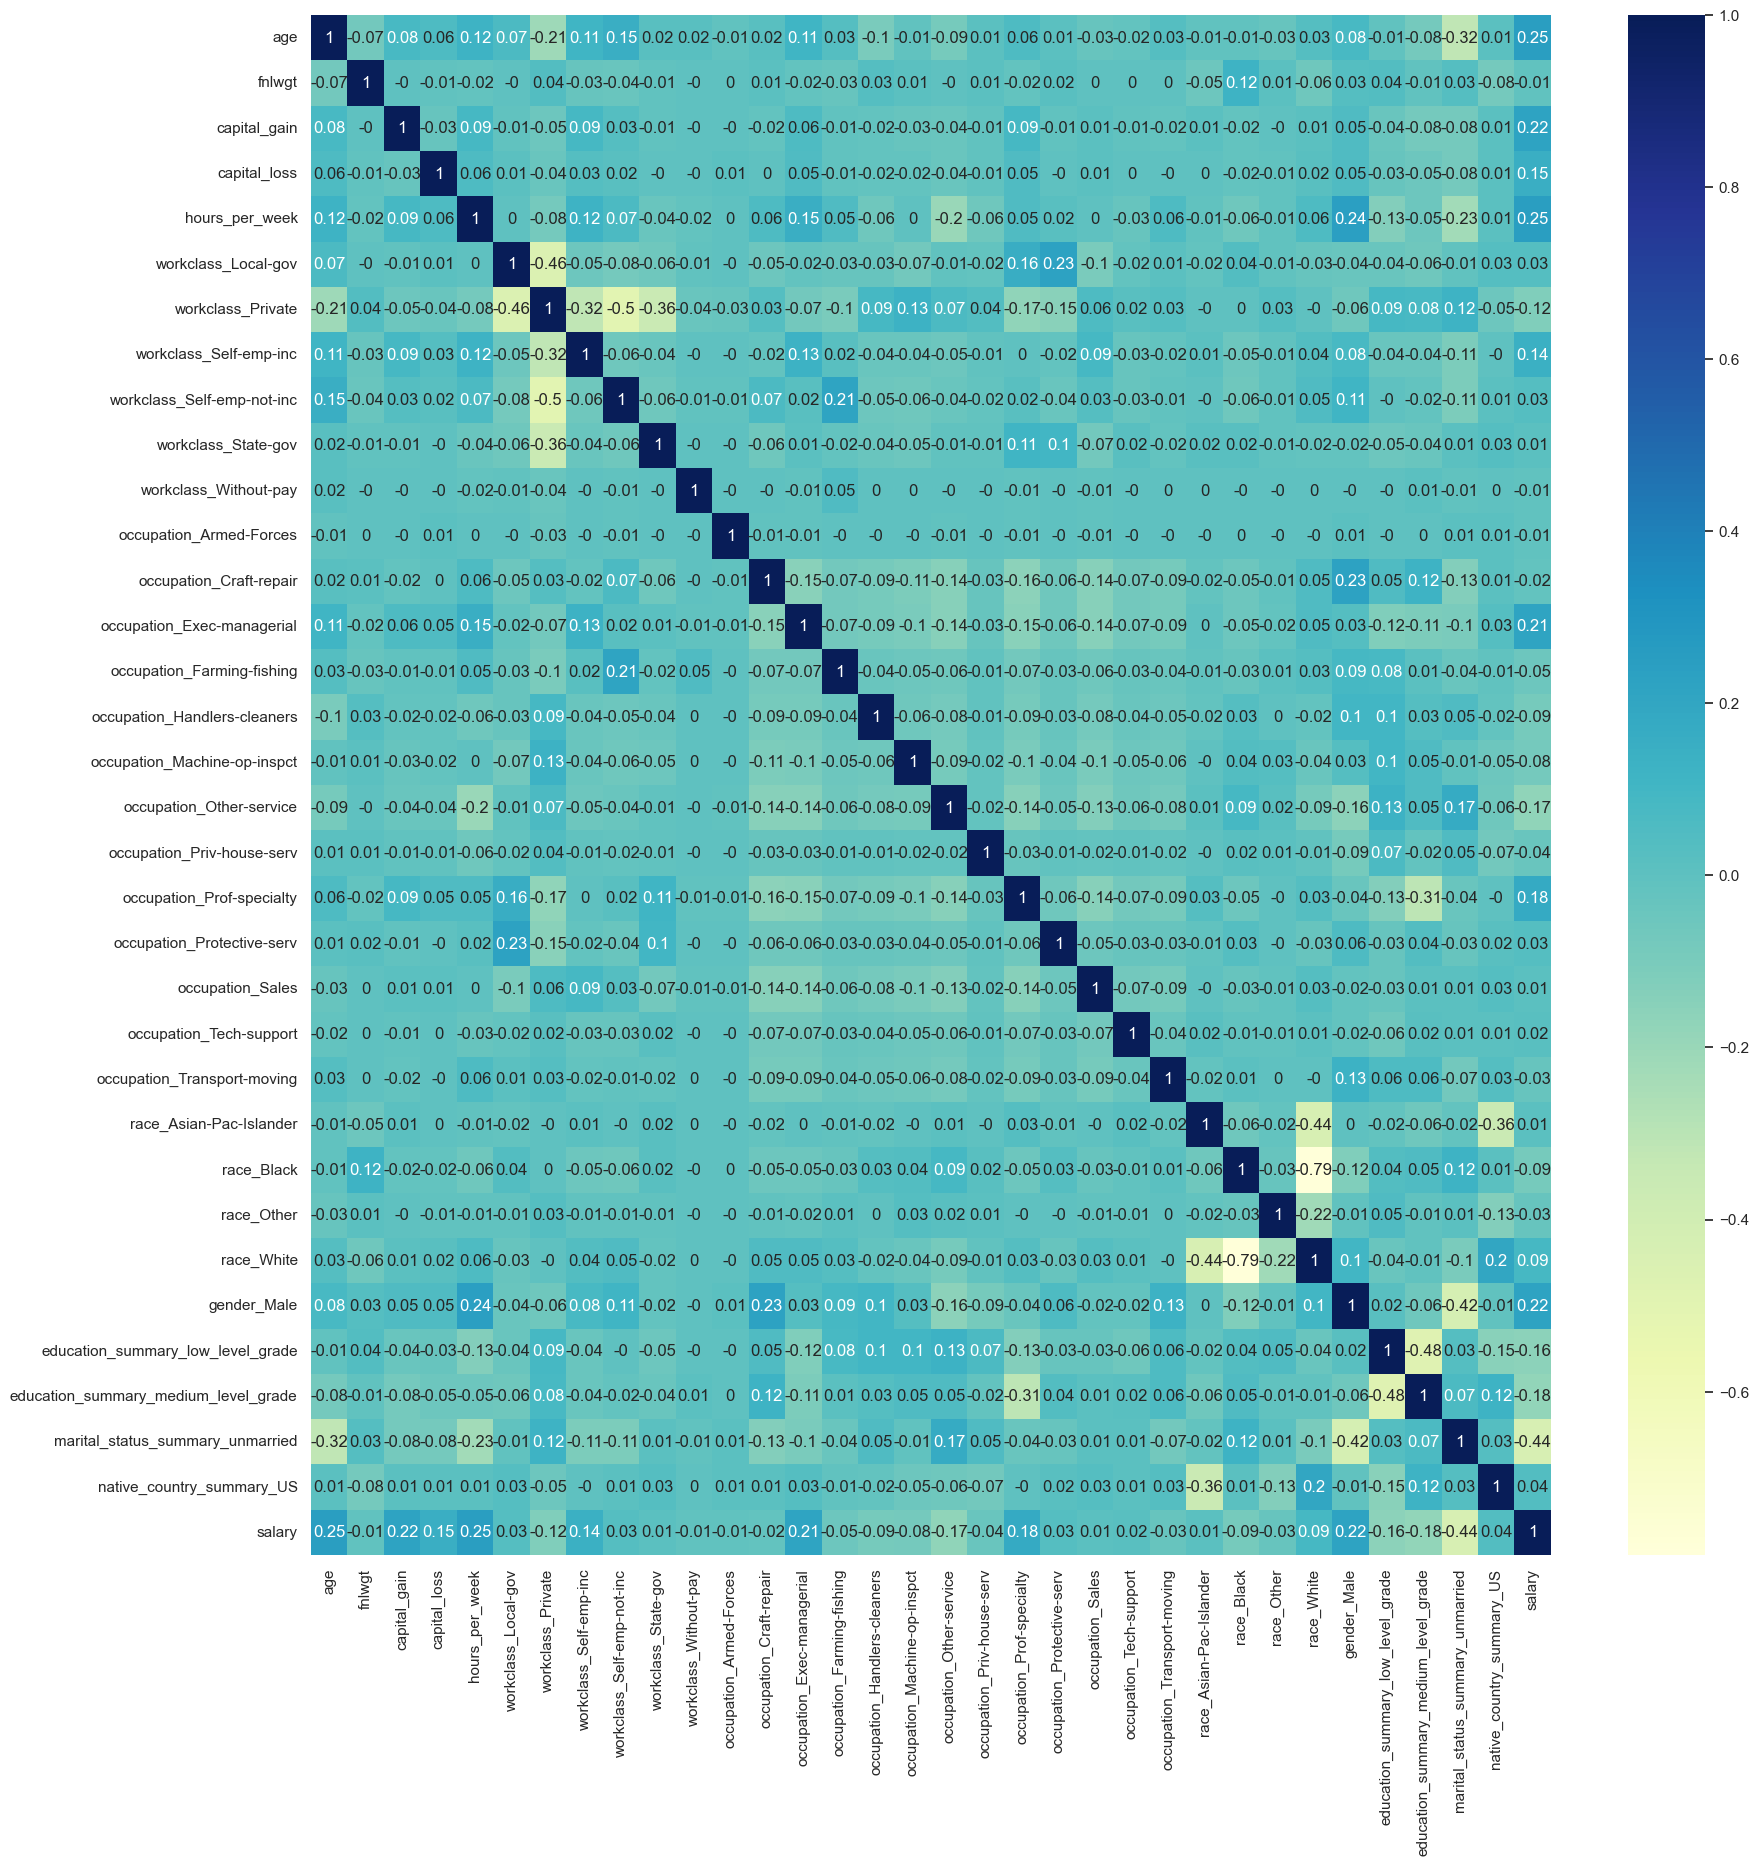

In [99]:
plt.figure(figsize=(20, 20))

sns.heatmap(df_dummy.corr().round(2), annot=True, cmap="YlGnBu");

In [100]:
df_dummy_corr_salary = df_dummy.corr()[["salary"]].drop("salary").sort_values(by="salary", ascending=False)
df_dummy_corr_salary

salary
age                                    0.253
hours_per_week                         0.247
capital_gain                           0.222
gender_Male                            0.216
occupation_Exec-managerial             0.215
occupation_Prof-specialty              0.185
capital_loss                           0.152
workclass_Self-emp-inc                 0.138
race_White                             0.086
native_country_summary_US              0.035
workclass_Self-emp-not-inc             0.030
workclass_Local-gov                    0.029
occupation_Protective-serv             0.026
occupation_Tech-support                0.023
occupation_Sales                       0.015
race_Asian-Pac-Islander                0.012
workclass_State-gov                    0.011
occupation_Armed-Forces               -0.006
fnlwgt                                -0.010
workclass_Without-pay                 -0.012
occupation_Craft-repair               -0.021
occupation_Transport-moving           -0.029
race_Other                            -0.032
occupation_Priv-house-serv            -0.038
occupation_Farming-fishing            -0.054
occupation_Machine-op-inspct          -0.077
race_Black                            -0.091
occupation_Handlers-cleaners          -0.094
workclass_Private                     -0.121
education_summary_low_level_grade     -0.163
occupation_Other-service              -0.166
education_summary_medium_level_grade  -0.183
marital_status_summary_unmarried      -0.437

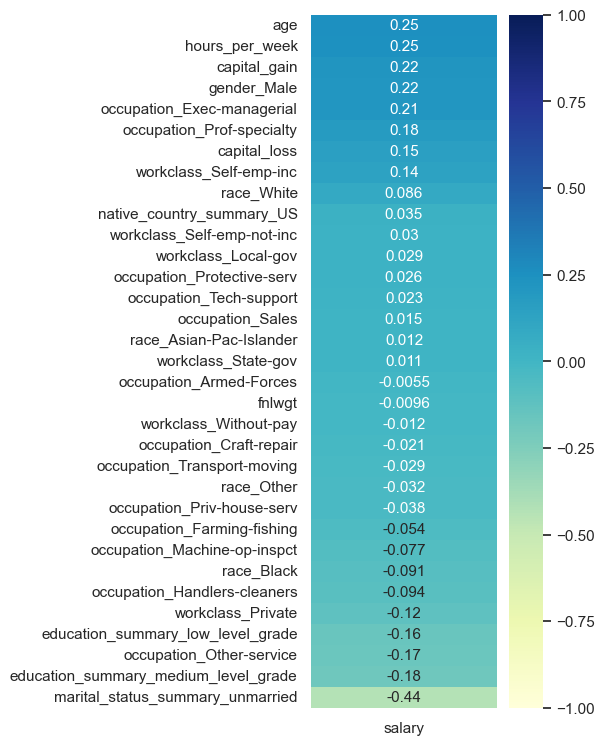

In [101]:
plt.figure(figsize = (3, 9))
sns.heatmap(df_dummy_corr_salary, 
            annot=True, 
            cmap="YlGnBu", 
            vmin=-1, 
            vmax=1, 
            annot_kws={"size": 11}, 
            cbar_kws={'shrink': 1})
plt.show()

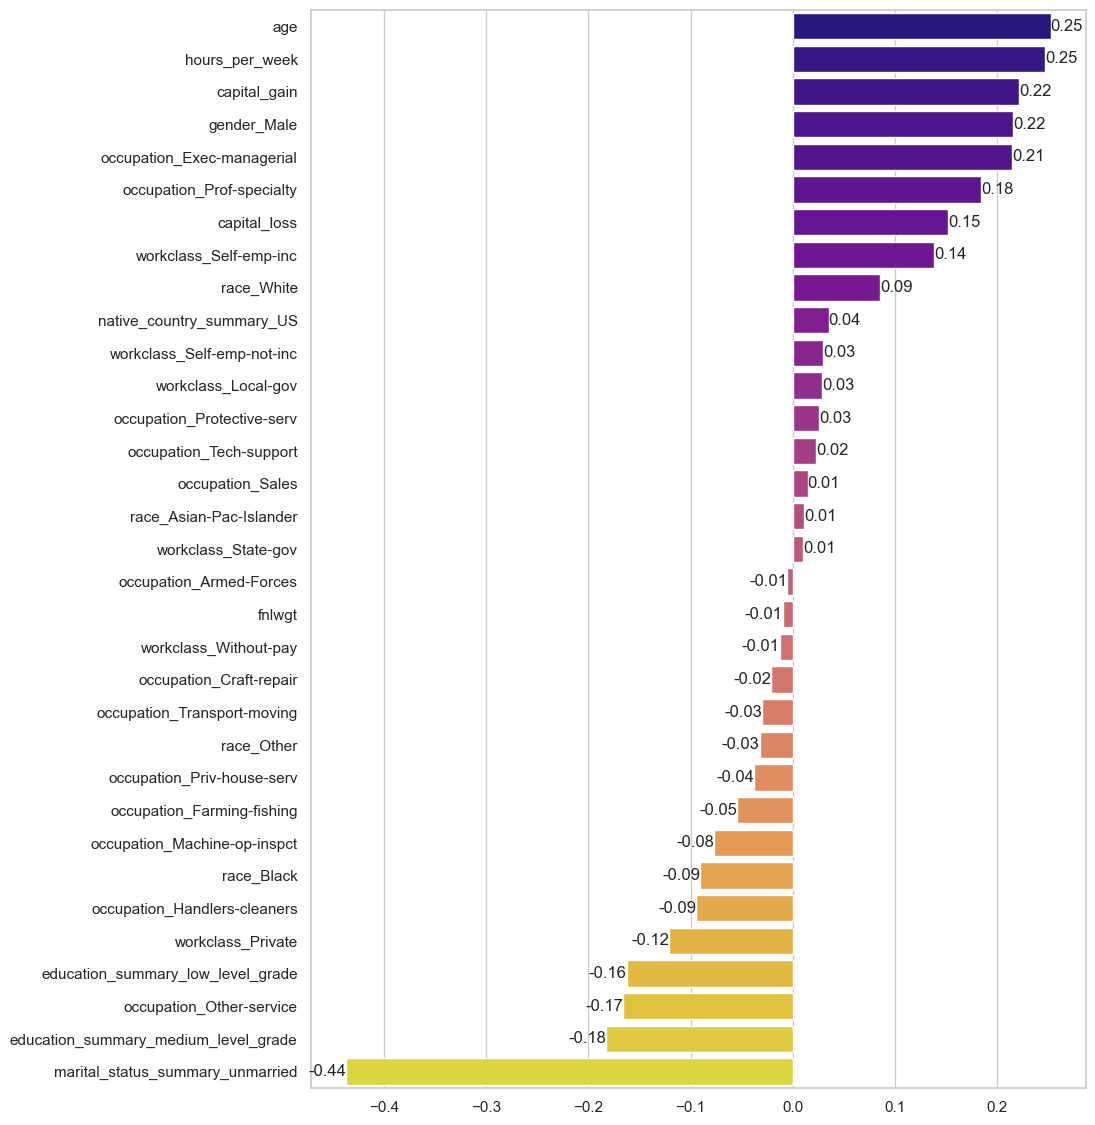

In [102]:
plt.figure(figsize = (10, 14))

ax = sns.barplot(x=df_dummy_corr_salary.values.flatten(), y=df_dummy_corr_salary.index, palette='plasma')

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

In [103]:
# Alternative Code Block for Plotting the Correlation of Dummied Variables with "salary" Feature

# plt.figure(figsize = (10, 14))

# ax = df_dummy.corr()["salary"].drop("salary").sort_values().plot(kind='barh', colormap='Paired')

# for container in ax.containers:
#     ax.bar_label(container, fmt="%.2f", fontsize=12);

In [104]:
df_dummy.to_csv("adult_dummy.csv", index = False)

In [105]:
pd.read_csv('adult_dummy.csv')

age  fnlwgt  capital_gain  capital_loss  hours_per_week  \
0       39   77516          2174             0              40   
1       50   83311             0             0              13   
2       38  215646             0             0              40   
3       53  234721             0             0              40   
4       28  338409             0             0              40   
...    ...     ...           ...           ...             ...   
29949   27  257302             0             0              38   
29950   40  154374             0             0              40   
29951   58  151910             0             0              40   
29952   22  201490             0             0              20   
29953   52  287927         15024             0              40   

       workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                        0                  0                       0   
1                        0                  0                       0   
2                        0                  1                       0   
3                        0                  1                       0   
4                        0                  1                       0   
...                    ...                ...                     ...   
29949                    0                  1                       0   
29950                    0                  1                       0   
29951                    0                  1                       0   
29952                    0                  1                       0   
29953                    0                  0                       1   

       workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  \
0                               0                    1                      0   
1                               1                    0                      0   
2                               0                    0                      0   
3                               0                    0                      0   
4                               0                    0                      0   
...                           ...                  ...                    ...   
29949                           0                    0                      0   
29950                           0                    0                      0   
29951                           0                    0                      0   
29952                           0                    0                      0   
29953                           0                    0                      0   

       occupation_Armed-Forces  occupation_Craft-repair  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
29949                        0                        0   
29950                        0                        0   
29951                        0                        0   
29952                        0                        0   
29953                        0                        0   

       occupation_Exec-managerial  occupation_Farming-fishing  \
0                               0                           0   
1                               1                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
29949                           0                           0   
29950                           0                           0   
29951                           0                           0   
29952

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of the Project</p>

___
